### Importing The Required Libraries:

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np

from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


tf.__version__
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import gc

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:05:00.0, compute capability: 7.5



In [2]:
filename = "qa-10M"
tokenizer = pickle.load(open('tokenizer/tokenizer-' + filename + '.pkl', 'rb'))


In [3]:
file = open("data/" + filename + "-cleaned.txt", "r", encoding = "utf8")
data = file.readlines()[0]
data[:100]

'Are you a fan of Google or Microsoft Both are excellent technology they are helpful in many ways For'

In [4]:
def seq():
    sequence_data = tokenizer.texts_to_sequences([data])[0]
    sequence_data[:10]

    vocab_size = len(tokenizer.word_index) + 1

    sequences = []
    for i in range(1, len(sequence_data)):        
        words = sequence_data[i-1:i+1]
        sequences.append(words)

    sequence = np.array(sequences)
    return sequence, vocab_size

In [5]:
def defieData():
    sequence,h = seq()
    X = []
    Y = []

    for i in sequence:
        X.append(i[0])
        Y.append(i[1])

    X = np.array(X)
    Y = np.array(Y)

    Y = to_categorical(Y, num_classes=vocab_size)
    return X,Y

In [6]:
i,vocab_size = seq()
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             277840    
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 27784)             27811784  
Total params: 41,138,624
Trainable params: 41,138,624
Non-trainable params: 0
_________________________________________________________________


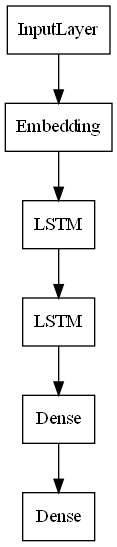

In [7]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=False)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword-"+filename+".h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword'+filename
tensorboard_Visualization = TensorBoard(log_dir=logdir)

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

In [9]:
X,Y = defieData()
print(X,Y)

[ 105    3 2468 ...   61  238 2468] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
length = len(X)
print(length)

2045349


In [11]:
del model, X, Y

In [12]:
step = 50
for i in range(step):
    try:
        
        X,Y = defieData()
        model = Sequential()
        model.add(Embedding(vocab_size, 10, input_length=1))
        model.add(LSTM(1000, return_sequences=True))
        model.add(LSTM(1000))
        model.add(Dense(1000, activation="relu"))
        model.add(Dense(vocab_size, activation="softmax"))
        no = (int)(length / step)
        st = i * no
        en = st + no - 1
        checkpoint = ModelCheckpoint("nextword-" + filename + ".h5", monitor='loss', verbose=1,
        save_best_only=True, mode='auto')
        reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)
        model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
        model.fit(X[st:en], Y[st:en], epochs=30, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])
        
        del model, X, Y
        gc.collect()
        print(i)
    except:
        print("fail:"+str(i))
        del model, X, Y
        gc.collect()
        continue
        

Epoch 1/30
640/640 [==============================] - 15s 14ms/step - loss: 6.7743

Epoch 00001: loss improved from inf to 6.77435, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 8s 13ms/step - loss: 6.1781

Epoch 00002: loss improved from 6.77435 to 6.17812, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 13ms/step - loss: 5.8121

Epoch 00003: loss improved from 6.17812 to 5.81208, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 13ms/step - loss: 5.5546

Epoch 00004: loss improved from 5.81208 to 5.55461, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 8s 13ms/step - loss: 5.3640

Epoch 00005: loss improved from 5.55461 to 5.36405, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 13ms/step - loss: 5.1870

Epoch 00006: loss improved from 5.36405 to 5.18703, saving model to ne

640/640 [==============================] - 9s 14ms/step - loss: 3.8015

Epoch 00019: loss improved from 3.85390 to 3.80153, saving model to nextword-qa-10M.h5
Epoch 20/30
640/640 [==============================] - 9s 14ms/step - loss: 3.7577

Epoch 00020: loss improved from 3.80153 to 3.75774, saving model to nextword-qa-10M.h5
Epoch 21/30
640/640 [==============================] - 9s 14ms/step - loss: 3.7181

Epoch 00021: loss improved from 3.75774 to 3.71812, saving model to nextword-qa-10M.h5
Epoch 22/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6847

Epoch 00022: loss improved from 3.71812 to 3.68467, saving model to nextword-qa-10M.h5
Epoch 23/30
640/640 [==============================] - 9s 13ms/step - loss: 3.6519

Epoch 00023: loss improved from 3.68467 to 3.65186, saving model to nextword-qa-10M.h5
Epoch 24/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6229

Epoch 00024: loss improved from 3.65186 to 3.62289, saving model to nextw

640/640 [==============================] - 9s 14ms/step - loss: 5.0107

Epoch 00007: loss improved from 5.16870 to 5.01075, saving model to nextword-qa-10M.h5
Epoch 8/30
640/640 [==============================] - 9s 14ms/step - loss: 4.8572

Epoch 00008: loss improved from 5.01075 to 4.85724, saving model to nextword-qa-10M.h5
Epoch 9/30
640/640 [==============================] - 9s 14ms/step - loss: 4.7070

Epoch 00009: loss improved from 4.85724 to 4.70699, saving model to nextword-qa-10M.h5
Epoch 10/30
640/640 [==============================] - 9s 14ms/step - loss: 4.5698

Epoch 00010: loss improved from 4.70699 to 4.56982, saving model to nextword-qa-10M.h5
Epoch 11/30
640/640 [==============================] - 9s 14ms/step - loss: 4.4408

Epoch 00011: loss improved from 4.56982 to 4.44076, saving model to nextword-qa-10M.h5
Epoch 12/30
640/640 [==============================] - 9s 14ms/step - loss: 4.3218

Epoch 00012: loss improved from 4.44076 to 4.32178, saving model to nextwor

Epoch 25/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6988

Epoch 00025: loss improved from 3.72709 to 3.69881, saving model to nextword-qa-10M.h5
Epoch 26/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6754

Epoch 00026: loss improved from 3.69881 to 3.67538, saving model to nextword-qa-10M.h5
Epoch 27/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6497

Epoch 00027: loss improved from 3.67538 to 3.64974, saving model to nextword-qa-10M.h5
Epoch 28/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6318

Epoch 00028: loss improved from 3.64974 to 3.63182, saving model to nextword-qa-10M.h5
Epoch 29/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6088

Epoch 00029: loss improved from 3.63182 to 3.60883, saving model to nextword-qa-10M.h5
Epoch 30/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5869

Epoch 00030: loss improved from 3.60883 to 3.58689, saving mo

640/640 [==============================] - 9s 14ms/step - loss: 4.2048

Epoch 00013: loss improved from 4.30138 to 4.20476, saving model to nextword-qa-10M.h5
Epoch 14/30
640/640 [==============================] - 9s 14ms/step - loss: 4.1222

Epoch 00014: loss improved from 4.20476 to 4.12217, saving model to nextword-qa-10M.h5
Epoch 15/30
640/640 [==============================] - 9s 14ms/step - loss: 4.0439

Epoch 00015: loss improved from 4.12217 to 4.04393, saving model to nextword-qa-10M.h5
Epoch 16/30
640/640 [==============================] - 9s 14ms/step - loss: 3.9746

Epoch 00016: loss improved from 4.04393 to 3.97462, saving model to nextword-qa-10M.h5
Epoch 17/30
640/640 [==============================] - 9s 14ms/step - loss: 3.9132

Epoch 00017: loss improved from 3.97462 to 3.91318, saving model to nextword-qa-10M.h5
Epoch 18/30
640/640 [==============================] - 9s 14ms/step - loss: 3.8601

Epoch 00018: loss improved from 3.91318 to 3.86008, saving model to nextw

7
Epoch 1/30
640/640 [==============================] - 12s 15ms/step - loss: 6.7576

Epoch 00001: loss improved from inf to 6.75764, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 6.1752

Epoch 00002: loss improved from 6.75764 to 6.17517, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 14ms/step - loss: 5.8279

Epoch 00003: loss improved from 6.17517 to 5.82794, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 14ms/step - loss: 5.5697

Epoch 00004: loss improved from 5.82794 to 5.56966, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 9s 13ms/step - loss: 5.3786

Epoch 00005: loss improved from 5.56966 to 5.37857, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 14ms/step - loss: 5.2146

Epoch 00006: loss improved from 5.37857 to 5.21464, saving model to 

640/640 [==============================] - 9s 14ms/step - loss: 3.8627

Epoch 00019: loss improved from 3.91457 to 3.86275, saving model to nextword-qa-10M.h5
Epoch 20/30
640/640 [==============================] - 9s 13ms/step - loss: 3.8170

Epoch 00020: loss improved from 3.86275 to 3.81705, saving model to nextword-qa-10M.h5
Epoch 21/30
640/640 [==============================] - 9s 14ms/step - loss: 3.7771

Epoch 00021: loss improved from 3.81705 to 3.77713, saving model to nextword-qa-10M.h5
Epoch 22/30
640/640 [==============================] - 9s 14ms/step - loss: 3.7416

Epoch 00022: loss improved from 3.77713 to 3.74155, saving model to nextword-qa-10M.h5
Epoch 23/30
640/640 [==============================] - 9s 14ms/step - loss: 3.7101

Epoch 00023: loss improved from 3.74155 to 3.71005, saving model to nextword-qa-10M.h5
Epoch 24/30
640/640 [==============================] - 8s 13ms/step - loss: 3.6844

Epoch 00024: loss improved from 3.71005 to 3.68435, saving model to nextw

640/640 [==============================] - 9s 14ms/step - loss: 5.0148

Epoch 00007: loss improved from 5.19553 to 5.01480, saving model to nextword-qa-10M.h5
Epoch 8/30
640/640 [==============================] - 9s 14ms/step - loss: 4.8528

Epoch 00008: loss improved from 5.01480 to 4.85278, saving model to nextword-qa-10M.h5
Epoch 9/30
640/640 [==============================] - 9s 14ms/step - loss: 4.7070

Epoch 00009: loss improved from 4.85278 to 4.70695, saving model to nextword-qa-10M.h5
Epoch 10/30
640/640 [==============================] - 9s 14ms/step - loss: 4.5762

Epoch 00010: loss improved from 4.70695 to 4.57621, saving model to nextword-qa-10M.h5
Epoch 11/30
640/640 [==============================] - 9s 14ms/step - loss: 4.4498

Epoch 00011: loss improved from 4.57621 to 4.44983, saving model to nextword-qa-10M.h5
Epoch 12/30
640/640 [==============================] - 9s 14ms/step - loss: 4.3356

Epoch 00012: loss improved from 4.44983 to 4.33562, saving model to nextwor

640/640 [==============================] - 9s 13ms/step - loss: 3.6735

Epoch 00025: loss improved from 3.70065 to 3.67350, saving model to nextword-qa-10M.h5
Epoch 26/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6445

Epoch 00026: loss improved from 3.67350 to 3.64450, saving model to nextword-qa-10M.h5
Epoch 27/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6215

Epoch 00027: loss improved from 3.64450 to 3.62151, saving model to nextword-qa-10M.h5
Epoch 28/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5991

Epoch 00028: loss improved from 3.62151 to 3.59912, saving model to nextword-qa-10M.h5
Epoch 29/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5803

Epoch 00029: loss improved from 3.59912 to 3.58025, saving model to nextword-qa-10M.h5
Epoch 30/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5585

Epoch 00030: loss improved from 3.58025 to 3.55851, saving model to nextw

640/640 [==============================] - 12s 15ms/step - loss: 6.6694

Epoch 00001: loss improved from inf to 6.66938, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 6.1003

Epoch 00002: loss improved from 6.66938 to 6.10030, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 14ms/step - loss: 5.7341

Epoch 00003: loss improved from 6.10030 to 5.73406, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 14ms/step - loss: 5.4735

Epoch 00004: loss improved from 5.73406 to 5.47348, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 9s 14ms/step - loss: 5.2406

Epoch 00005: loss improved from 5.47348 to 5.24063, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 14ms/step - loss: 5.0500

Epoch 00006: loss improved from 5.24063 to 5.05000, saving model to nextword-qa-1

640/640 [==============================] - 9s 14ms/step - loss: 5.0158

Epoch 00007: loss improved from 5.16027 to 5.01576, saving model to nextword-qa-10M.h5
Epoch 8/30
640/640 [==============================] - 9s 14ms/step - loss: 4.8901

Epoch 00008: loss improved from 5.01576 to 4.89011, saving model to nextword-qa-10M.h5
Epoch 9/30
640/640 [==============================] - 9s 14ms/step - loss: 4.7703

Epoch 00009: loss improved from 4.89011 to 4.77031, saving model to nextword-qa-10M.h5
Epoch 10/30
640/640 [==============================] - 9s 14ms/step - loss: 4.6430

Epoch 00010: loss improved from 4.77031 to 4.64302, saving model to nextword-qa-10M.h5
Epoch 11/30
640/640 [==============================] - 9s 13ms/step - loss: 4.5138

Epoch 00011: loss improved from 4.64302 to 4.51382, saving model to nextword-qa-10M.h5
Epoch 12/30
640/640 [==============================] - 9s 13ms/step - loss: 4.3920

Epoch 00012: loss improved from 4.51382 to 4.39201, saving model to nextwor

640/640 [==============================] - 9s 14ms/step - loss: 3.6449

Epoch 00025: loss improved from 3.67343 to 3.64486, saving model to nextword-qa-10M.h5
Epoch 26/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6198

Epoch 00026: loss improved from 3.64486 to 3.61976, saving model to nextword-qa-10M.h5
Epoch 27/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5992

Epoch 00027: loss improved from 3.61976 to 3.59916, saving model to nextword-qa-10M.h5
Epoch 28/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5752

Epoch 00028: loss improved from 3.59916 to 3.57521, saving model to nextword-qa-10M.h5
Epoch 29/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5553

Epoch 00029: loss improved from 3.57521 to 3.55531, saving model to nextword-qa-10M.h5
Epoch 30/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5384

Epoch 00030: loss improved from 3.55531 to 3.53841, saving model to nextw

640/640 [==============================] - 12s 15ms/step - loss: 6.7603

Epoch 00001: loss improved from inf to 6.76031, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 6.1570

Epoch 00002: loss improved from 6.76031 to 6.15700, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 14ms/step - loss: 5.7945

Epoch 00003: loss improved from 6.15700 to 5.79448, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 14ms/step - loss: 5.4917

Epoch 00004: loss improved from 5.79448 to 5.49169, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 9s 14ms/step - loss: 5.2497

Epoch 00005: loss improved from 5.49169 to 5.24965, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 14ms/step - loss: 5.0633

Epoch 00006: loss improved from 5.24965 to 5.06328, saving model to nextword-qa-1

640/640 [==============================] - 9s 13ms/step - loss: 4.3875

Epoch 00007: loss improved from 4.55109 to 4.38753, saving model to nextword-qa-10M.h5
Epoch 8/30
640/640 [==============================] - 9s 14ms/step - loss: 4.2417

Epoch 00008: loss improved from 4.38753 to 4.24174, saving model to nextword-qa-10M.h5
Epoch 9/30
640/640 [==============================] - 9s 14ms/step - loss: 4.1213

Epoch 00009: loss improved from 4.24174 to 4.12127, saving model to nextword-qa-10M.h5
Epoch 10/30
640/640 [==============================] - 9s 14ms/step - loss: 4.0197

Epoch 00010: loss improved from 4.12127 to 4.01970, saving model to nextword-qa-10M.h5
Epoch 11/30
640/640 [==============================] - 9s 14ms/step - loss: 3.9289

Epoch 00011: loss improved from 4.01970 to 3.92893, saving model to nextword-qa-10M.h5
Epoch 12/30
640/640 [==============================] - 9s 14ms/step - loss: 3.8442

Epoch 00012: loss improved from 3.92893 to 3.84416, saving model to nextwor

640/640 [==============================] - 9s 14ms/step - loss: 3.5590

Epoch 00025: loss improved from 3.58146 to 3.55897, saving model to nextword-qa-10M.h5
Epoch 26/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5382

Epoch 00026: loss improved from 3.55897 to 3.53824, saving model to nextword-qa-10M.h5
Epoch 27/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5183

Epoch 00027: loss improved from 3.53824 to 3.51829, saving model to nextword-qa-10M.h5
Epoch 28/30
640/640 [==============================] - 9s 14ms/step - loss: 3.4984

Epoch 00028: loss improved from 3.51829 to 3.49836, saving model to nextword-qa-10M.h5
Epoch 29/30
640/640 [==============================] - 9s 14ms/step - loss: 3.4829

Epoch 00029: loss improved from 3.49836 to 3.48287, saving model to nextword-qa-10M.h5
Epoch 30/30
640/640 [==============================] - 9s 14ms/step - loss: 3.4666

Epoch 00030: loss improved from 3.48287 to 3.46658, saving model to nextw

640/640 [==============================] - 12s 15ms/step - loss: 6.7844

Epoch 00001: loss improved from inf to 6.78435, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 6.1997

Epoch 00002: loss improved from 6.78435 to 6.19971, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 15ms/step - loss: 5.8575

Epoch 00003: loss improved from 6.19971 to 5.85748, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 14ms/step - loss: 5.5985

Epoch 00004: loss improved from 5.85748 to 5.59847, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 9s 14ms/step - loss: 5.3856

Epoch 00005: loss improved from 5.59847 to 5.38564, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 14ms/step - loss: 5.1999

Epoch 00006: loss improved from 5.38564 to 5.19987, saving model to nextword-qa-1

640/640 [==============================] - 9s 13ms/step - loss: 5.0402

Epoch 00007: loss improved from 5.18223 to 5.04016, saving model to nextword-qa-10M.h5
Epoch 8/30
640/640 [==============================] - 9s 14ms/step - loss: 4.9209

Epoch 00008: loss improved from 5.04016 to 4.92088, saving model to nextword-qa-10M.h5
Epoch 9/30
640/640 [==============================] - 9s 13ms/step - loss: 4.8105

Epoch 00009: loss improved from 4.92088 to 4.81045, saving model to nextword-qa-10M.h5
Epoch 10/30
640/640 [==============================] - 9s 14ms/step - loss: 4.7099

Epoch 00010: loss improved from 4.81045 to 4.70995, saving model to nextword-qa-10M.h5
Epoch 11/30
640/640 [==============================] - 9s 13ms/step - loss: 4.6103

Epoch 00011: loss improved from 4.70995 to 4.61030, saving model to nextword-qa-10M.h5
Epoch 12/30
640/640 [==============================] - 9s 14ms/step - loss: 4.5157

Epoch 00012: loss improved from 4.61030 to 4.51571, saving model to nextwor

640/640 [==============================] - 9s 14ms/step - loss: 3.6605

Epoch 00025: loss improved from 3.68882 to 3.66048, saving model to nextword-qa-10M.h5
Epoch 26/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6407

Epoch 00026: loss improved from 3.66048 to 3.64066, saving model to nextword-qa-10M.h5
Epoch 27/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6144

Epoch 00027: loss improved from 3.64066 to 3.61440, saving model to nextword-qa-10M.h5
Epoch 28/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5953

Epoch 00028: loss improved from 3.61440 to 3.59529, saving model to nextword-qa-10M.h5
Epoch 29/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5751

Epoch 00029: loss improved from 3.59529 to 3.57512, saving model to nextword-qa-10M.h5
Epoch 30/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5564

Epoch 00030: loss improved from 3.57512 to 3.55642, saving model to nextw

640/640 [==============================] - 9s 14ms/step - loss: 4.2112

Epoch 00013: loss improved from 4.32463 to 4.21116, saving model to nextword-qa-10M.h5
Epoch 14/30
640/640 [==============================] - 9s 14ms/step - loss: 4.1112

Epoch 00014: loss improved from 4.21116 to 4.11124, saving model to nextword-qa-10M.h5
Epoch 15/30
640/640 [==============================] - 9s 14ms/step - loss: 4.0259

Epoch 00015: loss improved from 4.11124 to 4.02595, saving model to nextword-qa-10M.h5
Epoch 16/30
640/640 [==============================] - 9s 14ms/step - loss: 3.9526

Epoch 00016: loss improved from 4.02595 to 3.95261, saving model to nextword-qa-10M.h5
Epoch 17/30
640/640 [==============================] - 9s 14ms/step - loss: 3.8897

Epoch 00017: loss improved from 3.95261 to 3.88965, saving model to nextword-qa-10M.h5
Epoch 18/30
640/640 [==============================] - 9s 14ms/step - loss: 3.8326

Epoch 00018: loss improved from 3.88965 to 3.83256, saving model to nextw

640/640 [==============================] - 12s 15ms/step - loss: 6.7312

Epoch 00001: loss improved from inf to 6.73122, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 6.1551

Epoch 00002: loss improved from 6.73122 to 6.15506, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 14ms/step - loss: 5.7974

Epoch 00003: loss improved from 6.15506 to 5.79742, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 14ms/step - loss: 5.5238

Epoch 00004: loss improved from 5.79742 to 5.52379, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 9s 14ms/step - loss: 5.3020

Epoch 00005: loss improved from 5.52379 to 5.30196, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 14ms/step - loss: 5.1214

Epoch 00006: loss improved from 5.30196 to 5.12137, saving model to nextword-qa-1

640/640 [==============================] - 9s 13ms/step - loss: 5.0191

Epoch 00007: loss improved from 5.16452 to 5.01908, saving model to nextword-qa-10M.h5
Epoch 8/30
640/640 [==============================] - 9s 13ms/step - loss: 4.8797

Epoch 00008: loss improved from 5.01908 to 4.87970, saving model to nextword-qa-10M.h5
Epoch 9/30
640/640 [==============================] - 9s 13ms/step - loss: 4.7482

Epoch 00009: loss improved from 4.87970 to 4.74820, saving model to nextword-qa-10M.h5
Epoch 10/30
640/640 [==============================] - 9s 13ms/step - loss: 4.6153

Epoch 00010: loss improved from 4.74820 to 4.61535, saving model to nextword-qa-10M.h5
Epoch 11/30
640/640 [==============================] - 8s 13ms/step - loss: 4.4848

Epoch 00011: loss improved from 4.61535 to 4.48481, saving model to nextword-qa-10M.h5
Epoch 12/30
640/640 [==============================] - 9s 14ms/step - loss: 4.3649

Epoch 00012: loss improved from 4.48481 to 4.36487, saving model to nextwor

640/640 [==============================] - 9s 14ms/step - loss: 3.6809

Epoch 00025: loss improved from 3.70951 to 3.68094, saving model to nextword-qa-10M.h5
Epoch 26/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6530

Epoch 00026: loss improved from 3.68094 to 3.65295, saving model to nextword-qa-10M.h5
Epoch 27/30
640/640 [==============================] - 9s 14ms/step - loss: 3.6312

Epoch 00027: loss improved from 3.65295 to 3.63118, saving model to nextword-qa-10M.h5
Epoch 28/30
640/640 [==============================] - 9s 13ms/step - loss: 3.6036

Epoch 00028: loss improved from 3.63118 to 3.60355, saving model to nextword-qa-10M.h5
Epoch 29/30
640/640 [==============================] - 9s 13ms/step - loss: 3.5860

Epoch 00029: loss improved from 3.60355 to 3.58604, saving model to nextword-qa-10M.h5
Epoch 30/30
640/640 [==============================] - 9s 14ms/step - loss: 3.5647

Epoch 00030: loss improved from 3.58604 to 3.56470, saving model to nextw

640/640 [==============================] - 12s 15ms/step - loss: 6.6008

Epoch 00001: loss improved from inf to 6.60077, saving model to nextword-qa-10M.h5
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 6.0279

Epoch 00002: loss improved from 6.60077 to 6.02788, saving model to nextword-qa-10M.h5
Epoch 3/30
640/640 [==============================] - 9s 14ms/step - loss: 5.6437

Epoch 00003: loss improved from 6.02788 to 5.64372, saving model to nextword-qa-10M.h5
Epoch 4/30
640/640 [==============================] - 9s 14ms/step - loss: 5.3795

Epoch 00004: loss improved from 5.64372 to 5.37945, saving model to nextword-qa-10M.h5
Epoch 5/30
640/640 [==============================] - 9s 14ms/step - loss: 5.1604

Epoch 00005: loss improved from 5.37945 to 5.16042, saving model to nextword-qa-10M.h5
Epoch 6/30
640/640 [==============================] - 9s 14ms/step - loss: 4.9781

Epoch 00006: loss improved from 5.16042 to 4.97807, saving model to nextword-qa-1

In [ ]:
# https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
# tensorboard --logdir="./logsnextword1"
# http://DESKTOP-U3TSCVT:6006/

from IPython.display import Image 
pil_img = Image(filename='graph1.png')
display(pil_img)

In [3]:
def Predict_Next_Words(model, tokenizer, text):
    #print(text)
    arr = []
    arr.append(text)
    sequence = tokenizer.texts_to_sequences([text])[0]
    
    sequence = np.array(sequence)
    #print(sequence)
    res = []
    preds = model.predict(sequence)
    #print(preds)
    preds1= np.flip(np.argsort(preds,axis=1))
    preds = np.argmax(preds,axis=1)
    for i in range(10):
        res.append((preds1[0][i]))
    #print(len(res))
    predicted_word = ""
    predicted_words = []

    for key, value in tokenizer.word_index.items():
        if value in res:
            predicted_words.append(key)
            #print(key)
            #break

    #print(len(predicted_word))
    return predicted_words

In [4]:
from tensorflow.keras.models import load_model
model = load_model('nextword-'+filename+'.h5')

In [5]:
strs = ["All","And","Boy","Book","Call","Car","Chair","Children","City","Dog","Door","Enemy","End","Enough","Eat","Friend","Father","Go","Good","Girl","Food","Hear","House","Inside","Laugh","Listen","Man","Name","Never","Next","New","Noise","Often","Pair","Pick","Play","Room","See","Sell","Sit","Speak","Smile","Sister","Think","Then","Walk","Water","Work","Write","Woman","Yes"]
strs = ["inspiring","it","there","gender","each","any","international","law","slogan","people","as","body","if","equality","labels","until","contest","catchy","world","human"]
strs = ["sex"]

for i in range(51):
    export = Predict_Next_Words(model, tokenizer, strs[i])
    print(strs[i] + "\t" + "\t".join(export))

sex	lebron	wow	thanks	bill	amazing	spacex	abba	hot	must	politicians


IndexError: list index out of range

In [6]:
strs = ["inspiring","it","there","gender","each","any","international","law","slogan","people","as","body","if","equality","labels","until","contest","catchy","world","human"]
strs = ["astronomy","sex"]
for txt in strs:
    sentence = txt
    txt2 = txt
    for i in range(10):
        txt2 = Predict_Next_Words(model, tokenizer, txt2)[0]
        sentence = sentence + " " + txt2
    print(sentence)


astronomy wow wow wow wow wow wow wow wow wow wow
sex lebron the lebron the lebron the lebron the lebron the


In [2]:
def sent(sentence):
    if(len(sentence.split()) > 9):
        print(sentence)
        return
    else:
        sentence1 = sentence + " " + Predict_Next_Words(model, tokenizer, sentence)[0]
        sentence2 = sentence + " " + Predict_Next_Words(model, tokenizer, sentence)[1]
        sent(sentence1)
        #sent(sentence2)

In [3]:
sent("sex")

NameError: name 'Predict_Next_Words' is not defined

In [61]:
print(len(tokenizer.word_index.items()))
for key, value in tokenizer.word_index.items():
    export = Predict_Next_Words(model, tokenizer, key)
    print(str(value) + "\t" + key + "\t" + "\t".join(export))

27783
1	phd	like	that	and	he	nice	house	i	yep	cool	scientist
2	myspace	the	like	and	who	it	would	one	i	a	ones
3	you	think	like	have	can	watch	know	ever	hear	i	a
4	lebron	did	play	still	was	should	is	s	james	signed	raised
5	the	nba	only	first	best	sun	highest	piano	same	internet	top
6	think	the	that	he	it	at	trump	they	of	i	about
7	like	you	the	that	how	he	it	to	them	cars	a
8	lol	lol	that	yeah	did	hi	it	good	do	true	i
9	wow	you	the	that	and	did	who	he	they	i	a
10	youtube	you	that	yes	it	they	kung	these	i	depending	videos
11	nba	that	finals	is	do	players	i	hall	team	titles	sacrificing
12	any	good	jazz	of	more	day	musical	cars	sense	chance	sports
13	iphones	the	like	that	and	but	would	they	i	read	ones
14	imax	the	that	and	he	was	would	is	there	thor	i
15	that	the	he	it	was	would	is	there	i	sounds	s
16	yeah	the	that	and	but	did	he	it	they	do	i
17	amazon	ceo	news	kindle	warehouse	prime	i	s	fire	contracted	employees
18	amazonbasics	the	like	that	but	it	would	probably	i	a	read
19	its	legal	bee

149	government	and	for	of	games	cars	i	policy	regulations	study	deals
150	judge	paid	to	sued	collinsville	thing	gave	judy	whether	wapner	grossing
151	congress	the	like	that	and	but	it	would	they	in	i
152	world	combined	cup	on	for	records	record	war	fear	opening	affars
153	superbowl	you	that	how	he	it	ha	do	i	about	recently
154	billion	that	years	it	us	in	working	i	dollars	hours	times
155	unicef	the	he	has	would	i	read	baseball	davis	adidas	else
156	chief	the	that	and	he	so	has	is	in	i	a
157	robin	judge	williams	day	time	horror	latin	episode	movie	minimum	education
158	monty	the	like	that	and	he	would	used	i	a	wait
159	skynet	the	has	would	is	didn	getting	i	a	makes	else
160	it	but	could	has	was	would	is	looks	seems	i	s
161	marvel	and	we	way	comics	service	movies	easy	language	cinema	debut
162	watch	the	that	tv	all	judge	it	them	horror	a	baseball
163	loved	the	that	those	it	to	school	swimming	an	watching	lord
164	hot	lol	but	as	for	ball	of	i	then	than	plasma
165	drunk	lol	wow	that	did	it

294	eminem	and	got	simpson	has	was	is	made	plays	had	does
295	still	the	get	has	plays	fry	be	holds	witl	biased	experience
296	awww	the	like	and	so	would	in	there	not	i	a
297	di	the	like	that	and	but	it	would	they	in	i
298	im	sure	mostly	good	probably	not	curious	a	going	worried	guessing
299	dont	think	like	have	watch	know	follow	heard	specifically	remember	experience
300	park	and	when	has	is	played	album	hybrid	producers	concert	rides
301	disney	he	world	still	has	was	didn	i	s	james	took
302	hal	the	and	he	would	is	there	getting	i	a	baseball
303	braille	the	that	he	was	would	is	in	even	there	i
304	mesut	old	ymca	show	lee	service	ozil	shows	principal	mardenborough	etc
305	muse	the	that	and	but	he	it	would	in	there	i
306	martin	the	like	and	also	he	would	not	used	i	wait
307	considering	the	that	but	how	it	to	they	there	i	about
308	america	yeah	and	thanks	yes	it	no	is	with	i	s
309	jordan	has	was	is	played	told	i	fan	s	kept	wore
310	ha	that	how	did	it	speaking	ha	if	i	president	drugs
311	h

439	shoes	like	too	have	can	are	air	to	my	i	a
440	dc	the	like	but	no	would	in	these	i	read	says
441	thing	the	that	and	he	it	to	for	in	since	i
442	on	the	that	amazon	tv	sundays	your	my	a	top	spotify
443	narcos	the	like	and	but	he	id	would	in	i	recorded
444	another	nba	that	job	interesting	show	thing	basketball	scary	weird	smart
445	ti	the	that	and	but	who	he	would	they	in	i
446	mj	like	that	yeah	too	who	to	haha	in	i	from
447	ever	watch	seen	listen	heard	gotten	mention	match	listened	wath	opened
448	jon	think	disney	if	bezos	stewart	i	fan	s	hamm	t
449	if	you	the	that	he	it	my	they	there	not	i
450	hehe	the	something	he	so	in	not	i	a	x	excessively
451	holidays	the	that	and	he	it	is	in	i	a	baseball
452	nintendo	you	she	he	it	would	is	where	i	makes	baseball
453	andy	the	he	has	would	is	didn	getting	i	a	taking
454	pixar	the	like	have	has	is	movies	i	studio	fan	boohoo
455	hustle	could	did	play	just	was	they	is	said	thought	s
456	doc	the	like	and	too	used	character	i	a	wait	unsuccessfully
457	

584	two	year	tone	i	boys	olympic	heads	pairs	shots	weeks	notes
585	wong	the	who	he	has	would	is	i	navajo	user	else
586	pong	that	and	but	he	was	would	is	in	used	i
587	kung	fu	crosby	created	stated	railroad	hammer	frost	actions	emotions	laughs
588	list	lol	that	yeah	and	but	it	to	of	i	t
589	climate	the	like	and	he	would	is	used	i	a	baseball
590	exactly	the	that	how	he	it	basketball	cleveland	i	a	today
591	ex	player	celebrity	trunks	model	trunk	actress	boyfriend	contract	role	version
592	snes	the	that	and	but	he	so	would	in	i	a
593	day	you	lol	that	hi	he	it	to	good	lewis	i
594	pewdiepie	the	that	and	but	he	would	they	in	these	i
595	spencer	who	to	haywood	is	ride	hanging	onscreen	violator	batteries	elba
596	nasa	like	that	and	but	he	would	they	in	with	i
597	why	the	that	but	he	it	when	they	there	i	presidents
598	time	you	the	wow	that	and	he	to	they	i	ago
599	over	the	that	years	billion	it	i	a	million	calories	pts
600	theory	that	who	hahaha	for	tour	album	fee	s	team	asked
601	not	the	like	

731	composed	the	its	to	back	for	with	there	of	i	bohemian
732	yup	you	she	he	it	if	they	is	i	a	presidents
733	stub	the	he	so	would	is	in	there	these	i	baseball
734	bird	the	that	yeah	and	he	his	they	in	i	weighed
735	ends	lol	that	yeah	and	but	it	to	of	i	t
736	divorce	the	that	and	but	he	it	would	is	in	i
737	guilty	the	that	sure	good	people	weird	a	watching	pleasure	going
738	gmail	the	he	has	would	is	thor	i	puts	brought	sell
739	panda	the	like	that	and	but	he	so	would	in	i
740	ness	and	but	supreme	would	in	with	cars	i	humans	recorded
741	hoarder	like	that	and	but	it	probably	in	working	i	times
742	coffee	the	he	would	is	in	even	there	thor	i	a
743	gnomes	like	who	all	would	used	tennis	i	wait	ones	legally
744	couldn	lol	yeah	with	school	squad	compare	t	demographic	wears	statement
745	surely	and	of	star	money	last	radio	th	president	movie	actual
746	schools	you	the	that	did	he	it	now	they	of	i
747	signmark	he	has	tennis	companies	baseball	apart	davis	adidas	paul	daylight
748	freeman	the	l

883	gate	the	that	and	but	he	would	they	is	in	i
884	stradivarius	the	like	that	and	but	so	in	not	i	a
885	money	that	and	but	well	maybe	to	they	in	i	behind
886	museums	the	he	has	would	is	getting	i	baseball	puts	daylight
887	ahhh	the	that	and	but	it	to	his	there	i	a
888	balls	the	that	and	but	did	what	it	to	if	i
889	mines	the	who	has	would	anger	i	navajo	puts	user	scoring
890	featured	that	and	was	as	on	for	in	i	a	power
891	seeems	the	that	and	he	would	is	not	getting	i	baseball
892	killing	the	like	who	would	didn	getting	i	a	wait	baseball
893	judy	she	are	he	would	is	there	getting	i	makes	dench
894	sergey	the	that	and	but	yes	it	probably	in	i	times
895	underpants	the	like	and	so	would	used	character	i	a	wait
896	turkish	the	that	and	but	he	supreme	would	they	in	i
897	fossil	that	and	but	he	would	they	in	meant	these	i
898	ren	the	like	that	and	but	it	would	they	anger	i
899	communities	the	some	did	it	was	they	is	not	i	s
900	mixes	like	he	has	would	horror	i	baseball	davis	adidas	user
901	

1031	cards	that	and	but	yes	he	to	so	was	in	i
1032	invisible	you	the	that	and	but	he	would	they	in	i
1033	fed	she	he	it	would	is	there	getting	i	makes	dench
1034	useful	and	well	he	to	back	if	in	with	i	supposed
1035	mickeys	the	that	and	but	he	it	in	of	i	a
1036	border	the	that	and	he	has	would	is	i	a	baseball
1037	count	the	that	all	it	his	one	is	in	a	him
1038	physical	we	robinson	stern	effects	actor	issues	suffering	damage	role	prowse
1039	goodbye	you	like	its	can	are	so	hey	far	i	fun
1040	gaming	the	like	and	it	so	would	one	in	i	a
1041	winning	the	that	and	it	when	this	my	out	of	i
1042	johnny	interesting	for	morning	wineries	sweet	cash	depp	schedule	twitty	hectic
1043	call	the	that	it	them	of	association	alot	i	a	him
1044	mating	the	that	and	but	he	it	would	in	there	i
1045	anti	the	he	has	would	is	there	i	a	baseball	paul
1046	falcon	the	that	but	he	would	is	in	there	these	i
1047	kerr	and	to	show	awesome	over	star	made	radios	album	radio
1048	against	the	those	all	his	one	them	games	a

1178	zydeco	the	he	it	white	would	is	in	there	i	a
1179	reptile	the	like	that	and	but	yes	it	would	they	i
1180	stage	the	like	and	so	would	used	i	a	wait	tall
1181	directorial	the	that	and	but	he	so	would	in	there	i
1182	klay	that	he	to	thomas	us	in	i	by	him	episodes
1183	collected	client	start	saddles	planets	nowadays	metallica	quick	rattling	larry	morissette
1184	cane	like	that	and	but	he	it	would	they	in	i
1185	tourist	the	like	that	and	he	would	is	used	i	wait
1186	qatar	the	that	and	he	has	would	in	not	i	a
1187	wal	the	like	that	and	but	would	is	used	i	a
1188	neil	you	the	that	and	but	he	would	they	in	i
1189	fallout	the	like	that	and	but	it	would	they	in	i
1190	fort	the	like	that	and	but	would	in	with	i	times
1191	isn	lol	yeah	with	school	where	from	t	demographic	wears	statement
1192	gm	the	white	would	one	is	in	there	i	a	makes
1193	tricky	the	that	and	he	it	was	would	is	used	i
1194	af	the	he	has	would	is	getting	i	baseball	puts	else
1195	turker	the	and	he	has	would	is	in	i	a	basebal

1323	working	use	police	as	on	for	in	second	points	jeans	folks
1324	higher	that	or	to	so	as	novel	during	dramas	football	percentage
1325	arabian	like	and	how	who	he	would	is	anger	i	user
1326	own	the	imdb	it	one	radios	hair	i	a	million	amusement
1327	pats	the	like	and	but	he	would	they	is	not	i
1328	service	that	off	at	for	in	with	from	by	up	contracts
1329	frasier	the	that	and	but	did	what	it	to	if	i
1330	popularity	the	like	that	and	but	he	would	they	in	i
1331	humbling	the	like	that	and	but	in	composed	character	i	times
1332	prolific	the	that	but	he	they	in	basketball	i	a	afraid
1333	meant	lebron	the	that	he	to	so	his	in	i	a
1334	harvard	the	like	that	and	but	it	would	they	in	i
1335	monkeys	the	that	can	are	he	good	is	do	i	a
1336	buying	stuff	so	as	for	one	album	i	language	sweet	uses
1337	supergirl	the	like	and	too	but	would	in	i	a	times
1338	shall	the	and	so	would	one	in	there	i	a	called
1339	freedom	the	like	that	and	but	in	i	a	times	heard
1340	cruz	that	and	but	he	supreme	would	the

1466	pit	the	like	and	he	so	would	in	not	i	a
1467	oedipus	the	that	and	but	he	would	they	in	i	scoring
1468	seinfeld	and	or	to	as	for	frasier	i	serves	during	ago
1469	students	the	been	for	kill	i	a	hm	lives	definitely	pass
1470	whose	and	but	what	wonder	was	at	of	idea	i	s
1471	burger	the	it	so	would	one	in	these	i	a	videos
1472	wide	the	like	something	he	would	not	basketball	i	a	adidas
1473	clark	the	like	that	and	but	he	so	in	i	a
1474	alpha	the	like	that	and	but	character	i	a	wait	times
1475	powerful	and	but	to	without	as	for	of	cadillac	about	person
1476	ozil	wow	that	yeah	too	who	to	haha	in	thats	i
1477	angel	the	like	and	but	would	in	composed	used	i	recorded
1478	re	at	right	in	not	a	correct	visit	electronic	somewhere	editing
1479	intersting	like	how	he	would	not	tennis	i	wait	evidently	davis
1480	dutch	the	like	and	but	he	would	they	in	there	i
1481	might	have	even	not	ad	be	direct	make	offer	reach	deploy
1482	lake	the	like	that	and	but	he	so	would	in	i
1483	manga	the	like	something

1612	beautiful	came	b	piano	sunsets	market	car	instrument	vehicles	maine	voices
1613	selfish	the	like	that	and	but	in	i	a	times	ones
1614	nominated	the	like	that	for	in	i	a	times	today	wearing
1615	snowden	the	he	so	would	is	in	there	i	a	dench
1616	hardly	that	it	absolutely	men	oh	is	in	sounds	s	abstract
1617	hose	the	that	who	he	would	is	getting	i	makes	measurable
1618	merida	the	like	and	but	who	would	they	i	read	user
1619	walk	that	what	or	disney	if	of	exactly	miles	from	situations
1620	brooks	that	who	all	it	would	they	is	anger	i	measurable
1621	gray	the	he	so	would	is	in	there	i	a	baseball
1622	geneva	the	like	and	so	used	character	i	a	wait	unsuccessfully
1623	roaches	the	like	and	but	would	they	anger	i	user	scoring
1624	including	the	that	to	his	sundays	for	go	animated	a	joes
1625	mothe	la	day	cadillac	throwers	football	woman	person	thrower	laurentiis	niro
1626	brown	that	and	but	he	supreme	would	they	is	in	i
1627	jansport	the	that	and	but	did	what	it	to	if	i
1628	steam	the	tv	fo

1755	rocket	the	that	and	who	it	would	is	i	navajo	ones
1756	mcgonigal	the	and	but	it	white	would	one	in	i	a
1757	lowest	the	like	that	who	would	they	i	read	puts	user
1758	denzel	the	like	and	but	he	so	in	not	i	a
1759	recess	the	like	that	and	but	he	would	they	in	i
1760	copy	the	that	yes	it	when	to	haha	of	since	i
1761	bad	and	are	is	do	weather	idea	i	guy	roads	man
1762	trail	the	he	has	would	in	there	i	a	x	paul
1763	minaj	the	that	and	but	he	supreme	would	they	in	i
1764	slippers	you	the	that	but	he	would	they	these	i	depending
1765	stripes	like	and	but	id	would	i	were	times	ones	recorded
1766	humor	lol	that	and	was	as	on	for	in	i	power
1767	chocolat	the	like	and	he	has	would	is	i	a	baseball
1768	croatia	the	like	that	and	but	he	supreme	would	in	i
1769	busters	the	that	and	who	he	would	is	i	navajo	puts
1770	griot	the	that	and	but	he	so	would	they	in	i
1771	cal	the	like	that	and	but	so	would	in	character	i
1772	condiment	the	but	years	one	is	in	there	i	a	then
1773	aunt	like	that	and	but	

1905	wonderland	the	and	but	his	supreme	would	in	i	dollars	times
1906	castle	the	that	and	but	it	would	they	is	in	i
1907	gives	the	that	all	it	his	one	is	in	a	him
1908	delicate	who	he	would	is	didn	getting	i	baseball	davis	measurable
1909	point	that	did	yes	in	of	i	coaches	score	wasn	scoring
1910	constituents	the	that	and	he	so	would	in	not	i	a
1911	somehow	that	and	but	did	doesn	has	is	do	i	s
1912	that’s	the	and	who	he	has	would	is	i	baseball	puts
1913	clarke	the	he	has	would	is	in	even	there	thor	i
1914	shakespere	the	like	and	but	so	would	in	i	a	read
1915	games	the	that	and	almost	are	it	on	would	in	i
1916	email	the	but	judge	to	as	on	my	right	a	him
1917	paris	la	of	african	day	episodes	football	jones	ruler	laurentiis	niro
1918	casino	the	that	and	but	he	would	they	is	in	i
1919	general	the	that	and	we	he	to	so	as	in	i
1920	series	that	and	yes	it	so	was	on	in	i	started
1921	icelandic	the	that	he	was	would	is	there	these	i	breaking
1922	dalton	that	and	but	he	would	they	is	in	meant	i


2053	premium	the	that	and	but	he	would	they	in	these	i
2054	diaz	the	like	that	and	but	so	would	in	i	a
2055	proudly	the	like	that	and	but	he	in	not	i	a
2056	taller	the	he	has	would	is	didn	getting	i	a	baseball
2057	life	like	that	and	can	to	they	exactly	i	hm	married
2058	token	the	like	that	and	but	would	they	i	times	ones
2059	dry	michael	skywalker	effects	movie	actor	damage	clean	competition	walton	cleaning
2060	keys	the	that	and	but	what	when	awesome	moving	players	i
2061	hawaii	the	so	would	in	even	there	i	a	read	called
2062	penn	you	that	and	but	he	it	would	they	meant	i
2063	prohibition	the	but	he	it	so	would	in	there	i	a
2064	mindhunter	the	like	and	but	he	would	in	not	i	a
2065	mall	men	ecommerce	vaders	pride	slasher	madness	blunt	holiday	focused	bogues
2066	players	like	have	are	would	won	i	le	end	added	refuse
2067	hertz	the	that	and	but	he	would	they	i	user	scoring
2068	nightlife	the	like	that	and	but	in	i	materials	times	creatures
2069	fur	the	that	and	almost	he	it	would	they	i

2202	cars	like	wow	that	yeah	have	it	used	i	while	became
2203	uss	the	like	and	but	who	he	would	is	in	i
2204	repeat	the	and	he	has	would	is	there	i	a	baseball
2205	grandparents	and	are	good	on	of	music	cars	radio	other	snakes
2206	softball	the	like	and	he	would	they	is	not	i	davis
2207	wold	the	like	that	and	too	but	so	in	i	a
2208	bernard	the	he	so	would	one	is	in	there	i	a
2209	psp	the	that	and	but	he	it	would	they	in	i
2210	vacuum	the	and	it	would	one	in	there	i	a	read
2211	capital	the	and	he	was	would	is	in	there	thor	i
2212	tray	the	like	that	and	but	would	they	in	i	times
2213	shelley	like	yeah	yes	what	or	when	to	so	as	i
2214	animated	and	films	horror	movies	games	film	movie	action	ones	james
2215	processes	the	that	and	but	who	he	has	would	is	i
2216	slasher	arts	dude	thats	among	i	test	coach	franchise	remember	hotter
2217	public	that	and	but	which	this	i	sunshine	changing	necessarily	recreational
2218	ottoman	the	that	and	but	he	would	they	in	of	i
2219	biblical	the	like	and	but	s

2346	maccabi	to	of	duncan	horror	teams	style	games	game	mad	man
2347	spykids	the	like	and	something	he	would	not	i	a	wait
2348	stewarts	the	that	and	but	he	would	they	is	in	i
2349	nights	that	and	but	who	he	was	would	is	used	i
2350	danced	like	that	and	but	would	in	i	ones	confusing	patented
2351	month	like	and	who	he	has	was	would	is	i	apart
2352	lounge	lol	wow	that	yeah	or	when	haha	in	of	from
2353	lightning	who	can	are	to	was	would	is	depends	bolt	signed
2354	clipping	the	and	he	has	would	is	in	there	i	a
2355	shareholders	the	like	that	and	but	would	in	i	a	times
2356	uncommon	the	like	that	and	but	would	they	in	i	times
2357	aquaman	the	who	he	has	would	is	getting	i	a	else
2358	patriots	that	and	but	he	would	they	is	in	i	happily
2359	memphis	you	the	that	what	now	if	they	ai	i	woman
2360	metal	but	yes	so	was	on	would	is	music	i	s
2361	bucks	and	did	he	to	they	in	i	by	kidd	fired
2362	proper	judge	world	paid	thing	name	games	state	game	president	leader
2363	uh	the	like	and	but	he	would	b

2492	from	the	that	nike	nixon	his	them	a	college	rebook	reebok
2493	reagan	you	the	like	that	and	he	so	would	is	i
2494	idle	the	and	he	has	would	not	getting	i	a	baseball
2495	kindles	the	that	and	but	it	to	as	them	right	a
2496	micky	the	like	something	he	not	didn	i	a	wait	davis
2497	da	the	something	he	so	in	there	soccer	i	a	x
2498	treasure	the	he	so	would	they	is	in	there	these	i
2499	underwood	the	like	that	and	but	so	would	in	i	times
2500	mosquito	the	like	that	and	but	he	so	in	i	times
2501	thru	that	and	or	to	as	for	in	i	about	windows
2502	statue	the	that	but	he	so	in	not	basketball	i	a
2503	pelicans	the	that	and	but	it	no	would	probably	in	i
2504	mouse	the	like	that	and	but	in	laugh	i	a	thought
2505	bn	the	that	and	he	has	would	is	not	i	a
2506	seem	the	like	and	to	into	back	for	in	around	fond
2507	latini	that	who	all	ya	in	bridge	t	authored	couple	weekly
2508	bram	the	like	that	and	but	it	would	in	i	thought
2509	notorious	the	like	that	and	but	so	in	i	dollars	times
2510	teenage	th

2639	bandwidth	that	well	free	at	them	in	more	a	by	up
2640	everlong	the	like	and	he	would	not	i	a	wait	davis
2641	cavalry	the	he	has	would	is	there	these	i	baseball	else
2642	stealth	like	that	and	but	yes	would	probably	in	i	times
2643	practice	that	it	to	on	for	in	i	until	especially	mounting
2644	birthday	the	that	well	it	to	his	is	in	i	a
2645	phantom	the	that	and	but	it	would	they	in	there	i
2646	nt	the	he	so	in	there	more	didn	i	a	taking
2647	nah	world	year	king	day	copy	president	movie	support	child	spielberg
2648	boards	the	that	all	it	his	one	is	in	a	him
2649	disc	the	like	that	and	but	he	would	they	in	i
2650	cassettes	the	but	it	so	one	in	around	i	a	canadian
2651	add	the	that	and	but	he	it	would	in	these	i
2652	goats	the	like	that	and	but	so	in	character	i	times
2653	august	that	and	but	to	in	working	i	materials	times	creatures
2654	fantastic	that	job	it	most	one	in	style	i	film	movie
2655	creating	the	like	that	and	but	he	it	would	they	i
2656	democracy	the	that	it	so	one	is	in	

2786	favorites	the	that	he	has	would	is	i	a	baseball	paul
2787	blows	the	that	and	this	his	for	my	in	a	razorblade
2788	said	lebron	the	that	how	what	he	to	for	there	i
2789	shows	the	that	how	he	it	to	haha	for	in	i
2790	then	you	that	he	if	gone	i	went	again	argentina	replied
2791	kanyes	the	that	and	are	he	it	would	they	is	i
2792	filings	the	like	that	and	but	would	in	character	i	times
2793	tomatoes	the	like	that	and	but	would	probably	they	in	i
2794	physicists	the	have	who	has	is	even	i	imagine	supposedly	proved
2795	nor	like	work	sure	really	so	has	is	in	i	mentioned
2796	philosophy	you	the	that	she	he	it	would	is	there	i
2797	ciao	the	like	that	and	but	would	in	i	a	times
2798	meter	the	that	and	he	it	would	they	is	there	i
2799	paypay	the	that	and	but	he	it	would	in	i	a
2800	timberland	the	like	that	and	but	so	would	in	i	a
2801	usenet	the	and	who	he	would	is	in	i	a	recorded
2802	yesterday	that	and	he	it	to	as	is	in	i	a
2803	vinci	the	that	and	but	he	has	would	is	in	i
2804	genie	that	ye

2933	benjamin	like	and	id	would	is	with	composed	used	i	recorded
2934	kutcher	the	that	and	but	he	it	would	they	in	i
2935	nearly	nba	perfect	arts	album	puzzle	line	emmy	roll	trunk	guest
2936	miranda	the	and	he	in	not	basketball	i	a	sound	afraid
2937	grateful	yeah	and	but	it	to	as	on	for	in	of
2938	classic	tv	jazz	one	with	of	cars	radio	drama	latin	other
2939	meh	the	and	who	he	would	is	used	i	baseball	puts
2940	gore	you	the	lol	but	are	actually	this	on	with	not
2941	ecology	he	has	would	is	not	i	apart	davis	mater	paul
2942	mart	the	and	it	so	would	one	in	there	i	a
2943	sgt	the	like	that	and	but	so	in	i	a	times
2944	tupacs	lebron	the	he	so	for	there	didn	i	a	taking
2945	fine	that	how	to	haha	if	of	i	by	evening	each
2946	fighters	like	well	paid	to	here	name	piano	company	i	radio
2947	damn	the	and	who	he	id	has	would	is	i	puts
2948	pirates	the	and	would	one	is	in	there	getting	i	a
2949	flows	like	that	and	all	he	would	is	used	i	wait
2950	twin	the	like	that	and	but	so	would	they	in	i
2951	

3079	lololol	the	he	has	would	is	in	there	i	a	baseball
3080	isaac	love	planets	parker	stratocaster	requested	grizzies	batteries	pump	actions	laughs
3081	le	bron	theory	true	lee	service	ozil	album	carrey	rage	shelton
3082	meghan	the	and	but	he	so	supreme	would	in	i	humans
3083	manual	the	that	and	he	it	no	would	in	there	i
3084	introduced	that	he	to	thing	in	with	of	i	by	analysis
3085	feels	the	and	it	this	his	for	my	in	a	razorblade
3086	bull	the	like	that	and	but	he	would	they	in	i
3087	humingbirds	the	like	that	and	but	to	in	laugh	i	thought
3088	blast	the	like	that	and	but	would	must	used	i	a
3089	haunted	the	that	and	but	he	it	would	they	in	i
3090	m	sure	just	great	good	not	excited	a	going	glad	offer
3091	sooo	that	could	can	golden	no	much	they	many	despite	earned
3092	give	the	really	me	one	i	a	an	up	her	birth
3093	swing	the	that	and	but	he	would	they	is	in	i
3094	comfort	wow	that	what	he	when	trump	made	i	from	while
3095	gambino	the	like	and	who	he	would	is	i	a	baseball
3096	grows	t

3224	living	his	out	constantly	room	including	everest	playing	blood	annnndddd	bethel
3225	jumping	the	he	white	would	is	in	there	getting	i	a
3226	caps	the	like	and	he	would	not	i	wait	apart	davis
3227	darkside	the	that	and	but	he	would	they	is	i	user
3228	twenty	the	something	so	in	not	basketball	i	a	read	t
3229	grandmas	the	that	but	he	so	would	they	in	these	i
3230	gas	you	the	too	but	did	to	on	right	with	not
3231	chances	the	he	so	would	is	in	there	i	a	about
3232	alive	lol	that	allen	he	for	in	with	from	by	according
3233	honest	the	that	and	how	did	he	in	i	a	theres
3234	mississippi	the	like	that	and	but	it	so	in	i	a
3235	rabbit	the	he	would	is	in	there	getting	i	makes	dench
3236	mumble	the	that	but	he	would	they	in	these	i	afraid
3237	althought	the	like	that	and	it	would	they	used	i	a
3238	elon	maybe	haywood	has	ugh	crosby	musk	w	sending	meyhew	carriages
3239	pistons	the	that	he	it	would	is	in	there	these	i
3240	multi	the	that	and	but	maybe	he	would	they	not	i
3241	fords	that	and	did

3370	opens	that	so	his	in	i	a	by	an	him	up
3371	flag	the	and	but	it	so	in	there	around	i	a
3372	film	that	too	in	of	i	until	solo	merchandising	till	role
3373	cpu	the	and	but	he	would	they	in	even	there	i
3374	doll	the	one	is	there	didn	getting	i	a	makes	baseball
3375	bacteria	the	like	who	he	would	i	a	baseball	davis	user
3376	sometime	you	the	are	he	my	is	do	i	a	about
3377	excite	the	like	that	and	so	in	used	i	a	called
3378	mythbusters	the	like	that	and	he	would	they	is	i	baseball
3379	boxes	the	that	he	would	not	didn	getting	i	a	baseball
3380	admission	the	and	who	id	has	would	is	i	baseball	puts
3381	meatballs	the	that	and	he	it	would	is	i	a	baseball
3382	dividend	the	that	he	would	is	these	i	makes	dench	measurable
3383	brain	and	she	he	so	if	they	in	do	i	a
3384	phone	quite	so	per	me	no	more	around	used	a	million
3385	drank	the	like	that	and	but	he	supreme	would	in	i
3386	activities	that	yeah	and	as	on	for	in	i	a	power
3387	ave	the	that	and	he	was	would	is	used	i	puts
3388	materials	t

3516	almighty	the	like	and	but	he	would	in	not	i	a
3517	member	and	play	has	was	made	said	tried	thought	wrote	wore
3518	rogan	the	he	has	would	is	not	getting	i	a	baseball
3519	wineries	that	stuff	interesting	for	crazy	wineries	jacket	sweet	cash	depp
3520	cyanobacteria	the	like	that	and	but	he	so	would	in	i
3521	chaos	the	that	and	but	he	it	would	in	these	i
3522	karl	and	american	star	money	music	president	movie	team	benz	man
3523	gill	the	that	and	he	it	would	is	i	a	baseball
3524	grocery	the	that	and	but	he	it	would	they	in	i
3525	raccoons	the	that	and	it	white	would	they	is	i	a
3526	hornets	and	have	was	would	is	don	despite	had	were	signed
3527	winding	the	that	and	it	so	would	in	i	a	called
3528	bc	the	like	that	and	but	would	probably	they	in	i
3529	ad	yeah	and	so	has	was	is	in	didn	i	s
3530	breathe	how	what	who	or	so	haha	if	of	exactly	via
3531	parr	like	that	and	but	at	in	working	i	times	creatures
3532	indonesia	work	he	haha	has	is	in	even	plays	had	does
3533	rowdy	the	and	but	he	ha

3665	ware	the	that	and	but	would	in	must	i	ones	confusing
3666	boyhood	the	like	that	who	he	would	they	is	i	measurable
3667	garbage	the	that	and	he	would	is	anger	i	user	scoring
3668	theyd	like	have	probably	go	do	not	try	rather	be	make
3669	giants	who	has	would	is	getting	i	makes	dench	meyhew	else
3670	claritin	the	like	that	and	but	he	would	they	in	i
3671	info	that	free	at	right	in	out	more	a	by	up
3672	harnessing	the	like	that	and	but	he	would	they	is	i
3673	davis	that	yeah	and	but	did	can	is	in	i	from
3674	iowa	that	and	could	who	play	was	don	call	were	already
3675	grubbs	the	like	that	and	but	would	they	in	i	says
3676	schwarzenegger	the	that	and	he	it	would	probably	they	i	burns
3677	captain	like	that	and	but	so	would	in	character	i	times
3678	bomb	like	that	and	but	he	would	in	i	dollars	times
3679	marvelous	the	that	and	but	he	it	would	they	in	i
3680	fisher	the	and	who	he	has	would	is	i	a	baseball
3681	leave	the	that	tv	our	sales	places	celebrities	store	pianos	sharing
3682	creep

3810	sandler	the	that	and	who	he	has	would	is	i	apart
3811	plains	the	that	but	it	in	there	around	these	i	a
3812	kangaroo	the	like	and	so	would	more	i	a	wait	called
3813	offset	the	that	he	it	in	time	over	together	these	i
3814	poverty	the	and	maybe	he	would	in	not	i	a	read
3815	glover	the	and	really	he	to	so	they	in	i	a
3816	static	fu	crosby	panic	w	sending	income	etc	ambient	suk	flap
3817	choice	you	the	but	well	to	as	is	of	not	before
3818	boy	but	did	are	will	would	exactly	i	from	were	saw
3819	cable	stuff	money	service	celebrity	history	phones	language	clock	team	dish
3820	stars	you	the	that	how	he	it	to	they	i	a
3821	brits	the	like	and	but	would	in	i	materials	times	heard
3822	dodgers	like	that	and	but	would	in	i	materials	times	ones
3823	brainiac	the	that	and	but	he	would	they	is	in	i
3824	wasp	the	like	and	but	he	so	would	i	a	wait
3825	divine	the	he	has	would	is	in	there	i	a	says
3826	medicare	the	that	and	but	would	anger	i	navajo	user	scoring
3827	toga	the	like	that	and	but	so	in

3956	cinema	that	yeah	did	yes	what	it	when	to	i	from
3957	discovery	the	that	and	who	he	has	would	is	i	baseball
3958	hasn	the	lol	yeah	it	with	school	where	compare	t	wears
3959	challenge	the	and	he	has	would	is	i	baseball	adidas	else
3960	punch	the	he	has	would	is	in	there	i	a	baseball
3961	advantages	the	and	but	who	he	has	would	they	is	i
3962	apparently	the	he	there	kareem	didn	i	other	u	steven	vans
3963	minor	the	like	something	so	would	not	i	a	wait	legally
3964	likely	and	can	to	way	seen	made	said	be	choose	wore
3965	fishes	you	that	and	he	so	would	they	is	i	tall
3966	whoa	the	that	and	but	it	to	his	there	i	a
3967	fav	all	we	they	brand	album	self	actor	taught	soon	issues
3968	mens	the	like	and	but	one	in	not	i	a	times
3969	shopping	lol	but	actually	as	on	them	right	in	with	before
3970	antarctic	the	that	and	but	it	so	in	together	i	times
3971	commuter	the	that	and	but	maybe	would	they	anger	i	user
3972	missed	the	that	another	out	constantly	room	a	everest	playing	bethel
3973	beibers

4101	fat	you	that	and	but	he	it	would	they	is	i
4102	nextflix	that	and	but	he	would	is	in	with	i	patented
4103	dj	the	that	and	but	he	it	in	of	i	a
4104	social	romans	director	service	media	services	wan	networking	instruments	chats	aspects
4105	rights	youtube	and	to	everywhere	on	for	in	woah	cars	an
4106	iraq	the	that	and	but	he	so	would	is	in	i
4107	eggs	the	and	did	yes	what	it	on	if	there	i
4108	googleplex	the	that	and	but	he	it	would	in	there	i
4109	henry	she	for	phang	ford	hornets	books	age	singing	hornet	role
4110	father	you	yeah	and	but	who	can	are	will	is	i
4111	powerwall	the	like	and	would	not	composed	used	i	a	wait
4112	asia	the	some	did	it	was	they	is	not	i	s
4113	painful	have	it	wonder	of	less	players	i	after	excuses	automatically
4114	december	that	and	it	to	his	as	is	in	i	a
4115	labrador	the	like	and	but	would	in	i	a	times	ones
4116	housewife	the	like	that	and	but	he	so	would	in	i
4117	honey	the	like	that	and	but	he	would	they	in	i
4118	breast	the	like	and	but	he	would	they

4247	kmart	the	and	but	he	has	would	they	is	i	apart
4248	iam	the	like	and	but	he	would	is	in	with	i
4249	jukebox	you	but	well	actually	so	as	on	with	of	before
4250	problems	you	that	he	it	now	of	i	their	under	especially
4251	spice	the	that	and	but	he	at	would	they	in	i
4252	lawmakers	like	and	would	not	used	wanted	i	a	wait	unsuccessfully
4253	extinction	has	would	horror	i	read	digital	davis	adidas	user	follower
4254	veranda	the	like	that	and	but	he	would	is	in	i
4255	constant	like	who	use	btw	for	danger	weird	because	clicking	novelty
4256	dassault	he	has	was	would	is	there	getting	i	baseball	dench
4257	club	are	days	in	of	music	i	jeans	meeting	deals	singers
4258	hybrid	and	good	white	awesome	amazing	theory	lee	service	bad	complex
4259	karma	the	like	that	and	it	would	one	they	i	a
4260	stealing	the	he	has	was	would	is	there	thor	i	a
4261	psychologists	how	he	has	not	tennis	a	apart	davis	adidas	paul
4262	jason	the	that	he	it	in	student	i	times	episodes	kidd
4263	gorilla	how	who	he	has	wo

4393	mouser	the	like	that	and	but	maybe	would	i	read	heard
4394	pandora	the	that	and	he	it	was	would	is	i	navajo
4395	fb	the	like	that	and	but	it	would	they	in	i
4396	trick	the	like	that	and	but	he	so	would	in	i
4397	transparency	the	like	that	and	but	so	would	in	i	times
4398	parody	we	way	last	country	piano	lakers	easy	car	instrument	debut
4399	hammer	really	he	good	so	as	probably	in	i	a	an
4400	rebook	wow	back	on	for	in	with	of	though	wine	thank
4401	certain	like	something	she	didn	odin	selena	organizations	basis	fields	neck
4402	essentially	you	that	and	he	has	was	would	they	is	i
4403	physicist	like	that	and	but	it	would	they	anger	i	user
4404	junior	like	that	and	it	they	used	character	i	a	wait
4405	russian	she	he	would	kareem	glover	mater	investments	app	fukunaga	kicks
4406	creatures	and	but	to	so	as	on	in	of	before	from
4407	defenders	the	like	that	and	but	he	would	they	in	i
4408	yuck	the	that	and	but	he	it	so	in	i	called
4409	fashion	the	something	just	so	in	there	more	not	i	a
4

4538	dumped	the	that	he	so	would	is	in	meant	i	a
4539	greeks	the	simpson	has	was	tried	s	jefferson	participated	wore	spoke
4540	update	the	that	and	but	he	would	they	is	i	a
4541	always	really	am	around	felt	had	fighting	thought	be	better	topping
4542	chan	the	that	and	he	has	was	would	is	i	apart
4543	rejection	the	that	and	he	so	is	in	i	a	tall
4544	gabriel	the	that	and	who	he	has	would	is	i	apart
4545	alladin	the	that	he	it	would	is	in	there	i	baseball
4546	india	that	and	but	he	it	would	probably	they	in	i
4547	walker	the	are	he	would	is	there	i	makes	s	dench
4548	lives	that	and	or	instead	sometimes	as	for	of	among	i
4549	understood	that	all	to	williams	basketball	cars	latin	sounds	nominations	swim
4550	rice	the	like	that	and	but	who	he	would	in	i
4551	able	the	that	yeah	and	but	to	as	them	in	a
4552	strange	that	and	did	have	as	on	i	though	apparently	fact
4553	different	league	danny	depending	jobs	note	factual	blood	rolls	roles	colors
4554	congratulations	the	that	and	he	it	would	is	in

4683	ham	the	he	has	was	would	is	there	i	a	baseball
4684	italian	and	well	she	to	ha	for	in	with	i	supposed
4685	saving	the	yes	all	his	students	a	by	wearing	intense	attendance
4686	facts	you	yes	can	are	it	good	hey	do	i	about
4687	hence	the	who	white	would	is	there	works	i	a	read
4688	iceland	the	but	he	so	in	there	around	these	i	a
4689	act	and	but	or	sometimes	was	as	of	i	a	better
4690	square	it	so	no	them	in	more	used	a	him	million
4691	astonishing	the	that	it	to	as	them	in	there	i	a
4692	cant	think	have	say	get	care	wait	pick	imagine	be	remember
4693	dozens	lol	that	yeah	and	but	it	to	of	i	t
4694	museum	that	and	but	he	it	so	would	they	in	i
4695	jar	the	that	and	he	would	they	is	in	meant	i
4696	snoop	like	something	so	would	not	i	a	wait	evidently	legally
4697	changing	the	that	and	was	is	more	basketball	highest	apparently	track
4698	morello	the	that	and	it	would	they	is	in	i	thought
4699	romeo	the	like	that	and	but	he	in	not	i	a
4700	top	of	why	hats	songs	players	public	i	three	floo

4831	asking	the	and	but	how	did	what	it	if	do	i
4832	wiki	the	that	and	but	he	would	they	in	i	a
4833	hound	the	and	maybe	he	has	would	i	read	user	recorded
4834	june	really	we	last	country	lakers	called	organization	either	leader	nd
4835	mturk	the	that	but	well	it	his	is	in	i	a
4836	painting	you	the	that	he	it	would	they	is	these	i
4837	literature	the	that	but	he	it	so	in	there	i	a
4838	actor	that	and	who	he	to	at	is	in	i	telly
4839	ailes	that	and	but	he	would	probably	they	in	i	creatures
4840	lights	the	he	so	would	is	in	there	i	a	baseball
4841	terrorists	like	that	and	but	he	it	would	they	in	i
4842	frequency	pretty	great	good	year	nice	bezos	radio	concert	better	person
4843	stiles	the	like	that	and	but	he	so	in	character	i
4844	virtual	the	and	but	he	would	is	in	used	i	tall
4845	chef	that	yeah	and	as	on	for	in	i	a	power
4846	eastern	you	the	that	he	it	would	they	is	these	i
4847	sad	can	iverson	he	it	so	is	hearing	i	though	because
4848	completely	well	system	among	shows	let	remember	fe

4975	typically	the	to	has	was	is	played	a	makes	goes	s
4976	ask	you	the	that	almost	it	to	every	yourself	i	a
4977	heh	the	that	but	he	would	they	is	in	these	i
4978	colorblind	the	like	that	and	but	would	in	not	i	a
4979	neverland	the	and	would	one	is	in	there	i	a	called
4980	link	the	that	and	but	so	they	in	i	a	tall
4981	immigration	that	and	but	he	would	they	is	in	meant	i
4982	hedgehog	the	that	and	did	he	it	would	they	is	i
4983	defense	fu	twins	creepy	cool	forces	frost	turismo	rage	etc	voices
4984	chrysler	like	and	all	he	id	would	used	i	wait	ones
4985	miniature	the	that	and	he	it	would	they	is	in	i
4986	buster	the	like	that	and	but	in	working	i	times	creatures
4987	went	that	all	to	into	back	on	for	in	out	steady
4988	writing	the	that	but	well	it	his	is	in	i	a
4989	manning	the	that	and	but	he	it	so	in	i	a
4990	hackers	the	like	and	but	would	i	were	times	heard	ones
4991	juggernaut	the	like	and	but	would	in	must	i	ones	recorded
4992	graphic	the	that	and	he	so	would	in	i	a	tall
4993	trai

5118	earlier	the	that	will	was	is	in	works	i	s	jfk
5119	rookies	and	who	he	has	was	would	is	i	apart	app
5120	timberlake	the	and	he	has	was	would	is	used	i	apart
5121	hugh	laurie	system	i	shows	qaeda	rock	leader	mardenborough	process	powered
5122	tables	well	to	so	into	at	as	on	in	out	around
5123	headquarters	the	like	and	but	all	so	would	in	i	a
5124	grandfather	and	some	yes	it	is	in	must	i	had	s
5125	antonie	the	like	that	and	but	he	would	in	i	times
5126	goldeneye	the	he	has	was	would	is	there	thor	i	a
5127	oxygen	the	that	but	so	in	around	basketball	i	a	watching
5128	vasectomy	the	and	he	would	is	in	there	i	a	baseball
5129	terrorist	who	all	when	album	i	explorer	emmy	jones	group	jone
5130	bobs	the	like	and	but	would	i	watching	were	user	recorded
5131	spotify	wow	that	and	it	would	is	i	puts	brought	sell
5132	tx	the	that	and	but	who	he	would	is	in	i
5133	counting	the	that	and	he	would	is	in	i	a	baseball
5134	iron	and	american	movies	games	sport	film	lucas	movie	mad	man
5135	gta	the	but	

5266	domestic	the	that	he	so	would	in	not	i	a	read
5267	glory	the	that	and	how	he	would	is	not	i	a
5268	uniforms	that	yeah	but	did	yes	it	probably	of	i	pads
5269	interview	and	but	when	so	was	on	in	once	i	deal
5270	knees	lol	back	on	in	with	of	before	by	after	ago
5271	banjo	the	that	and	but	he	would	they	is	i	a
5272	honda	the	that	but	he	would	is	in	there	i	a
5273	comedians	the	that	and	he	would	is	in	not	i	a
5274	televising	the	that	it	his	is	in	not	i	a	him
5275	corny	the	like	that	and	but	he	would	they	in	i
5276	supersonics	like	that	and	all	he	it	would	they	is	i
5277	favourite	the	like	but	it	so	would	in	there	i	a
5278	megaman	the	that	and	but	he	would	they	is	i	a
5279	dramas	lol	that	can	or	sometimes	as	for	they	i	today
5280	netfilx	the	like	that	and	but	would	i	a	times	ones
5281	carjacking	that	yes	or	haha	is	in	thats	i	during	uhm
5282	pei	the	that	and	are	he	it	would	they	is	i
5283	nanotech	the	that	and	but	he	it	would	they	in	i
5284	adapter	like	who	he	has	would	is	i	baseball	ap

5412	exorcist	the	that	and	but	it	to	his	there	i	a
5413	cern	the	and	something	but	he	so	in	basketball	i	a
5414	celtic	he	has	would	is	getting	i	baseball	davis	paul	daylight
5415	wealth	that	and	he	it	his	as	is	in	i	a
5416	drake	the	like	and	but	so	would	one	in	i	a
5417	alexa	you	like	that	how	he	would	they	is	i	user
5418	stephan	that	who	would	is	getting	i	makes	dench	measurable	else
5419	handler	the	that	and	but	would	they	in	of	i	a
5420	consistent	high	way	for	time	own	character	management	basis	mercurys	commute
5421	independence	the	that	but	he	it	in	there	these	i	a
5422	brisbane	the	that	all	it	his	one	is	in	a	him
5423	parliamentary	the	but	it	so	would	one	in	there	i	a
5424	aliens	like	and	yes	to	so	as	for	in	of	i
5425	total	wow	he	it	was	with	there	of	i	success	value
5426	sit	that	yeah	and	was	as	on	for	in	i	symbol
5427	uncle	the	like	that	and	but	so	would	in	i	times
5428	lots	lol	that	yeah	and	but	it	to	of	i	t
5429	progress	she	he	it	would	is	where	i	makes	baseball	dench
5430	ju

5559	dolphins	the	like	that	but	he	so	would	they	i	a
5560	convenient	lol	that	yeah	but	on	in	with	of	from	t
5561	stereotypes	the	like	and	but	would	in	not	i	a	t
5562	jfk	that	and	was	oh	is	where	i	had	jefferson	washington
5563	laughter	the	but	maybe	he	would	they	in	these	i	afraid
5564	universe	that	and	but	he	would	probably	they	in	i	thought
5565	censorship	the	he	so	would	is	in	there	i	a	dench
5566	dogg	the	and	but	so	would	one	in	i	a	called
5567	remember	the	that	those	it	which	when	reggie	a	july	her
5568	critics	the	that	and	but	it	would	in	of	i	a
5569	frost	and	have	to	should	they	is	don	not	had	try
5570	paper	the	how	yes	what	it	when	to	of	i	about
5571	shepherd	the	but	it	one	in	time	together	i	a	canadian
5572	luxurious	the	like	that	and	but	he	would	they	in	i
5573	jaw	the	that	and	but	did	what	it	to	if	i
5574	see	the	that	how	he	it	to	if	them	i	a
5575	coen	the	like	that	and	but	would	they	i	ones	confusing
5576	oregon	the	that	and	but	he	would	they	is	in	i
5577	ripple	the	like	th

5702	earths	the	he	was	would	is	there	getting	i	a	baseball
5703	spaceship	and	who	he	would	is	used	getting	i	baseball	puts
5704	thankfully	the	like	that	and	so	used	character	i	a	wait
5705	medals	and	but	yes	to	as	for	of	artist	i	about
5706	picked	the	that	and	but	he	would	they	in	these	i
5707	chick	the	like	that	and	but	so	would	in	i	a
5708	amendment	the	like	that	and	but	would	in	not	i	a
5709	come	and	watch	back	on	in	out	a	alive	up	closer
5710	kid	the	that	but	she	we	he	it	to	do	i
5711	hahahah	the	like	that	and	but	he	would	they	in	i
5712	education	like	and	or	are	it	which	so	as	in	i
5713	natural	the	is	day	horror	style	snake	games	i	million	car
5714	arm	the	like	and	he	supreme	would	in	not	i	a
5715	vr	the	like	something	he	would	not	i	a	wait	evidently
5716	sunny	the	and	he	so	would	in	not	i	a	excessively
5717	group	lol	but	it	doesn	on	with	of	before	staying	orbit
5718	lochness	the	like	that	and	but	he	would	they	is	i
5719	taylor	the	like	that	and	but	would	in	i	a	times
5720	mcguire

5850	french	when	haha	la	of	i	explorer	football	jones	niro	jone
5851	german	the	some	got	yes	it	is	soccer	i	makes	focused
5852	voyage	the	like	that	and	but	would	in	these	i	says
5853	strikes	we	player	ever	grew	grow	bonus	starr	guest	angrily	athlete
5854	koko	the	he	has	would	is	didn	getting	i	a	else
5855	fun	that	and	have	to	show	politician	chatting	i	story	conversation
5856	gladstone	the	that	and	but	he	it	would	they	in	i
5857	bogut	like	that	and	but	he	would	is	used	i	wait
5858	vit	the	that	and	but	he	it	would	they	in	i
5859	aren	lol	yeah	with	of	school	from	compare	t	wears	statement
5860	govt	could	did	are	was	should	would	is	do	must	s
5861	hat	lol	that	yeah	but	it	in	with	of	from	t
5862	daily	own	danger	selena	books	organizations	basis	fields	commute	noises	suk
5863	mat	the	that	and	but	it	would	probably	they	in	i
5864	gosh	that	who	golden	redford	for	they	mercury	de	does	s
5865	pennsylvania	the	and	but	he	so	would	in	there	i	a
5866	anne	paid	park	haha	africa	episodes	deal	bolt	jo

5996	everytime	the	like	that	and	but	he	would	they	in	i
5997	peter	the	have	he	has	there	horror	thor	a	studio	meyhew
5998	cloud	the	and	this	for	my	in	out	ai	a	razorblade
5999	gurls	the	like	and	but	would	in	composed	i	a	recorded
6000	zombie	the	that	all	it	to	is	horror	basketball	i	a
6001	man	that	and	who	he	they	is	in	i	though	alive
6002	mothers	the	like	and	he	would	is	used	i	a	baseball
6003	oz	the	who	he	has	would	is	horror	i	baseball	user
6004	pops	you	the	that	and	he	it	would	they	is	i
6005	oxford	the	that	and	but	he	it	would	they	in	i
6006	defeat	he	has	would	a	baseball	digital	davis	adidas	paul	taxes
6007	eleven	that	and	but	he	would	is	in	with	used	i
6008	after	you	lebron	the	that	he	they	a	watching	him	retirement
6009	sequel	that	but	how	did	it	will	wonder	to	oh	i
6010	mouth	the	that	he	it	would	is	in	there	i	a
6011	royal	the	that	and	but	he	it	they	in	i	thought
6012	hawk	that	and	but	who	he	was	would	is	used	i
6013	forecast	the	that	he	it	would	is	in	there	players	i
6014	rag

6141	hiv	the	like	that	and	are	it	would	they	is	i
6142	poutine	the	like	and	he	id	would	used	i	a	wait
6143	commerce	the	like	that	and	but	he	would	in	i	a
6144	melting	you	the	that	he	so	would	they	not	i	a
6145	demonstrat	the	that	and	but	he	it	would	they	in	i
6146	assessed	the	that	and	who	he	was	would	is	i	puts
6147	homegrown	the	like	that	and	but	he	so	would	they	i
6148	dealers	the	that	and	but	he	it	would	they	in	i
6149	rub	the	that	and	but	he	it	so	in	i	a
6150	om	the	that	and	but	it	would	in	laugh	i	a
6151	mma	the	like	that	and	but	he	would	they	in	i
6152	sergeant	the	that	and	but	it	in	over	players	i	a
6153	wresler	the	that	and	but	he	it	would	probably	they	i
6154	uninvolved	the	like	something	so	not	didn	getting	i	a	wait
6155	barbershop	the	that	and	but	he	so	would	they	in	i
6156	trios	the	like	but	so	would	in	there	i	a	read
6157	scrambled	like	that	who	he	would	they	is	i	baseball	measurable
6158	talentd	the	that	and	are	he	it	would	is	i	makes
6159	evokes	the	he	has	would	is	horr

6289	eyou	the	like	that	and	but	maybe	would	they	in	i
6290	vetoed	the	like	and	but	in	i	a	times	heard	creatures
6291	sizing	that	and	but	he	would	probably	they	in	made	i
6292	turmoil	lebron	the	something	he	has	not	a	x	adidas	paul
6293	subcribers	the	like	he	it	so	would	in	there	these	i
6294	thower	the	like	that	it	so	would	they	i	a	measurable
6295	headline	the	that	and	he	it	would	is	in	there	i
6296	tchaikovsky	the	like	and	but	he	supreme	would	i	a	wait
6297	aroused	the	that	and	he	has	would	they	is	in	i
6298	stemming	the	like	and	too	but	all	so	in	i	a
6299	ambassadors	the	and	but	he	would	in	not	basketball	i	a
6300	quixote	the	that	and	but	he	would	is	in	i	recorded
6301	nyc	some	well	he	it	his	now	has	one	i	a
6302	scwhetty	the	that	and	but	it	in	of	time	i	a
6303	remembers	the	that	who	he	it	would	they	is	i	measurable
6304	ears	the	that	and	but	it	so	would	they	in	i
6305	fictionally	the	like	and	but	so	would	in	i	a	wait
6306	virtuosity	the	that	and	but	he	so	would	they	in	i
6307	welli

6438	ghostland	the	that	and	he	has	was	would	they	is	i
6439	realalize	the	like	that	and	so	in	there	i	a	excessively
6440	bookish	the	like	that	and	but	so	would	in	i	a
6441	detailed	the	he	has	not	i	a	apart	davis	paul	daylight
6442	unfrind	he	has	would	is	getting	i	a	baseball	paul	daylight
6443	reinvent	the	that	it	so	white	would	one	in	i	a
6444	coool	the	he	has	didn	getting	a	baseball	davis	paul	daylight
6445	expectancy	the	like	that	and	but	would	they	in	i	times
6446	carpel	the	and	he	has	if	would	in	i	a	baseball
6447	becase	the	that	and	he	so	has	would	in	i	a
6448	fenway	the	that	he	it	so	would	in	these	i	videos
6449	doccumentary	the	he	has	would	is	there	didn	getting	i	a
6450	annals	the	like	that	and	but	he	would	they	in	i
6451	guantanamo	the	like	that	and	he	would	is	i	a	baseball
6452	geyser	the	like	that	and	but	he	would	they	in	i
6453	output	lol	that	yeah	and	but	it	to	of	i	t
6454	minkoff	that	and	but	who	he	would	they	is	in	i
6455	hosed	the	like	something	so	would	there	more	not

6587	bankruptcy	that	or	it	so	haha	as	is	in	agreed	i
6588	consists	lol	that	yeah	and	but	it	to	of	i	t
6589	ax	how	he	has	would	is	movies	i	baseball	apart	davis
6590	candles	the	and	but	maybe	he	would	they	in	i	read
6591	upgraded	clint	has	would	didn	i	a	davis	paul	fukunaga	measurable
6592	pows	you	the	that	he	it	would	is	there	these	i
6593	inevitably	the	that	and	it	so	one	in	i	a	called
6594	pubicly	he	has	was	would	is	getting	i	davis	paul	daylight
6595	leaning	the	that	and	but	it	would	they	in	i	thought
6596	hiding	the	that	and	but	he	so	would	is	in	i
6597	employee	the	and	but	could	have	yes	is	in	had	s
6598	strap	the	and	but	he	has	would	is	i	a	recorded
6599	wil	the	like	that	and	but	would	character	i	times	ones
6600	comparable	the	that	and	who	he	has	would	is	in	i
6601	bedrooms	like	that	and	but	all	he	would	i	ones	scoring
6602	beanie	the	like	that	and	but	would	they	i	a	read
6603	breeces	the	like	and	but	so	would	in	there	i	a
6604	cribs	the	like	and	so	would	one	in	i	a	called
6605	

6735	microwaving	the	that	and	who	he	would	is	i	navajo	puts
6736	devean	the	and	but	so	one	in	there	i	a	canadian
6737	identified	he	has	would	is	didn	getting	i	a	paul	meyhew
6738	nz	like	that	or	to	so	they	basketball	i	though	football
6739	cockfight	the	like	and	he	so	would	in	not	i	a
6740	dippin	the	that	and	he	so	would	is	i	a	baseball
6741	backboard	the	are	he	it	would	is	getting	i	makes	dench
6742	congestion	the	and	but	who	he	would	they	is	in	i
6743	vultures	the	that	who	he	has	would	they	is	i	user
6744	pokes	that	he	would	is	getting	i	makes	baseball	dench	measurable
6745	megastar	the	something	so	would	there	more	i	a	called	responsible
6746	erases	the	who	has	would	getting	i	a	read	puts	else
6747	schwarma	the	like	but	he	so	would	is	in	there	i
6748	waving	the	like	that	and	but	it	would	in	i	times
6749	aggresive	the	that	and	but	he	it	would	they	in	i
6750	damaging	she	we	they	where	effects	business	pocket	issues	suffering	damage
6751	silo	the	like	and	but	he	id	has	would	i	recorded

6882	worh	the	and	how	he	has	would	is	thor	i	a
6883	kb	that	and	but	he	it	would	they	is	in	i
6884	soreness	the	that	and	but	he	it	so	would	in	i
6885	etc	that	and	but	yes	so	was	as	on	in	from
6886	shortest	the	and	maybe	he	has	would	not	basketball	i	a
6887	transcended	the	he	so	has	would	is	didn	i	a	baseball
6888	peppa	the	and	so	in	not	composed	i	a	tall	recorded
6889	competitive	american	friends	williams	swimming	cars	song	parks	pants	minimum	swim
6890	hostile	the	that	and	but	it	would	probably	they	in	i
6891	tanker	the	that	and	but	he	has	would	they	is	i
6892	speeds	the	like	that	and	but	id	would	i	ones	recorded
6893	veer	the	that	and	but	he	it	would	they	in	i
6894	classifications	the	something	he	has	would	there	didn	i	a	paul
6895	becaue	the	something	so	would	in	there	didn	a	read	feet
6896	gymnastic	could	we	he	now	has	was	one	is	i	s
6897	lazier	the	that	and	who	he	has	would	is	i	user
6898	muster	the	and	but	who	he	has	would	they	is	i
6899	foreknowledge	the	and	he	would	is	in	there	

7029	downhill	the	like	that	and	but	they	i	a	times	ones
7030	kmnow	the	like	and	so	more	used	i	a	called	responsible
7031	dyson	the	like	he	so	would	they	in	there	i	a
7032	i’ll	the	that	and	but	he	it	would	they	in	i
7033	nowdays	the	but	he	it	so	would	in	there	these	i
7034	perverts	like	that	and	he	it	so	would	they	i	a
7035	participatory	the	that	and	he	it	was	would	they	is	i
7036	enviroment	lebron	the	something	he	has	didn	a	davis	x	paul
7037	earn	player	now	williams	day	time	horror	basketball	cars	mind	minimum
7038	smiling	the	like	that	and	but	in	i	a	materials	times
7039	hughes	the	like	and	he	has	would	not	getting	i	a
7040	levine	the	that	he	it	would	is	there	i	makes	dench
7041	gimmicks	that	and	who	he	has	was	would	they	is	i
7042	smirking	the	that	and	but	he	would	they	in	these	i
7043	markus	the	like	and	but	would	in	not	i	a	recorded
7044	recap	the	he	so	would	is	in	there	i	a	baseball
7045	feather	the	like	and	but	he	so	would	in	i	a
7046	sketching	like	that	and	but	it	would	they	i	

7177	drected	the	like	and	he	would	is	used	i	a	wait
7178	hardwire	the	something	maybe	clint	has	would	didn	i	a	davis
7179	mustering	the	like	that	and	but	so	in	i	a	thought
7180	groped	that	and	but	he	it	would	in	meant	these	i
7181	soldires	like	that	and	but	at	in	working	i	times	fusion
7182	vanquish	the	and	so	would	one	in	there	i	a	called
7183	fantasize	that	and	but	he	would	probably	they	in	these	i
7184	loneliness	the	like	he	so	would	in	not	i	a	x
7185	gills	the	like	and	but	would	in	with	composed	i	recorded
7186	mandela	like	and	but	he	would	they	i	evidently	watching	user
7187	collared	like	that	and	but	he	would	is	with	used	i
7188	thatll	lebron	the	he	has	there	didn	a	baseball	paul	taking
7189	hullabaloo	the	that	and	but	he	would	they	is	in	i
7190	lifespan	the	like	something	he	so	in	not	i	a	x
7191	likie	the	and	but	he	supreme	would	in	i	humans	recorded
7192	coordinate	the	and	but	would	in	composed	used	i	patented	recorded
7193	viewing	you	that	he	it	they	awards	i	makes	sounds	abst

7324	veteran	the	that	and	but	he	has	would	they	is	i
7325	aggregates	that	and	but	he	was	supreme	would	is	cars	i
7326	definetely	the	like	that	and	but	would	in	i	a	times
7327	poing	the	and	who	he	has	was	would	is	i	sell
7328	roving	the	that	and	but	he	would	in	i	dollars	times
7329	adrenaline	that	and	when	yea	with	won	i	robber	surge	account
7330	orwell	the	he	has	would	is	i	a	baseball	davis	paul
7331	beetlejuice	that	and	but	at	would	in	i	clinton	confusing	patented
7332	staring	the	that	and	he	so	not	getting	i	a	wait
7333	crores	the	like	and	but	so	in	there	around	i	a
7334	payer	the	like	that	and	but	would	in	i	a	read
7335	wowsers	the	but	maybe	he	would	in	even	there	i	read
7336	holes	that	to	so	his	as	on	in	i	a	up
7337	connie	the	and	but	who	he	has	would	is	in	i
7338	bichon	the	he	was	would	is	in	there	i	baseball	dench
7339	mitch	the	like	something	so	not	didn	i	a	legally	measurable
7340	insulation	the	like	that	and	but	he	would	they	in	i
7341	jodan	the	it	would	is	in	there	i	a	makes	

7472	trashy	the	that	and	but	it	would	in	there	i	a
7473	dashing	like	that	and	but	would	in	with	i	patented	recorded
7474	vein	the	something	he	has	would	not	a	digital	adidas	follower
7475	malevolent	like	that	and	but	would	in	character	i	times	patented
7476	sustainably	the	and	but	he	id	would	is	with	used	i
7477	enact	the	like	and	he	has	would	not	i	a	recorded
7478	ideologies	the	who	he	has	would	is	not	i	adidas	user
7479	encryption	the	like	and	he	has	would	is	i	baseball	user
7480	abstatrct	the	that	and	but	he	it	would	they	in	i
7481	anxious	the	that	and	but	he	it	would	they	in	i
7482	integers	like	that	and	but	would	in	with	i	times	patented
7483	bon	the	like	that	and	but	so	in	i	a	times
7484	glimpses	the	that	and	but	he	it	would	probably	they	i
7485	snowboarding	judge	williams	blade	trip	sawchuk	krasinski	instrument	swimsuit	kepler	athlete
7486	enforcement	the	like	that	and	but	would	in	i	a	times
7487	startup	the	that	and	but	he	it	would	they	in	i
7488	expected	the	that	and	but	it	to

7616	iin	the	like	and	so	would	not	used	i	a	wait
7617	paired	the	like	that	and	but	so	in	i	a	times
7618	trope	the	he	would	is	in	there	i	makes	baseball	dench
7619	blowing	the	like	and	something	would	not	getting	i	a	wait
7620	lara	you	the	like	that	he	it	so	would	they	i
7621	acetone	like	that	and	but	he	it	would	they	in	i
7622	vandalize	the	that	and	he	has	would	is	in	i	a
7623	suites	the	like	that	and	but	would	i	times	ones	confusing
7624	deliciuos	the	but	it	would	in	more	around	i	a	read
7625	wheres	the	like	that	and	but	he	would	they	i	ones
7626	months	well	to	so	at	back	in	with	before	after	ago
7627	escaping	the	like	and	but	all	would	in	not	i	a
7628	yugioh	the	that	and	but	he	would	they	in	i	a
7629	fatalities	the	that	and	but	did	what	it	to	if	i
7630	ticketmaster	the	like	that	and	but	he	would	they	in	i
7631	captivating	the	like	and	but	so	would	in	i	a	times
7632	threatening	the	he	has	would	is	in	there	i	a	baseball
7633	chik	the	that	and	but	he	has	would	is	in	i
7634	bare	the	that

7766	outlive	the	like	that	and	but	he	so	in	i	a
7767	grader	like	and	how	he	would	not	i	wait	apart	davis
7768	fowl	the	that	and	but	who	he	would	they	in	i
7769	begs	the	that	he	would	is	in	there	i	makes	dench
7770	stressing	the	that	and	he	it	would	is	in	there	i
7771	morale	the	like	that	he	so	would	in	not	i	a
7772	jenkins	the	he	has	would	there	i	a	read	baseball	else
7773	scarlett	the	he	has	would	is	there	getting	i	a	baseball
7774	cellular	the	like	that	who	clint	would	didn	i	a	measurable
7775	indie	the	but	he	it	so	would	in	there	i	a
7776	confirming	the	and	id	would	is	anger	i	navajo	user	scoring
7777	denomination	the	something	he	so	has	not	didn	getting	i	a
7778	jackman	the	and	he	has	would	is	i	a	adidas	else
7779	shudder	the	that	and	but	it	would	in	i	ones	confusing
7780	rode	the	he	has	would	is	didn	getting	i	a	baseball
7781	instrumental	the	like	that	and	but	in	i	a	times	creatures
7782	programme	use	balls	created	giving	field	helmet	debut	scheduled	conducted	opened
7783	interrup

7911	smorgasbord	the	that	and	he	was	would	is	in	thor	i
7912	nominees	you	the	that	and	but	he	would	they	in	i
7913	rhytmic	the	he	white	would	is	there	i	a	makes	dench
7914	warning	the	and	he	has	would	is	there	i	baseball	else
7915	doger	the	that	and	he	so	has	is	in	i	a
7916	taser	the	like	and	so	would	used	i	a	wait	called
7917	pizzas	the	like	something	he	so	would	in	not	i	a
7918	adapting	the	but	maybe	would	in	there	seen	i	a	read
7919	linked	wow	have	it	so	on	out	with	where	up	t
7920	feisty	like	that	and	but	he	so	would	they	is	i
7921	progression	the	like	and	but	so	would	one	in	i	a
7922	tasked	the	but	it	so	one	in	there	around	i	a
7923	hatin	like	but	he	has	would	they	anger	i	user	scoring
7924	patagonia	the	that	and	but	he	would	they	in	these	i
7925	fave	the	like	and	so	would	not	used	i	a	wait
7926	sidekicks	the	like	and	who	id	if	would	i	a	were
7927	wallet	the	like	that	and	but	would	in	i	a	times
7928	grappler	the	that	but	he	would	they	in	meant	these	i
7929	zambada	the	that	and	but

8058	react	the	and	he	has	would	is	in	there	thor	i
8059	pros	that	yes	she	we	it	they	basketball	life	recording	under
8060	enable	the	like	and	too	but	all	would	in	i	a
8061	monocle	the	like	that	and	but	it	so	would	in	i
8062	corrections	the	maybe	he	it	would	in	there	these	players	i
8063	shouting	the	like	and	something	he	would	not	i	a	wait
8064	breibart	the	like	and	but	who	would	in	i	a	recorded
8065	salutation	the	that	and	but	it	would	they	in	there	i
8066	occupiers	the	that	and	but	who	he	would	they	in	i
8067	insteresting	you	like	that	and	but	he	would	they	is	i
8068	quantify	you	that	she	he	it	would	is	there	i	baseball
8069	tattooed	the	like	that	and	but	would	in	i	materials	times
8070	diluting	the	like	that	and	who	he	would	is	i	a
8071	restrain	like	and	but	all	he	would	they	in	with	i
8072	pursues	you	the	like	that	he	so	would	in	meant	i
8073	ankle	the	that	and	but	who	he	supreme	would	is	i
8074	productive	the	and	but	it	would	one	in	together	i	a
8075	coup	the	that	he	has	would	is	

8204	bitty	the	he	has	was	would	is	in	there	i	else
8205	commital	the	that	and	he	was	would	is	used	i	baseball
8206	restroom	the	that	and	it	so	one	in	i	a	called
8207	outlined	the	like	that	and	but	so	would	in	i	times
8208	stampeded	the	that	and	he	it	would	they	is	i	a
8209	interned	the	like	and	but	so	would	in	there	i	a
8210	teammate	the	that	and	but	he	would	they	is	in	i
8211	displeased	the	he	so	in	there	didn	i	a	baseball	x
8212	tahn	the	that	and	he	has	would	is	i	a	baseball
8213	committees	the	that	and	but	he	so	would	is	in	i
8214	presentation	the	that	and	but	he	would	they	in	these	i
8215	artner	the	like	and	but	so	would	in	i	a	times
8216	hazing	the	like	and	but	in	more	i	a	times	ones
8217	simulations	the	and	but	he	has	would	anger	i	user	scoring
8218	downloaders	the	that	and	but	he	so	in	i	a	tall
8219	formalities	the	that	and	but	he	it	would	they	in	i
8220	vudu	the	maybe	so	would	in	there	didn	i	a	read
8221	scares	and	but	did	have	it	would	is	do	there	i
8222	gervals	the	like	that	

8352	andronicus	the	that	he	has	was	would	is	there	i	brought
8353	hung	the	like	and	but	one	in	i	a	times	heard
8354	chihuahua	the	that	and	are	he	it	would	they	is	i
8355	aficionados	the	and	he	would	is	anger	i	navajo	user	scoring
8356	comment	the	like	and	he	would	in	composed	i	a	recorded
8357	speights	the	like	that	and	but	so	would	in	i	a
8358	hernandez	the	he	has	was	would	is	in	there	thor	i
8359	checks	the	like	that	and	but	in	i	a	times	creatures
8360	stitches	the	like	and	he	has	would	is	not	i	a
8361	netfix	the	and	but	who	he	has	would	is	anger	i
8362	knited	the	like	and	but	he	would	is	in	used	i
8363	lecturing	you	the	that	he	it	would	they	these	i	videos
8364	modestly	the	like	that	and	but	us	in	i	times	creatures
8365	defenitely	that	and	but	he	was	would	is	i	apart	scoring
8366	bothering	the	that	and	but	he	it	would	they	is	i
8367	stylist	the	that	and	he	would	in	not	i	a	recorded
8368	reinstated	the	that	and	but	he	would	they	is	in	i
8369	infringe	the	like	that	and	but	would	seen	

8500	dribble	the	that	and	but	he	would	is	in	there	i
8501	fdic	the	like	and	but	he	so	would	in	i	a
8502	firehouse	the	like	and	so	would	is	used	i	a	wait
8503	interred	the	like	and	he	has	would	not	i	a	wait
8504	worths	the	and	but	he	would	in	not	i	a	recorded
8505	ideological	the	that	and	but	it	would	in	laugh	i	a
8506	birder	the	like	that	and	but	he	so	would	in	i
8507	crisp	the	he	has	would	is	there	thor	i	a	else
8508	rafa	the	that	and	but	he	would	they	is	in	i
8509	grasshopper	the	and	but	who	he	would	is	in	i	recorded
8510	venues	the	he	it	white	would	is	in	there	i	a
8511	portion	that	very	was	as	on	for	in	i	a	power
8512	distinquishing	the	that	and	but	it	one	in	i	a	canadian
8513	stratford	the	nba	that	and	but	he	it	would	in	i
8514	instincitvely	and	he	has	would	they	is	there	not	i	paul
8515	estimated	the	that	and	but	it	to	his	there	i	a
8516	deprecating	the	that	and	but	he	would	probably	they	in	i
8517	colossus	the	that	and	but	it	would	they	is	in	i
8518	bangtan	the	like	something	so

8648	assaults	that	and	but	so	would	is	in	used	i	tall
8649	hui	the	that	and	but	it	would	probably	they	i	retailer
8650	confusing	lol	that	and	but	did	it	when	to	for	i
8651	lensses	the	that	and	he	has	would	they	is	in	i
8652	certian	that	and	but	he	would	they	anger	i	user	scoring
8653	galbraith	the	that	it	would	one	is	in	there	i	a
8654	wished	the	like	and	but	he	so	would	in	i	a
8655	faciniating	and	but	he	was	would	is	with	used	i	tall
8656	bigoted	the	that	and	but	would	they	anger	i	navajo	user
8657	cynic	the	and	he	so	has	would	is	not	i	a
8658	pubplished	the	like	and	but	who	he	would	is	i	recorded
8659	sherpas	the	so	would	one	in	there	getting	i	a	called
8660	thailand	the	like	that	and	but	he	would	they	in	i
8661	trent	the	that	and	but	who	he	would	is	in	i
8662	diverging	the	like	that	and	but	he	would	they	in	i
8663	sword	the	like	that	and	it	would	they	i	a	ones
8664	settings	the	he	would	is	in	there	getting	i	a	baseball
8665	gmo	the	like	that	and	but	would	in	i	a	ones
8666	spreding	t

8795	monekys	the	so	white	one	is	in	there	i	a	then
8796	inducted	the	and	he	has	would	they	is	in	there	i
8797	observing	the	like	that	and	but	he	so	would	in	i
8798	gastro	the	that	and	but	it	so	in	i	a	times
8799	sage	that	and	but	he	it	would	probably	they	in	i
8800	iguodala	the	that	and	he	has	was	would	is	used	i
8801	minimalist	the	and	but	he	would	is	in	there	i	a
8802	roboto	the	that	and	it	one	is	getting	i	a	baseball
8803	knigh	the	just	so	would	is	in	there	getting	i	a
8804	saddened	the	like	that	and	but	it	would	they	is	i
8805	reliance	the	that	he	it	so	is	in	i	a	baseball
8806	residency	the	that	and	he	it	would	they	is	in	i
8807	bistros	the	like	and	he	so	would	not	i	a	wait
8808	nietzsche	like	and	but	all	would	used	i	wait	ones	scoring
8809	memorize	player	body	twins	basketball	celebrity	album	stop	media	team	moves
8810	chronicalled	the	that	and	it	would	they	is	used	i	happily
8811	jadakiss	like	that	and	but	he	it	would	they	in	i
8812	similarities	the	that	and	he	would	they	is	in	t

8943	sitcom	the	like	and	but	so	would	in	i	a	heard
8944	cougar	the	and	he	has	would	not	i	a	wait	apart
8945	boyfriend	like	and	too	but	to	in	with	spent	i	patented
8946	browse	the	that	and	but	it	would	probably	they	in	i
8947	borg	the	that	and	also	is	in	composed	used	character	i
8948	sophistacted	the	like	and	but	so	would	in	i	a	times
8949	runways	the	like	that	and	but	so	would	in	i	a
8950	politicized	that	and	but	he	would	they	is	in	meant	i
8951	faked	the	something	but	would	in	not	basketball	i	a	watching
8952	shortened	the	that	and	he	has	was	would	they	is	i
8953	packs	like	that	and	he	so	would	used	i	a	wait
8954	fantasies	the	like	something	so	would	seen	i	a	read	t
8955	angus	the	like	that	and	but	would	in	i	materials	times
8956	antwoord	something	he	love	didn	tennis	wait	davis	mater	paul	daylight
8957	molecule	the	like	that	and	but	he	would	they	in	i
8958	maximum	the	like	and	who	he	id	has	would	is	i
8959	overreach	the	that	but	he	would	they	these	i	navajo	user
8960	arock	you	the	t

9091	jumpy	the	like	and	he	has	would	is	i	baseball	apart
9092	nose	the	like	and	but	he	has	would	is	i	a
9093	researched	the	like	and	but	in	a	times	heard	ones	t
9094	beagle	the	like	and	he	so	would	not	i	a	baseball
9095	rivalry	also	sure	very	good	banned	not	people	a	both	going
9096	vistors	that	and	but	he	was	would	is	in	used	i
9097	gags	the	like	that	and	but	would	they	in	i	a
9098	—	the	that	and	but	it	would	they	in	i	called
9099	excelled	the	like	and	would	not	used	i	a	called	were
9100	digesting	that	to	no	in	more	a	by	an	him	up
9101	compariosn	something	didn	a	davis	mater	x	paul	daylight	hemsworth	exam
9102	mlk	the	like	that	and	but	he	would	they	in	i
9103	stataion	the	like	that	and	it	would	they	i	a	ones
9104	hame	the	like	that	and	but	he	would	they	is	i
9105	legitimately	legal	been	trees	show	for	true	basketball	album	cool	be
9106	mutany	the	that	who	he	would	is	used	getting	i	puts
9107	coattails	the	that	and	but	he	would	they	in	there	i
9108	marsha	the	he	has	would	for	is	in	the

9242	calmer	the	like	that	and	but	so	would	they	i	a
9243	skips	the	like	and	but	would	in	i	a	read	were
9244	sightseeing	the	it	so	one	in	there	more	around	i	a
9245	bounty	the	that	but	he	it	so	would	in	i	a
9246	narcissim	the	like	that	and	he	so	not	i	a	wait
9247	obsure	the	that	and	but	who	he	would	is	in	i
9248	burst	the	that	and	but	it	would	they	in	there	i
9249	passwords	you	that	he	so	would	they	is	in	meant	i
9250	tactical	the	that	he	it	would	is	there	these	i	dench
9251	diamondbacks	he	would	is	there	didn	getting	i	makes	baseball	dench
9252	angered	the	and	who	he	has	would	they	is	in	i
9253	illiniwek	the	like	he	has	would	not	getting	i	a	wait
9254	appraently	that	and	but	he	has	was	would	is	i	scoring
9255	quintilian	like	that	and	but	he	would	they	in	with	i
9256	peru	the	like	that	and	so	would	in	i	a	wait
9257	catalyst	like	that	and	but	all	he	would	they	i	user
9258	crummy	the	that	and	but	it	would	they	in	i	thought
9259	trusted	the	like	and	id	would	is	used	i	ones	incurred
9260	pe

9391	multiplyed	the	and	but	would	in	not	basketball	i	a	t
9392	ots	that	and	he	has	was	would	is	i	apart	app
9393	thunders	and	how	he	has	would	is	i	baseball	apart	davis
9394	whitehall	the	like	that	and	but	he	would	they	in	i
9395	footer	you	that	yes	those	it	on	i	stats	throwing	resort
9396	prominent	the	like	but	maybe	he	so	would	they	in	i
9397	bourbon	the	he	has	would	is	not	i	a	davis	else
9398	maye	the	that	and	but	he	it	would	they	is	i
9399	classrooms	the	like	and	he	so	would	not	i	a	wait
9400	overdose	you	the	that	and	he	it	would	they	is	i
9401	slum	the	like	that	and	but	he	would	they	in	i
9402	christ	the	any	that	and	but	it	one	in	i	a
9403	lenght	the	he	it	so	would	is	in	there	these	i
9404	johhny	you	like	that	and	he	it	would	they	is	i
9405	bookseller	the	that	and	he	would	is	there	i	a	baseball
9406	stooped	the	like	that	and	but	so	would	in	i	a
9407	zues	the	like	that	and	who	he	would	is	used	i
9408	swayed	the	that	and	he	it	would	is	used	i	a
9409	censoring	the	he	so	would	is	in	t

9537	tarnished	like	who	he	has	would	is	i	baseball	apart	davis
9538	generalized	the	something	he	so	would	not	didn	i	a	baseball
9539	contemplate	like	and	he	has	was	would	is	used	i	apart
9540	positivity	well	just	he	it	now	has	one	i	a	s
9541	feared	the	so	white	would	is	in	there	i	a	called
9542	clue	that	and	he	it	to	as	is	in	i	a
9543	copyright	like	that	and	have	no	probably	is	not	i	be
9544	glanagan	the	that	and	but	would	they	in	of	i	ones
9545	catched	the	like	that	and	so	would	in	i	a	wait
9546	seat	the	like	and	but	he	would	in	i	a	recorded
9547	kk	the	he	has	would	i	a	read	baseball	adidas	else
9548	abrasion	you	the	that	he	it	so	would	is	in	i
9549	flutter	the	that	it	so	one	in	i	a	called	canadian
9550	polticians	the	it	so	one	in	there	more	around	i	a
9551	sc	the	like	that	and	but	he	would	in	i	a
9552	disturbing	you	the	but	judge	to	as	on	my	right	a
9553	muscle	the	like	that	and	he	so	would	is	i	wait
9554	ocassion	the	so	white	there	more	not	didn	getting	i	a
9555	nother	the	but	he	it

9685	handy	the	it	another	every	working	animals	a	available	seeing	reporting
9686	tips	the	that	and	but	he	would	they	is	in	i
9687	colonists	the	like	that	and	but	who	would	i	ones	confusing
9688	amine	the	he	has	would	is	thor	getting	i	a	else
9689	pichai	the	like	that	something	but	would	seen	i	a	read
9690	moevement	the	that	and	but	would	probably	in	i	times	heard
9691	ethnicity	the	that	and	but	he	it	would	they	in	i
9692	cammies	the	he	has	would	is	there	getting	i	makes	dench
9693	groomer	you	that	it	actually	so	on	probably	in	not	him
9694	californian	the	he	has	would	is	i	a	davis	mater	paul
9695	justified	the	and	maybe	he	has	would	not	i	adidas	user
9696	distraction	the	that	and	but	who	he	would	is	in	i
9697	stockpile	that	and	but	who	he	would	they	is	in	i
9698	hootie	like	how	yes	what	good	so	of	big	i	fun
9699	chump	the	like	that	who	it	would	they	is	i	measurable
9700	fractions	the	it	so	would	in	there	more	i	a	called
9701	uneasy	the	he	it	would	is	in	there	i	makes	dench
9702	figs	a

9831	jounced	like	lol	that	and	but	would	they	in	i	happily
9832	sk	the	that	and	who	he	would	they	is	in	i
9833	medha	the	and	but	it	would	is	in	there	i	a
9834	riverboat	the	that	and	but	he	it	would	they	in	i
9835	gov’t	the	like	that	and	but	he	would	they	in	i
9836	pharmaceutical	like	that	and	but	all	would	is	in	with	i
9837	vigilance	the	that	and	but	he	would	is	in	i	a
9838	communiction	the	like	and	but	he	so	would	they	not	i
9839	deceptive	the	stuff	me	one	of	games	i	a	an	employee
9840	trusts	the	like	that	he	it	so	would	in	i	a
9841	sympathies	the	like	that	and	but	would	they	in	character	i
9842	hafta	the	that	and	he	it	would	is	i	a	puts
9843	backward	the	that	but	he	it	would	in	there	these	i
9844	beleive	and	but	would	in	composed	used	i	felt	patented	recorded
9845	proyect	the	that	and	he	has	would	is	in	i	a
9846	rachel	the	like	that	and	so	not	used	i	a	wait
9847	mackina	that	and	but	who	he	would	they	is	in	i
9848	matured	you	that	but	he	it	would	they	meant	these	i
9849	startling	the	

9981	hoosiers	the	like	and	but	he	id	has	would	is	i
9982	sling	the	like	that	and	but	he	would	they	in	i
9983	succesful	the	like	are	to	good	nice	at	do	i	a
9984	hhahaha	the	but	he	so	has	would	is	in	there	i
9985	fez	the	any	something	he	so	in	there	i	a	feet
9986	skulls	the	that	and	but	he	would	they	in	even	i
9987	spirituality	the	like	that	and	but	he	would	they	in	i
9988	fisk	the	like	that	and	but	he	would	they	in	i
9989	financial	the	that	got	just	horses	your	for	a	problems	anyone
9990	firm	the	like	that	and	but	it	would	in	i	a
9991	thorough	the	like	and	something	so	not	used	i	a	wait
9992	evens	you	the	that	but	he	it	would	they	these	i
9993	milgram	the	that	and	but	he	it	would	they	in	i
9994	starred	the	that	and	it	would	they	is	used	i	ones
9995	reliant	the	like	that	and	but	he	would	they	in	i
9996	spectacle	the	that	and	but	would	they	in	of	i	a
9997	maw	the	that	and	he	would	is	used	i	a	baseball
9998	crabgrass	the	that	and	who	he	has	was	would	is	i
9999	victories	the	and	he	has	woul

10125	boardwalk	the	that	and	but	it	would	in	laugh	i	a
10126	choreography	the	and	but	id	would	in	of	must	i	were
10127	breathable	you	the	that	and	he	it	would	they	is	i
10128	comparatively	that	and	but	he	would	they	is	i	user	scoring
10129	gala	has	love	didn	getting	davis	paul	meyhew	daylight	laughs	rotates
10130	buehler	the	he	has	would	is	i	a	read	baseball	else
10131	legally	king	day	race	copy	few	sport	child	dead	team	car
10132	associations	you	that	and	but	he	would	they	is	meant	i
10133	kris	you	that	and	he	it	would	they	in	meant	i
10134	cheecher	that	and	but	he	so	would	is	in	i	tall
10135	focussed	lebron	the	he	so	has	in	i	a	x	paul
10136	fri	the	like	something	he	would	not	basketball	a	wait	evidently
10137	shrugs	like	that	and	but	he	would	is	used	i	wait
10138	litter	the	but	it	so	would	in	there	players	i	a
10139	amazin	the	like	that	and	but	he	so	would	in	i
10140	encyclopedia	the	something	maybe	not	basketball	i	a	read	adidas	t
10141	wartime	that	and	but	he	has	would	they	is	in	i

10268	serving	the	that	and	but	he	it	to	in	i	times
10269	transcendent	and	who	he	has	would	is	anger	i	apart	user
10270	mathew	the	like	that	and	not	composed	used	i	a	unsuccessfully
10271	suposedly	the	that	he	it	so	in	there	not	i	a
10272	perceives	the	like	and	id	would	not	i	a	were	recorded
10273	judget	like	that	and	but	he	so	would	in	meant	i
10274	beanburgers	you	that	and	but	he	would	they	is	meant	i
10275	friicken	the	that	and	but	he	would	they	is	i	user
10276	mangers	the	like	that	and	but	he	supreme	would	in	i
10277	hydrated	the	and	he	so	would	in	there	getting	i	a
10278	alo	the	that	all	it	his	is	in	not	a	him
10279	antonion	the	that	and	but	he	at	would	they	in	i
10280	abuses	that	and	but	he	supreme	would	they	in	meant	i
10281	swans	the	and	he	has	would	is	thor	i	a	baseball
10282	molten	the	he	has	didn	getting	a	baseball	paul	taking	daylight
10283	daekins	the	that	and	but	he	has	would	is	in	i
10284	appetizing	the	like	and	he	has	would	not	i	a	recorded
10285	reversed	the	that	and	he

10415	potty	the	like	that	and	but	he	it	they	in	i
10416	pleases	the	like	and	but	would	in	i	a	materials	times
10417	ficticious	the	like	and	but	he	id	would	not	i	recorded
10418	buglarize	you	lebron	the	that	he	this	so	trump	with	i
10419	portraits	the	that	and	how	he	it	would	is	i	baseball
10420	carriy	the	that	and	but	he	would	is	in	i	a
10421	jumanjis	the	that	and	he	so	would	is	in	i	a
10422	juan	the	that	he	so	would	is	in	i	a	baseball
10423	overdrive	how	who	has	would	for	is	i	davis	fukunaga	else
10424	vine	the	like	that	and	but	he	it	would	they	i
10425	losingest	the	that	and	he	has	would	is	i	a	baseball
10426	enrichment	the	that	and	who	he	would	is	i	baseball	puts
10427	deflate	the	like	that	and	but	so	would	in	character	i
10428	rentals	the	like	and	too	would	in	not	i	a	were
10429	fret	the	and	something	he	would	not	i	a	read	t
10430	intellect	the	that	and	but	he	it	would	they	in	i
10431	topping	the	that	all	it	his	is	in	i	a	him
10432	inaccessible	the	who	he	has	would	is	there	getting

10560	baseman	the	that	he	it	so	would	in	these	i	videos
10561	comb	the	something	he	has	would	not	a	adidas	follower	comparing
10562	saverin	the	and	he	has	would	is	there	getting	i	baseball
10563	convienence	the	that	and	but	he	would	they	is	in	i
10564	nukes	the	that	and	but	would	anger	i	navajo	user	scoring
10565	religions	the	like	and	he	not	getting	i	a	wait	davis
10566	scoping	the	he	has	would	is	in	there	i	a	baseball
10567	possibilty	the	like	and	he	has	would	i	a	baseball	adidas
10568	ty	the	and	he	has	was	would	is	i	baseball	apart
10569	prophecies	the	like	that	and	who	he	would	is	i	user
10570	kangroos	the	that	and	but	he	it	would	they	in	i
10571	sparring	the	that	and	but	it	would	probably	they	in	i
10572	unfolded	the	like	and	but	so	would	in	there	i	a
10573	youtuble	the	that	and	he	it	would	is	i	a	baseball
10574	arkansas	the	that	and	but	did	what	it	to	if	i
10575	replies	the	like	and	but	he	would	in	i	a	read
10576	ina	good	year	of	billionaire	celebrity	bezos	video	concert	goatees	

10706	reserved	the	he	would	is	in	there	these	i	makes	dench
10707	jame	the	that	he	it	so	would	in	i	a	called
10708	steams	the	that	and	but	he	so	would	in	i	a
10709	alleys	like	and	how	he	would	is	not	i	apart	davis
10710	conducive	the	that	and	but	he	was	would	is	used	i
10711	babal	the	so	would	in	there	more	getting	i	a	called
10712	backwoods	the	like	and	but	he	would	they	is	i	user
10713	bins	the	that	and	but	he	so	would	they	in	i
10714	phanton	that	and	but	he	would	probably	they	in	meant	i
10715	coca	ball	workers	patrick	booth	saddles	frost	explanation	towards	cola	xers
10716	learners	the	like	that	something	so	someone	would	i	a	responsible
10717	flashforward	the	that	and	but	he	has	would	is	used	i
10718	tiem	the	and	but	how	have	what	it	if	there	i
10719	violence	the	like	that	and	but	he	so	would	in	i
10720	desinged	the	like	that	and	so	in	composed	character	i	a
10721	mcmahon	the	like	that	and	but	he	would	they	in	i
10722	maizel	the	that	and	but	all	it	would	in	i	a
10723	shellfish	the

10849	superpower	the	that	and	but	who	he	would	they	is	i
10850	pairs	lol	that	yeah	and	but	it	of	school	i	t
10851	rafael	the	like	that	and	but	it	so	in	i	times
10852	lola	the	like	that	and	but	he	would	they	in	i
10853	tp	the	like	that	and	but	he	would	they	in	i
10854	handling	the	that	and	but	it	would	they	in	i	a
10855	bettany	the	like	that	and	but	it	would	they	in	i
10856	hardin	he	has	love	didn	getting	davis	paul	meyhew	daylight	rotates
10857	tamer	the	maybe	would	seen	getting	i	a	read	puts	else
10858	adolescents	that	and	but	he	it	would	they	in	meant	i
10859	borrows	the	that	and	he	it	would	is	in	there	i
10860	task	the	that	he	it	would	probably	they	in	these	i
10861	kindergarten	you	that	and	but	he	would	they	is	in	i
10862	republics	the	that	and	he	it	was	would	is	there	i
10863	socket	the	that	and	but	he	would	they	in	i	a
10864	wagered	the	and	but	he	would	in	not	basketball	i	a
10865	overhead	like	that	and	but	he	it	would	they	is	i
10866	swalloer	the	that	and	but	he	would	they	in	th

10995	evenings	the	like	that	he	it	so	in	not	i	a
10996	restoring	the	he	so	would	is	in	there	i	a	baseball
10997	persona	the	and	but	so	would	one	in	there	i	a
10998	corpses	the	and	he	has	would	is	not	i	a	baseball
10999	staffers	the	and	he	has	if	would	in	not	i	a
11000	goole	the	like	that	and	but	he	would	they	in	i
11001	purposes	the	that	it	interesting	i	lounge	a	between	president	commercials
11002	lollapalooze	the	like	that	and	but	so	would	in	i	a
11003	trait	the	and	but	he	has	would	they	is	in	i
11004	cheeses	you	the	that	and	but	he	would	they	is	i
11005	extraterrestrial	the	that	he	it	so	for	in	there	i	a
11006	parton	like	he	would	is	i	a	baseball	davis	mater	paul
11007	venue	the	like	that	and	but	he	would	they	not	i
11008	biologist	the	that	and	he	it	would	they	is	i	navajo
11009	corporation	the	like	and	but	id	would	i	were	times	recorded
11010	distort	like	he	would	tennis	i	wait	evidently	davis	user	legally
11011	solidified	the	that	and	but	he	supreme	would	in	i	humans
11012	empower

11140	mirrors	the	and	but	he	would	they	anger	i	user	scoring
11141	flee	the	that	and	but	he	would	is	in	i	recorded
11142	ernest	the	and	are	it	would	is	there	getting	i	a
11143	duffel	the	like	that	and	but	it	would	they	i	ones
11144	phillips	you	the	that	and	he	it	would	is	i	baseball
11145	cheerios	the	that	and	he	would	is	not	used	i	a
11146	inauguration	yeah	yes	it	so	oh	is	must	made	i	s
11147	streamlined	like	and	how	he	would	is	used	i	wait	davis
11148	elm	the	but	he	so	would	in	there	these	i	a
11149	milly	you	the	that	and	are	he	it	would	is	i
11150	shapes	the	like	something	so	would	more	not	i	a	wait
11151	fellers	the	he	has	would	there	didn	getting	i	a	taking
11152	purebread	the	he	white	would	is	there	getting	i	a	baseball
11153	usally	the	like	that	and	but	so	would	in	i	a
11154	false	you	that	and	but	he	it	would	they	in	i
11155	surveying	the	like	that	and	but	at	would	in	i	a
11156	glanzer	like	that	and	all	would	anger	i	ones	user	scoring
11157	segway	the	that	and	all	it	would	they	

11284	inhaling	you	the	that	he	it	so	would	they	is	i
11285	homie	the	and	he	has	would	they	is	not	i	user
11286	brags	the	he	would	is	in	there	i	a	makes	dench
11287	godparent	the	that	and	but	he	it	in	of	i	a
11288	grave	the	but	he	so	would	is	in	there	i	a
11289	incompetent	like	that	and	but	he	would	in	i	times	patented
11290	filling	the	like	that	and	but	he	would	they	in	i
11291	procedures	the	like	and	something	would	not	i	a	read	t
11292	strict	the	and	but	who	he	has	would	is	in	i
11293	accessibility	the	that	and	but	he	would	they	is	in	i
11294	carreer	the	like	and	but	so	would	in	i	a	called
11295	reshelf	the	and	but	he	supreme	would	in	not	i	humans
11296	lobbied	like	that	and	who	he	would	is	used	i	wait
11297	underway	the	like	and	but	so	would	in	i	a	read
11298	bibliophile	the	like	that	and	is	not	used	i	a	wait
11299	spotmini	he	has	was	would	is	i	apart	davis	paul	daylight
11300	awfull	that	he	would	is	getting	i	a	makes	baseball	dench
11301	dsyfunction	the	that	and	he	has	would	is	tho

11431	crocs	the	and	too	have	can	are	good	was	do	i
11432	fielder	the	and	but	he	has	would	they	is	in	i
11433	strummed	the	and	he	has	would	is	in	not	i	a
11434	occupation	the	that	and	but	he	would	in	there	i	a
11435	lathes	the	like	that	and	but	would	they	in	must	i
11436	civilizing	the	that	and	but	he	it	in	together	i	a
11437	envisioned	the	that	and	who	he	it	would	is	i	baseball
11438	columnist	the	like	that	it	so	would	one	in	i	a
11439	xenomorph	the	like	he	so	would	in	there	these	i	a
11440	shandong	the	and	but	he	has	would	they	is	in	i
11441	orbital	the	like	that	and	but	he	would	they	not	i
11442	pickups	the	like	that	and	but	he	so	would	in	i
11443	frome	the	like	that	and	but	would	they	in	i	ones
11444	astounds	the	like	and	but	id	would	must	i	were	ones
11445	harvey	the	that	and	are	he	it	would	they	is	i
11446	ambient	lebron	cheap	devices	celebrities	ray	noise	parcel	noir	patch	tongues
11447	zealnad	the	like	something	has	would	not	didn	getting	i	a
11448	hiccips	the	any	maybe	he	so	wo

11578	feasible	the	like	and	but	it	so	would	in	i	a
11579	budet	the	that	and	they	i	bandwidth	burns	purchases	burned	retailer
11580	bands	the	he	has	would	in	even	thor	getting	i	a
11581	sheeran	the	like	that	and	but	he	so	would	i	a
11582	hugely	that	and	but	he	was	would	they	is	used	i
11583	nthe	the	like	that	and	but	would	they	character	i	ones
11584	simplify	the	he	has	would	is	in	there	i	a	paul
11585	apesh	the	that	and	he	it	so	they	in	i	a
11586	variety	he	clint	has	not	didn	tennis	getting	a	davis	ambient
11587	bri	the	and	he	has	was	would	is	getting	i	baseball
11588	shaky	the	like	that	and	but	he	would	they	in	i
11589	buderi	the	like	and	would	in	not	i	a	read	t
11590	preschool	the	that	it	so	in	there	time	over	i	a
11591	passages	the	that	he	has	would	they	is	there	i	baseball
11592	ligthening	the	that	he	it	so	in	there	more	i	a
11593	sole	the	and	who	he	has	would	is	in	i	a
11594	joints	the	like	that	and	but	it	would	they	i	ones
11595	macinack	the	like	that	and	but	would	they	in	i	time

11725	relates	the	like	and	he	so	would	is	in	i	a
11726	stanton	the	like	and	but	he	so	would	is	in	i
11727	harmless	the	like	and	not	used	wanted	i	a	wait	unsuccessfully
11728	sustainable	the	like	and	but	he	so	would	in	i	a
11729	scripted	the	like	and	but	he	if	would	in	i	a
11730	harmonies	the	that	and	but	he	it	would	they	in	i
11731	prose	that	and	pretty	good	only	on	days	in	i	living
11732	downey	the	that	and	but	he	would	is	in	used	i
11733	scrooge	the	like	and	but	so	would	in	there	i	a
11734	trusting	that	and	but	who	he	has	would	is	used	i
11735	nexus	the	like	something	who	would	didn	i	a	davis	measurable
11736	pique	the	like	and	but	would	in	i	a	read	t
11737	invents	the	like	any	and	but	would	in	i	a	read
11738	strengthen	the	who	he	has	would	is	getting	i	baseball	puts
11739	collegaite	the	and	but	he	has	would	anger	i	user	scoring
11740	hammered	the	that	and	but	maybe	he	would	they	in	i
11741	tibet	the	like	that	and	who	would	is	used	i	ones
11742	rhetoric	that	and	but	he	was	would	they

11873	sized	the	that	but	he	it	would	they	in	these	i
11874	garment	the	like	that	and	but	he	would	i	a	read
11875	replicated	the	that	and	he	so	would	is	in	i	a
11876	incred	the	that	and	he	it	would	they	is	in	i
11877	innovator	that	and	also	actually	so	was	in	with	i	from
11878	fossils	like	that	and	but	he	would	in	with	i	patented
11879	cfl	some	well	he	it	his	now	has	i	a	an
11880	intimately	like	who	all	would	they	anger	i	user	scoring	measurable
11881	condo	like	that	and	but	he	it	so	would	they	i
11882	nicks	lebron	the	he	has	didn	getting	a	x	paul	taking
11883	originator	the	like	that	and	but	who	he	would	in	i
11884	contraception	something	he	love	not	a	wait	evidently	davis	paul	stroker
11885	factored	the	he	has	would	in	there	not	getting	i	a
11886	manage	that	and	but	he	would	they	in	i	confusing	patented
11887	cobra	the	that	and	he	it	so	would	is	in	i
11888	questioned	the	he	has	would	thor	getting	i	a	read	else
11889	substancial	like	that	something	who	would	didn	tennis	i	legally	measu

12018	sheppard	the	like	that	but	he	so	would	they	i	user
12019	revitalized	the	like	and	but	so	would	in	i	a	times
12020	ea	the	like	and	but	would	in	there	i	a	read
12021	jurrasic	the	that	and	but	he	would	they	is	in	i
12022	subtlies	the	like	and	he	so	in	not	i	a	excessively
12023	hikes	the	that	and	are	he	it	would	is	used	i
12024	hoiwever	the	like	and	who	would	used	getting	i	a	wait
12025	toymaker	the	like	and	too	but	would	in	i	a	recorded
12026	complain	the	but	he	it	so	would	in	there	these	i
12027	goofball	the	like	and	he	has	would	i	a	baseball	adidas
12028	excactly	the	like	and	but	all	he	so	would	in	i
12029	downside	the	and	it	would	they	is	in	there	i	a
12030	communism	the	he	it	would	is	in	there	i	makes	dench
12031	profiles	the	like	and	but	he	so	would	in	i	a
12032	pecularity	the	that	he	so	in	there	soccer	i	a	baseball
12033	multiverse	the	like	and	but	he	would	not	i	a	recorded
12034	broadcast	that	he	when	so	has	on	in	piano	i	david
12035	testify	the	that	he	would	they	is	in	there

12164	happenings	the	like	that	and	but	he	would	is	used	i
12165	busketball	the	like	and	but	so	would	in	not	i	a
12166	weeks	and	was	at	for	in	of	later	concert	after	career
12167	youngest	the	like	and	but	he	would	in	not	i	a
12168	hashtag	the	that	and	he	it	would	they	is	in	i
12169	cranky	the	that	and	who	he	has	would	is	used	i
12170	mistake	and	just	so	been	at	is	made	won	a	jabbar
12171	oddsmakers	the	that	but	he	would	is	in	there	thor	i
12172	reservoir	the	that	and	but	he	it	would	is	in	i
12173	decided	and	how	to	for	right	with	there	of	more	i
12174	donation	the	that	and	but	who	he	has	would	is	i
12175	rna	like	that	and	but	all	would	they	i	user	legally
12176	conditions	world	great	good	big	horror	black	bad	million	career	person
12177	bow	the	like	and	but	he	so	would	in	i	a
12178	imposition	the	something	he	has	not	didn	getting	i	a	taking
12179	spatial	the	like	he	so	would	in	there	not	i	a
12180	databases	like	that	and	all	id	would	is	used	i	ones
12181	disorders	you	that	and	but	he	wo

12310	towns	the	like	something	so	would	not	didn	i	a	read
12311	prints	and	but	he	would	is	in	with	used	i	patented
12312	endorecements	the	that	and	but	he	it	would	they	in	i
12313	shelled	the	like	and	id	would	i	a	wait	were	recorded
12314	opnion	the	like	that	and	but	so	in	character	i	a
12315	painter	the	that	and	who	he	has	would	is	i	apart
12316	dishwashers	the	that	and	he	so	would	is	i	a	baseball
12317	compact	the	that	and	but	it	so	would	in	i	a
12318	bricks	like	that	and	to	so	as	for	in	of	i
12319	chains	the	like	and	who	would	is	used	i	a	wait
12320	stigues	the	that	and	how	he	not	i	a	wait	baseball
12321	wounded	the	that	and	but	he	would	they	in	i	a
12322	incident	the	that	and	but	he	it	would	they	in	i
12323	semaraty	the	he	has	would	is	didn	i	a	baseball	paul
12324	norms	the	like	and	but	would	in	i	materials	times	ones
12325	blaze	the	that	are	he	it	would	is	getting	i	makes
12326	electrocute	the	that	he	it	so	in	there	i	a	called
12327	purina	the	and	has	would	is	getting	i	a	baseball

12455	sloppy	the	that	and	but	he	at	would	in	i	patented
12456	thogh	the	like	that	and	but	he	would	in	i	a
12457	militaries	like	that	and	but	would	in	with	i	times	patented
12458	chosen	the	like	that	and	but	would	in	i	read	heard
12459	lashed	the	like	that	and	it	would	they	i	ones	confusing
12460	tiberius	the	he	has	there	didn	getting	i	a	baseball	paul
12461	gerwais	the	that	and	but	it	would	probably	they	in	i
12462	breastfed	that	and	but	he	supreme	would	they	in	cars	i
12463	poesis	the	like	and	but	he	so	would	in	i	a
12464	stumped	the	and	but	it	so	would	in	there	i	a
12465	amphiteathre	the	he	has	would	is	getting	i	a	meyhew	daylight
12466	nut	the	like	that	and	but	so	in	i	a	times
12467	attracts	the	that	and	but	who	he	would	they	is	i
12468	bundle	the	like	and	who	he	would	is	i	a	puts
12469	tar	the	and	but	so	one	in	there	i	a	canadian
12470	redone	the	like	that	and	but	he	would	they	in	i
12471	jasmine	the	like	that	and	but	he	would	they	in	i
12472	tangier	the	like	that	and	but	he	would	

12602	enhanced	the	like	that	and	but	he	so	would	in	i
12603	frazier	the	that	and	who	he	has	would	they	is	i
12604	confirms	that	and	but	he	to	would	they	in	i	clinton
12605	paralyzed	the	that	he	it	would	they	is	in	there	i
12606	explicitly	the	that	and	he	has	would	is	in	i	a
12607	terrorized	the	those	it	his	no	them	in	a	him	their
12608	mcd	the	and	but	he	would	they	anger	i	user	scoring
12609	totalitarianism	the	like	and	but	so	in	more	i	a	honest
12610	modes	the	and	he	would	is	getting	i	a	baseball	puts
12611	gortat	the	like	that	and	but	it	would	they	i	ones
12612	helpers	the	like	and	he	so	would	there	i	a	baseball
12613	squirmy	the	that	and	but	he	was	would	they	is	i
12614	bangor	that	and	it	would	they	in	i	bandwidth	thought	confusing
12615	brendan	the	that	and	but	he	it	would	they	is	i
12616	dizzying	the	like	that	and	but	he	would	they	in	i
12617	evacuate	the	like	that	and	but	he	at	would	in	i
12618	bulletin	that	and	but	he	was	supreme	would	is	in	i
12619	weinstein	the	that	and	he	wou

12746	stuntman	the	like	that	and	but	he	so	would	in	i
12747	hackable	the	she	he	it	would	is	i	makes	baseball	dench
12748	combatting	the	like	and	too	would	not	basketball	i	a	recorded
12749	mcfarland	the	like	and	id	would	used	i	a	were	recorded
12750	erectus	the	that	but	he	it	so	in	these	i	a
12751	exiting	the	that	and	he	so	is	in	not	i	a
12752	sine	the	like	and	but	who	would	they	must	i	read
12753	economists	that	he	would	is	there	i	a	baseball	mater	paul
12754	cbgb	the	that	and	who	he	has	would	is	not	i
12755	peppers	he	would	is	there	ecommerce	i	baseball	breaking	paul	fukunaga
12756	porcentage	the	that	and	but	who	he	would	they	in	i
12757	translating	the	that	he	has	would	is	there	i	a	baseball
12758	bascially	the	but	it	so	would	in	there	these	i	read
12759	suggests	the	something	he	has	would	there	not	i	a	adidas
12760	foremost	the	that	and	but	he	would	is	in	used	i
12761	jeers	the	he	so	has	is	not	didn	getting	i	a
12762	celebrties	the	like	and	he	has	would	in	not	i	a
12763	behavorial	

12891	gaa	the	like	that	and	but	it	in	i	a	times
12892	multiuse	madness	stadium	went	candidates	kohler	harassment	position	tucker	mendoza	viewers
12893	flurry	the	like	that	and	but	he	would	they	in	i
12894	yummmy	the	that	and	did	he	it	would	they	is	i
12895	spacecraft	the	like	something	so	would	in	there	more	i	a
12896	breadth	the	like	something	so	in	more	not	basketball	i	a
12897	quirks	the	and	but	he	would	is	in	there	i	a
12898	boats	the	maybe	would	for	in	there	works	i	a	feet
12899	colby	the	like	and	he	would	not	i	a	wait	davis
12900	orginal	the	that	and	but	it	would	they	in	i	a
12901	monger	the	like	and	but	would	in	must	i	read	were
12902	flawless	the	like	and	too	but	would	in	i	a	times
12903	onscreen	how	what	who	when	if	exactly	why	whether	woman	situations
12904	instituted	the	that	and	so	one	in	i	a	called	tall
12905	bingo	the	like	that	and	id	would	is	used	i	ones
12906	reaaly	the	like	and	maybe	would	not	i	a	t	recorded
12907	blackholes	the	so	would	in	there	these	didn	i	a	videos


13034	tanaka	the	that	all	it	his	one	in	a	him	their
13035	grady	the	but	would	in	even	there	seen	i	a	read
13036	cnbc	the	he	would	is	there	these	getting	i	makes	dench
13037	idly	you	the	that	how	he	would	they	is	i	a
13038	learnt	has	would	digital	davis	adidas	turning	paul	follower	taxes	comparing
13039	toggle	the	that	and	he	it	would	probably	they	these	i
13040	hajabs	the	like	that	and	but	he	so	would	i	a
13041	sonds	the	like	that	and	but	it	would	in	i	times
13042	humanely	you	the	that	and	but	he	would	they	is	i
13043	formed	the	that	and	but	he	would	they	is	in	i
13044	avenger	that	and	but	he	supreme	would	they	is	in	i
13045	innovation	the	like	that	and	but	so	would	in	i	times
13046	tyle	like	that	and	but	who	he	would	is	used	i
13047	it’s	that	and	but	he	would	is	in	with	used	i
13048	lyrical	the	like	and	but	it	so	one	in	i	a
13049	vocabulary	the	like	something	so	would	there	not	i	a	x
13050	subscribes	the	it	so	one	in	there	more	i	a	called
13051	mormons	the	like	and	he	would	in	not	i	a

13178	interupting	the	like	and	but	so	would	in	there	i	a
13179	desribe	the	like	and	but	so	would	in	used	i	a
13180	succeeded	that	could	who	for	is	must	despite	were	s	sooner
13181	multiplane	he	has	would	is	ecommerce	getting	i	makes	davis	fukunaga
13182	dslr	the	he	would	is	in	there	i	read	puts	else
13183	makinac	the	like	he	so	would	in	there	i	a	baseball
13184	tore	the	that	and	are	he	it	would	is	i	makes
13185	dyes	you	the	that	but	he	it	they	in	i	a
13186	nudist	the	like	and	but	he	would	is	in	used	i
13187	whiney	the	who	he	has	would	is	getting	i	a	else
13188	dragnet	the	that	and	are	he	it	would	is	i	puts
13189	stresses	the	like	that	and	he	so	would	not	i	a
13190	kidnapping	and	he	has	was	would	is	i	baseball	apart	brought
13191	scarcity	the	something	just	so	in	there	more	i	a	x
13192	legless	the	play	ever	album	children	fan	tried	lizards	thousands	themes
13193	narrated	the	that	to	thomas	us	i	millions	by	him	episodes
13194	ridley	the	like	that	and	who	he	would	is	i	a
13195	criticised	

13322	orderly	the	like	and	but	it	so	would	they	i	a
13323	misspelling	the	that	and	but	he	would	they	anger	i	user
13324	savy	the	like	and	but	he	would	anger	i	user	scoring
13325	telltale	the	that	and	but	he	would	they	is	i	navajo
13326	misread	iverson	it	so	your	trump	on	my	them	flamethrowers	up
13327	tor	the	he	would	is	there	these	getting	i	makes	dench
13328	flickering	the	like	something	so	would	in	there	not	i	a
13329	ambulances	and	but	maybe	he	has	would	anger	i	user	scoring
13330	paycut	the	that	and	he	it	would	is	used	i	puts
13331	fischer	the	that	and	but	he	has	was	would	is	i
13332	graff	the	maybe	would	is	in	there	works	i	a	read
13333	petition	the	he	it	would	is	in	there	i	makes	dench
13334	aerosmiths	the	that	and	but	he	it	would	they	in	i
13335	currents	the	like	and	id	would	not	used	i	a	wait
13336	withhold	the	that	and	he	it	would	is	in	there	i
13337	equals	he	clint	has	would	didn	tennis	i	a	baseball	davis
13338	closes	the	like	and	but	would	must	i	a	were	ones
13339	eragon	th

13466	pilots	the	like	something	but	he	so	would	in	i	a
13467	dyed	the	that	and	but	he	would	they	in	these	i
13468	projeccion	the	that	he	it	would	they	is	in	there	i
13469	tidbit	the	like	that	and	but	he	so	would	in	i
13470	roar	the	that	and	but	he	it	so	would	in	i
13471	disasters	the	but	so	no	would	in	there	these	i	read
13472	skills	the	that	but	we	it	trump	they	there	i	a
13473	shiba	the	that	and	he	it	would	is	in	i	apparently
13474	lisp	the	and	he	would	is	getting	i	a	wait	baseball
13475	distroyed	you	that	and	but	he	would	they	is	in	i
13476	ting	the	like	that	and	but	he	so	would	in	i
13477	almosst	the	that	and	he	it	was	would	they	is	i
13478	orbited	the	that	and	but	who	he	has	would	is	i
13479	obey	the	those	it	his	no	them	people	a	him	her
13480	parish	and	could	have	can	are	was	would	despite	were	signed
13481	cockatiels	the	like	that	and	but	yes	would	in	i	times
13482	bashing	the	that	he	it	so	would	is	in	meant	i
13483	helluva	the	and	but	he	so	would	in	there	i	a
13484	subfamily	th

13614	marriot	the	that	and	but	he	it	would	they	in	i
13615	bash	the	he	has	would	in	there	getting	i	a	baseball
13616	guidelines	the	like	that	and	but	so	would	in	i	a
13617	neighborhood	the	that	and	but	he	it	would	they	is	i
13618	initiated	the	and	who	he	has	would	is	i	baseball	apart
13619	utmost	the	he	so	would	they	is	in	there	i	baseball
13620	substances	the	he	would	is	in	there	entertainment	these	i	dench
13621	efficient	the	he	would	is	in	there	didn	getting	i	a
13622	idris	who	artificial	square	braves	jfk	recognizable	classes	batteries	tactics	elba
13623	heeled	the	that	and	who	he	would	they	is	i	navajo
13624	deemed	the	that	and	he	it	would	they	is	i	burns
13625	deafening	the	that	it	so	would	in	these	i	depending	videos
13626	tutor	the	like	and	but	so	one	in	i	a	called
13627	forestry	like	how	he	would	not	tennis	i	evidently	davis	user
13628	airwaves	the	that	he	it	would	is	in	there	these	i
13629	fees	like	that	or	it	so	haha	as	is	in	i
13630	motoried	the	like	and	but	he	so	would	use

13758	breaststroke	that	and	but	he	it	would	they	is	used	i
13759	perpetuate	the	that	something	clint	so	white	didn	i	a	measurable
13760	hazard	the	like	that	and	he	it	would	they	is	i
13761	interactive	you	like	that	and	he	it	would	they	is	i
13762	comparitively	the	it	so	white	would	one	in	there	i	a
13763	thors	that	and	but	he	has	would	is	anger	i	user
13764	matchbox	the	like	that	and	but	he	would	in	i	recorded
13765	exclusion	the	who	clint	white	would	didn	i	a	read	puts
13766	impersonate	the	that	and	but	he	it	would	they	is	i
13767	rearrange	the	like	that	and	but	would	more	must	i	a
13768	tier	the	that	he	it	so	would	is	in	there	i
13769	menu	lol	but	actually	as	on	them	in	out	with	before
13770	archie	the	and	but	who	he	has	would	they	is	i
13771	feathered	the	and	he	has	would	is	not	i	a	adidas
13772	defraud	the	that	and	but	he	would	they	is	in	i
13773	millennial	the	like	and	he	so	in	not	i	a	recorded
13774	prevention	the	something	he	would	not	a	x	adidas	turning	follower
13775	youtub	li

13901	distinct	the	like	and	id	would	is	used	i	ones	incurred
13902	bumping	the	like	that	and	but	so	would	in	i	a
13903	peeing	the	that	and	who	would	is	used	i	puts	ones
13904	commers	the	like	that	and	but	he	so	would	in	i
13905	serice	the	that	it	in	there	time	around	these	i	a
13906	girdle	the	like	that	and	but	would	in	with	i	times
13907	protests	the	that	and	but	who	he	would	they	is	i
13908	replied	the	but	it	to	as	on	my	them	right	a
13909	booklet	the	like	something	so	not	didn	getting	i	a	calculated
13910	handles	the	that	he	it	would	is	in	there	i	a
13911	caved	that	yeah	yes	what	or	it	when	to	in	i
13912	whispered	the	and	who	he	has	would	is	i	baseball	apart
13913	wintour	the	and	it	white	one	in	there	i	a	called
13914	gained	like	that	and	but	he	so	would	i	a	wait
13915	societies	the	maybe	he	would	even	i	a	read	adidas	t
13916	santini	the	that	but	he	it	so	would	in	there	i
13917	metally	the	like	and	but	he	has	would	i	a	recorded
13918	ecosystems	that	and	but	all	he	would	is	used	i	sc

14047	fix	that	have	it	this	so	on	with	where	up	t
14048	aspect	the	he	has	is	didn	i	a	mater	paul	daylight
14049	halftime	the	that	and	but	he	would	they	is	in	i
14050	quitting	and	he	it	to	his	as	is	in	i	a
14051	heartwarming	the	that	and	but	he	it	would	they	in	i
14052	maya	the	like	and	who	he	has	would	is	i	baseball
14053	coder	the	that	and	he	it	so	is	in	i	a
14054	fimilar	like	that	and	but	he	would	is	used	i	ones
14055	registrants	like	that	and	but	he	supreme	would	in	i	patented
14056	wookie	the	like	and	but	would	in	composed	used	i	tall
14057	hub	like	that	and	but	so	would	they	in	character	i
14058	wallaby	the	maybe	has	would	i	a	read	adidas	taxes	else
14059	vespa	the	that	he	so	is	in	there	i	a	baseball
14060	greg	the	like	and	would	not	wanted	i	a	wait	unsuccessfully
14061	mildly	the	like	that	and	but	he	would	they	in	i
14062	slipppery	the	that	and	but	he	it	would	probably	they	i
14063	shi	the	he	has	would	is	getting	i	a	baseball	paul
14064	ubiquitous	and	but	id	was	would	is	with	use

14192	revisit	you	the	that	he	it	would	in	these	i	videos
14193	cybertron	the	like	and	but	all	so	would	in	i	a
14194	doofy	the	he	it	would	is	there	i	makes	baseball	dench
14195	variations	the	like	and	but	he	so	would	i	a	wait
14196	zuckerburgs	the	like	and	so	one	in	used	i	a	called
14197	quriesh	the	like	and	also	would	used	i	a	wait	recorded
14198	consolidated	the	that	and	he	it	would	is	in	there	i
14199	bail	the	that	and	but	he	it	would	they	in	i
14200	ekaryotic	the	and	he	so	would	is	in	there	i	a
14201	spaceports	the	that	and	but	who	he	would	is	i	a
14202	wives	that	and	who	play	to	was	seems	square	already	wore
14203	enshrined	he	has	would	is	there	didn	getting	i	baseball	paul
14204	eyez	the	like	and	but	maybe	he	would	they	in	i
14205	aspired	the	that	and	did	he	it	would	they	is	i
14206	interviewing	like	and	also	he	would	in	used	character	i	wait
14207	creavitivy	the	like	that	and	but	he	would	they	in	i
14208	atfer	the	like	that	and	but	maybe	he	would	they	i
14209	acceleration	the	lik

14340	bathing	the	like	that	and	but	would	they	i	ones	scoring
14341	fasted	the	that	and	but	would	they	in	must	i	a
14342	succesfully	the	something	some	just	he	not	basketball	i	a	making
14343	poison	like	that	and	but	he	would	they	in	meant	i
14344	ottis	the	like	that	and	but	would	in	i	a	recorded
14345	surest	the	and	but	he	would	in	there	i	a	baseball
14346	ogs	like	that	and	but	id	would	i	ones	confusing	patented
14347	alfonso	the	that	but	it	so	would	in	there	i	a
14348	piping	like	and	but	he	so	would	is	in	used	i
14349	minerals	the	that	and	who	he	has	would	is	i	a
14350	milana	the	like	and	he	supreme	would	not	i	a	wait
14351	turningn	the	like	and	he	would	in	not	i	a	wait
14352	bough	the	that	and	but	he	would	they	is	in	i
14353	deliverence	the	that	and	but	it	would	they	in	i	read
14354	dragonfly	the	it	so	would	one	in	there	i	a	called
14355	flamethrowing	the	something	so	would	in	there	more	i	a	read
14356	impairments	the	and	but	it	so	one	in	around	i	a
14357	coats	that	and	but	he	would

14483	developing	the	that	yeah	he	it	them	a	him	buy	prevent
14484	investigate	the	like	that	and	but	who	he	would	i	a
14485	alarm	the	like	that	and	but	it	would	they	in	i
14486	guiding	like	that	and	but	he	it	would	they	in	i
14487	suburban	the	like	and	too	but	so	in	i	a	times
14488	yhey	the	like	and	he	so	would	not	i	a	wait
14489	frindly	the	like	that	and	but	would	they	i	times	ones
14490	awaken	something	he	has	love	didn	a	davis	mater	adidas	paul
14491	exhibited	the	he	it	would	is	there	i	makes	baseball	dench
14492	absurdly	the	like	he	has	would	i	a	read	adidas	follower
14493	bloggers	the	and	so	would	in	there	getting	i	a	called
14494	filmers	the	like	and	but	he	would	in	i	a	recorded
14495	amended	that	and	he	has	was	would	is	i	mater	app
14496	wasting	the	like	that	and	but	in	i	materials	times	heard
14497	ann	the	that	he	would	is	there	getting	i	a	dench
14498	revenues	the	like	and	but	he	has	would	they	in	i
14499	regenerates	the	that	and	but	he	it	would	they	in	i
14500	quicker	lol	wow	

14632	disposable	the	like	that	and	he	would	not	i	a	wait
14633	skynrd	and	are	planet	of	money	last	radio	th	president	movie
14634	graders	the	he	has	would	is	getting	i	a	baseball	else
14635	graudating	the	and	but	he	it	so	would	in	there	i
14636	avid	stuff	kim	alcohol	jansport	ray	uses	store	fraud	drinker	returns
14637	appointing	the	like	that	and	but	so	in	character	i	times
14638	meyhew	and	got	play	been	has	was	ever	never	seen	made
14639	inevitable	the	like	that	and	but	he	would	they	in	i
14640	manlyness	the	he	was	would	is	in	there	i	makes	dench
14641	terrifying	the	and	who	he	has	was	would	is	i	baseball
14642	tow	the	that	and	he	would	they	anger	i	user	scoring
14643	judging	the	and	who	he	has	would	is	i	baseball	puts
14644	images	the	like	that	and	but	so	in	i	a	heard
14645	gaza	the	any	and	but	so	in	there	around	i	a
14646	disappointed	the	that	and	but	would	is	in	used	i	recorded
14647	debacles	and	but	he	was	would	is	used	cars	i	apart
14648	virginian	the	like	that	and	but	so	in	i	a	

14775	column	the	that	and	but	so	one	in	i	a	canadian
14776	lgbt	the	that	and	but	he	it	would	they	in	i
14777	reevaluation	the	who	he	has	would	is	getting	i	a	else
14778	prolifically	like	and	would	not	composed	used	character	i	a	wait
14779	pythagoras	the	like	and	but	he	id	would	i	a	recorded
14780	hue	the	that	and	but	he	would	they	is	in	i
14781	earflaps	the	like	that	and	but	so	would	in	i	a
14782	molded	the	like	that	and	he	so	would	i	a	wait
14783	dungeons	the	he	it	would	is	there	getting	i	makes	dench
14784	lebatard	the	like	and	he	has	would	not	i	a	adidas
14785	acquitted	the	he	has	would	is	i	a	baseball	fan	paul
14786	archenemy	the	that	and	but	he	would	they	is	used	i
14787	anthropomorphized	the	like	and	something	would	not	i	a	wait	evidently
14788	flit	the	like	that	and	but	he	it	would	in	i
14789	somone	the	he	has	would	is	didn	i	a	baseball	paul
14790	subplot	the	like	and	but	would	in	not	basketball	i	a
14791	instrument	like	and	almost	with	not	name	i	a	called	invented
14792	doggy	

14920	stalling	the	it	so	would	one	in	around	these	i	a
14921	viable	you	like	that	and	but	he	so	would	in	i
14922	mightier	you	that	and	but	he	would	is	in	meant	i
14923	cerfified	the	and	he	has	would	is	in	i	a	baseball
14924	meeting	you	well	she	we	he	it	now	they	i	a
14925	fifties	the	like	and	but	he	would	in	not	i	a
14926	adovovate	like	lol	that	and	but	it	would	they	in	i
14927	improvisers	the	like	that	and	but	so	would	in	i	a
14928	mandate	the	like	and	so	would	composed	used	i	a	wait
14929	shuttered	the	and	but	he	would	they	is	anger	i	user
14930	entartained	the	like	and	it	so	one	in	i	a	called
14931	floater	the	who	he	has	would	is	getting	i	baseball	puts
14932	supercharge	the	that	and	but	he	would	they	is	used	i
14933	willfully	the	that	and	just	would	in	even	not	i	a
14934	holtz	the	that	maybe	he	would	in	not	i	a	read
14935	consumer	the	like	and	who	would	is	anger	i	puts	user
14936	arrival	the	that	and	he	it	would	they	in	these	i
14937	carroll	and	but	would	in	with	composed	used	i	pa

15063	liberalism	that	and	but	would	they	is	in	used	i	happily
15064	memorizes	the	like	that	and	but	he	so	in	i	a
15065	precious	the	that	and	but	he	it	would	they	in	i
15066	seeked	the	like	that	and	but	it	would	they	in	i
15067	hillbillies	the	like	that	and	but	would	in	i	times	heard
15068	visitors	the	like	that	and	but	he	would	is	i	ones
15069	essential	the	he	has	would	is	getting	i	baseball	puts	daylight
15070	ruined	yeah	and	but	it	to	as	on	for	in	of
15071	networked	the	like	that	and	but	he	would	they	in	i
15072	falsy	the	like	and	but	he	has	would	is	i	a
15073	ballot	the	like	and	but	would	in	not	i	a	recorded
15074	jaded	the	like	and	he	id	would	is	used	i	wait
15075	joyful	the	he	would	is	in	there	i	a	baseball	dench
15076	merril	that	and	he	so	was	would	is	used	i	tall
15077	assemblies	the	that	white	would	is	there	didn	works	i	a
15078	mouthguard	the	like	and	he	id	has	would	is	used	i
15079	homeless	the	like	that	and	would	anger	i	ones	user	scoring
15080	reptiles	the	that	he	it	would	

15208	tracking	the	that	and	but	he	would	they	is	in	i
15209	eright	the	that	and	but	he	would	they	is	in	i
15210	millionaire	the	that	and	but	he	would	they	is	in	i
15211	pasted	the	it	so	would	one	in	there	i	a	called
15212	picard	the	like	something	he	so	would	not	i	a	wait
15213	enforced	the	that	and	he	id	was	would	is	used	i
15214	abusive	the	he	would	is	there	these	getting	i	makes	dench
15215	landline	the	that	and	but	he	his	would	in	i	a
15216	heroball	and	who	he	has	was	would	is	i	apart	races
15217	ditching	the	that	and	but	he	it	would	in	these	i
15218	waves	the	that	and	really	are	for	is	do	i	a
15219	select	the	that	and	but	it	is	in	there	i	a
15220	snarknado	the	like	and	so	would	in	used	i	a	wait
15221	finds	the	like	that	and	but	he	would	they	in	i
15222	hiits	the	but	it	so	no	would	in	there	i	a
15223	hypocrisy	the	and	he	has	would	is	not	i	a	apart
15224	uuf	the	like	that	and	but	he	so	would	in	i
15225	roost	the	that	who	he	it	would	is	i	navajo	puts
15226	preloaded	the	that	and	he	i

15354	unbeleivable	the	and	he	has	would	is	i	a	wait	paul
15355	complexity	the	that	it	white	would	is	in	there	i	a
15356	violator	lol	that	yeah	and	but	it	to	of	i	t
15357	fundido	the	that	he	it	would	probably	they	in	these	i
15358	borne	the	like	that	and	but	he	would	they	in	i
15359	wh	that	and	but	he	was	would	they	is	used	i
15360	outlaws	the	like	that	and	but	he	if	would	in	i
15361	variables	the	like	that	and	but	he	would	they	in	i
15362	geneticist	that	and	but	would	probably	they	in	i	times	heard
15363	escalate	that	and	but	he	would	they	in	meant	these	i
15364	democratc	the	like	but	maybe	he	would	seen	i	read	t
15365	edgy	he	has	would	is	i	a	baseball	davis	paul	daylight
15366	supercalifragilisticexpialidocious	the	that	but	it	in	time	over	together	i	a
15367	blessed	the	like	and	too	id	must	used	i	a	were
15368	alleging	the	he	so	would	they	is	in	there	these	i
15369	groomed	the	like	and	but	he	has	would	is	i	user
15370	goood	she	he	would	is	there	getting	i	makes	baseball	dench
15371	sc

15500	orbite	the	that	who	would	is	these	i	navajo	puts	else
15501	uncharted	the	that	and	but	it	so	would	they	in	i
15502	couldn´t	the	that	he	was	would	is	in	there	thor	i
15503	discrimination	the	like	that	and	who	would	they	i	a	puts
15504	graft	the	like	that	and	but	he	would	they	i	a
15505	meteorologists	the	that	he	so	would	they	is	there	i	baseball
15506	clicked	the	like	that	and	but	it	would	in	i	times
15507	belichik	that	and	but	he	it	would	they	is	i	happily
15508	nacho	you	like	that	and	he	it	so	would	they	i
15509	genetics	the	that	and	but	it	would	in	laugh	i	a
15510	cougars	the	like	that	and	but	would	in	not	i	a
15511	kindness	the	that	and	he	was	would	is	i	a	baseball
15512	gf	the	like	and	id	would	not	i	a	wait	recorded
15513	kissed	the	like	and	who	he	has	would	is	i	baseball
15514	gald	like	and	id	would	used	i	wait	were	ones	incurred
15515	jabbars	the	maybe	has	would	didn	i	a	read	adidas	else
15516	wrongfully	the	like	that	and	but	it	would	they	i	read
15517	holgram	the	that	and	

15647	endling	the	like	something	he	would	in	not	i	a	adidas
15648	warranty	he	has	would	getting	i	baseball	apart	davis	paul	daylight
15649	filled	have	it	actually	this	so	on	do	out	with	t
15650	participate	and	got	just	now	has	was	is	i	s	eastwood
15651	revulsions	the	like	and	something	would	not	basketball	i	a	recorded
15652	ageist	the	like	that	and	maybe	he	would	not	i	a
15653	reckoned	that	and	he	has	was	would	is	i	a	baseball
15654	correctly	the	that	all	it	his	one	is	in	a	him
15655	pulic	the	something	maybe	has	would	not	i	a	read	adidas
15656	talker	the	that	and	it	would	is	used	i	ones	confusing
15657	cardboard	the	that	but	it	so	would	one	in	i	a
15658	remain	the	that	and	but	he	would	they	is	in	i
15659	synching	the	like	that	and	but	it	so	in	i	a
15660	lobbyist	the	that	and	but	he	so	would	in	i	a
15661	satsuma	the	like	that	and	but	would	in	i	a	heard
15662	coaster	the	like	that	and	but	he	it	would	they	i
15663	experiencing	the	that	and	but	it	so	would	in	these	i
15664	fooled	the	lik

15793	demand	the	like	but	he	it	so	would	in	these	i
15794	flicks	the	like	that	and	so	would	used	i	a	wait
15795	conway	service	celebrity	water	programming	clock	depp	dish	schedule	twitty	hectic
15796	hmo	the	like	who	maybe	has	would	i	a	read	user
15797	groundhogs	the	like	that	and	but	so	in	character	i	a
15798	pending	american	player	day	young	name	album	episode	agent	deal	contract
15799	tonga	the	like	and	but	who	would	i	a	read	baseball
15800	definition	lol	wow	that	what	it	on	with	where	while	t
15801	popping	the	like	that	and	but	would	in	i	materials	times
15802	mightnot	the	that	and	but	maybe	he	would	they	in	i
15803	experimentation	the	that	and	all	it	would	they	is	there	i
15804	brough	the	like	that	and	but	who	he	would	i	a
15805	definatley	the	like	that	and	but	would	in	i	heard	says
15806	redding	the	like	that	and	but	would	in	i	times	creatures
15807	dramatic	like	and	but	all	he	would	in	used	i	ones
15808	reliever	the	like	that	and	but	would	i	a	read	ones
15809	voicecs	who	has	wou

15937	overwritten	the	that	he	so	in	there	not	basketball	i	a
15938	biker	the	like	that	and	but	would	in	i	a	times
15939	central¡	the	he	has	would	is	in	there	didn	i	a
15940	leading	the	like	that	and	but	would	in	i	a	ones
15941	confront	the	that	and	but	he	would	they	in	i	a
15942	lupis	the	who	he	has	would	is	i	a	puts	else
15943	thik	like	that	and	but	yes	would	they	in	i	times
15944	worl	the	that	and	but	he	would	they	in	these	i
15945	pix	the	and	he	has	would	is	anger	i	apart	user
15946	jaffar	the	like	that	and	but	he	would	they	in	i
15947	class	yeah	and	yes	it	when	to	as	of	i	about
15948	geysers	the	that	and	but	he	it	would	in	of	i
15949	theyt	the	but	it	so	one	in	there	around	i	a
15950	balled	the	that	and	but	it	so	would	in	i	a
15951	roasted	the	that	and	but	so	one	in	i	a	called
15952	uncles	the	something	he	so	would	in	not	basketball	i	a
15953	underrated	the	like	that	and	but	probably	in	i	times	creatures
15954	sharky	the	like	and	he	has	would	in	i	a	baseball
15955	bonding	the	he	wou

16081	judged	like	and	he	was	would	is	i	baseball	apart	davis
16082	inciting	the	that	and	he	was	would	is	i	a	baseball
16083	prudent	the	are	he	it	would	is	there	i	makes	dench
16084	swelling	the	like	and	who	id	would	must	i	were	ones
16085	reattach	the	he	has	would	is	i	a	baseball	davis	paul
16086	grad	the	that	but	he	it	so	would	in	there	i
16087	renting	the	like	something	he	not	i	a	wait	davis	paul
16088	ska	the	that	and	but	maybe	he	would	they	in	i
16089	essentialist	the	like	that	and	but	he	so	would	in	i
16090	exploration	the	like	and	but	he	has	would	is	i	a
16091	desist	the	that	how	he	has	would	is	i	navajo	puts
16092	slackers	the	that	and	but	it	would	they	is	i	a
16093	inpires	the	like	that	and	but	would	in	i	times	heard
16094	dreyfus	that	and	but	he	it	would	they	is	in	i
16095	arapaho	the	that	and	but	it	would	probably	in	i	times
16096	strategies	the	so	white	would	in	there	didn	i	a	read
16097	create	the	your	as	i	a	an	their	employee	industry	employees
16098	someome	the	like	and	b

16225	loops	the	that	he	it	would	is	in	there	these	i
16226	aaliyah	the	that	and	but	he	would	in	there	i	a
16227	cockroaches	the	he	has	would	horror	thor	i	a	read	else
16228	mourihno	the	and	who	he	it	would	is	used	i	puts
16229	goldens	the	that	who	he	clint	didn	getting	i	a	else
16230	cans	the	like	that	something	he	so	would	not	i	a
16231	powerless	the	that	and	but	he	it	would	they	in	i
16232	cwd	the	and	but	he	would	anger	i	navajo	user	scoring
16233	bonamassa	like	that	and	but	so	would	in	i	dollars	times
16234	unobservable	the	he	has	would	didn	i	a	baseball	davis	paul
16235	theodore	the	that	and	he	so	would	is	i	a	baseball
16236	dialogues	the	that	and	but	he	would	is	in	i	a
16237	muscular	the	like	that	and	but	he	would	they	in	i
16238	situational	the	like	that	and	but	so	would	in	i	a
16239	discord	the	that	and	but	he	would	they	is	in	i
16240	jokester	the	that	and	but	he	was	would	is	used	i
16241	nighy	the	he	has	would	there	didn	getting	a	paul	taking
16242	durants	the	and	but	he	would	

16369	pattern	the	like	that	and	he	would	not	i	a	wait
16370	sanantonio	the	would	is	in	there	i	a	makes	baseball	dench
16371	drowsy	the	like	and	he	has	would	is	i	a	paul
16372	wishing	the	he	so	has	would	in	there	not	i	a
16373	vol	the	and	how	who	he	has	would	is	i	apart
16374	humpty	the	like	and	but	would	in	must	i	a	times
16375	cashier	and	id	was	would	is	used	i	puts	ones	scoring
16376	omnivores	the	like	and	too	but	would	in	i	a	times
16377	atms	the	like	that	and	but	he	would	they	in	i
16378	compensate	you	the	that	and	are	he	it	would	is	i
16379	dint	like	that	and	but	all	it	would	they	i	ones
16380	satalite	the	like	that	and	but	he	would	they	in	i
16381	aligning	the	like	that	it	so	one	in	there	i	a
16382	spate	the	like	something	just	so	would	not	getting	i	a
16383	iniciative	the	like	that	and	but	he	would	they	in	i
16384	est	that	and	he	id	was	would	is	used	i	ones
16385	scrub	the	like	something	so	would	not	didn	a	x	adidas
16386	descendant	the	like	that	and	but	he	would	they	i	a
16387	

16515	scraping	the	that	and	but	it	they	in	i	a	thought
16516	gaines	the	that	and	but	he	it	would	they	in	i
16517	graduating	the	like	that	and	but	he	would	they	in	i
16518	mowe	that	and	but	he	it	would	they	is	in	i
16519	parliment	the	like	that	and	would	anger	i	navajo	user	scoring
16520	launcher	the	that	and	but	it	so	in	around	i	a
16521	perpetual	the	that	who	he	has	would	is	i	puts	else
16522	addict	the	that	and	but	he	at	would	they	in	i
16523	vanilla	that	and	but	he	was	would	is	used	i	scoring
16524	poly	the	that	it	so	in	there	more	i	a	x
16525	blindfolded	the	like	that	and	but	he	so	would	in	i
16526	yankovic	the	and	who	he	has	would	is	i	baseball	puts
16527	ie	you	like	that	and	but	he	so	would	in	i
16528	minutia	lebron	the	something	he	so	not	didn	a	x	paul
16529	actuality	service	troopers	hiddleston	hanks	cell	services	blazer	omgosh	afterwards	acting
16530	lands	the	he	clint	has	didn	getting	a	taking	laughs	rotates
16531	crunches	the	like	that	and	but	in	i	a	materials	times
16532	wo

16658	suggesting	the	like	and	but	would	in	not	i	a	recorded
16659	mcdonals	the	like	that	he	so	would	in	not	i	a
16660	hough	the	that	and	but	he	id	has	would	is	i
16661	artistes	the	that	and	but	it	so	would	in	i	a
16662	bailing	the	that	and	but	he	was	would	is	used	i
16663	cheesecake	you	the	that	and	he	it	would	they	is	i
16664	arithemetic	like	and	but	he	would	is	anger	i	user	scoring
16665	belting	the	that	and	he	so	would	in	i	a	excessively
16666	demotion	the	like	that	and	but	he	supreme	would	in	i
16667	snuggle	like	that	and	also	he	in	used	character	i	wait
16668	gladiators	the	like	that	and	but	he	would	they	in	i
16669	devoted	the	like	he	has	would	not	getting	i	a	davis
16670	yets	the	like	that	and	he	would	is	used	i	wait
16671	segal	the	that	and	but	he	would	they	is	in	i
16672	bolero	the	like	and	but	all	it	so	would	in	i
16673	heheeee	that	and	fox	but	he	would	is	cars	i	dis
16674	alergy	the	like	that	but	maybe	it	would	they	i	read
16675	offer	like	and	pretty	iverson	good	of	more	fro

16801	antiques	the	he	would	is	there	getting	i	baseball	dench	else
16802	comparion	the	like	and	he	would	not	i	a	wait	davis
16803	xp	the	like	and	he	has	would	is	not	i	a
16804	rockstar	the	like	and	but	who	he	would	is	i	baseball
16805	timeless	the	like	that	and	but	he	so	in	i	a
16806	aldo	the	that	and	but	he	would	they	is	in	i
16807	malts	the	that	and	but	he	has	supreme	would	is	i
16808	hettie	the	like	something	so	more	not	didn	i	a	wait
16809	sentimental	the	that	and	are	he	it	would	is	i	makes
16810	funniest	the	like	and	but	he	so	would	i	a	adidas
16811	rumble	the	that	are	he	it	would	is	i	makes	dench
16812	filly	the	like	that	and	but	it	in	i	a	times
16813	offical	the	like	that	and	but	he	would	in	i	times
16814	stimulant	that	and	but	he	would	is	in	with	used	i
16815	interns	the	like	that	and	but	he	so	would	in	i
16816	axel	like	that	and	but	he	supreme	would	in	with	i
16817	evoke	the	maybe	he	has	would	even	these	i	read	else
16818	stargate	the	and	he	has	would	is	in	not	i	a
16819	hag	t

16945	intellectual	the	and	but	who	he	has	would	they	is	i
16946	jq	the	like	that	and	but	maybe	would	they	i	ones
16947	speakers	the	like	and	but	it	would	in	laugh	i	thought
16948	underarmor	and	he	has	would	is	i	apart	davis	mater	app
16949	critically	like	and	who	he	would	is	i	baseball	davis	puts
16950	cruella	you	that	he	would	they	is	these	i	navajo	user
16951	impacted	the	all	it	his	them	in	students	a	by	him
16952	kingmaker	the	that	he	it	would	is	in	there	players	i
16953	basque	the	like	that	and	but	it	would	in	i	a
16954	tatro	the	and	but	he	would	they	is	in	there	i
16955	lengths	the	that	and	but	to	as	on	them	right	a
16956	everrrr	the	and	but	supreme	would	in	not	i	a	recorded
16957	magnitude	the	he	has	was	would	is	there	i	a	baseball
16958	spiderwebs	like	that	who	it	would	they	tennis	i	legally	measurable
16959	austria	the	like	that	and	but	would	they	in	i	a
16960	abbey	the	like	but	so	would	one	in	i	a	read
16961	fomenting	the	that	and	he	it	would	they	is	in	i
16962	prohibit	the	th

17092	analyzed	like	and	who	he	has	would	is	i	baseball	apart
17093	lu	the	that	he	it	would	is	in	i	makes	dench
17094	prolly	the	like	and	who	he	would	is	i	baseball	puts
17095	grazing	the	something	he	has	would	i	a	wait	davis	adidas
17096	talls	you	that	and	but	he	would	is	used	i	scoring
17097	peasants	the	that	and	but	who	he	would	is	in	i
17098	instinctively	you	the	that	and	but	he	would	they	kung	i
17099	remington	and	but	who	he	has	was	would	they	is	i
17100	fierce	the	that	and	but	he	would	they	is	in	i
17101	segall	the	like	and	he	has	would	not	i	a	read
17102	hydropower	the	that	and	who	he	would	they	is	i	navajo
17103	richfield	the	and	he	would	not	i	a	wait	apart	davis
17104	wrestlers	the	that	and	but	he	if	would	they	in	i
17105	loosely	the	a	roughly	gas	x	noise	planned	defined	level	patch
17106	drainage	the	something	just	so	in	there	not	basketball	a	x
17107	reunion	that	who	play	hahaha	for	tour	album	i	team	comaneci
17108	agreements	the	he	has	would	is	there	getting	i	baseball	else

17237	reduce	like	and	but	he	would	in	used	character	i	wait
17238	molester	the	that	he	it	would	is	there	i	makes	dench
17239	inspiration	did	who	he	when	in	with	yet	i	from	boy
17240	springsteen	the	that	and	who	he	has	would	they	is	i
17241	cujo	the	that	and	but	he	it	would	they	in	i
17242	behaves	he	has	would	is	i	makes	baseball	breaking	paul	dench
17243	hacker	the	like	and	but	so	would	in	i	a	wait
17244	egregious	the	like	that	and	but	he	would	they	in	i
17245	kabul	the	he	would	is	in	there	getting	i	a	dench
17246	jusr	the	something	just	maybe	he	has	in	even	there	a
17247	mottled	the	that	and	but	it	would	in	laugh	i	thought
17248	loosen	you	the	that	he	it	so	would	is	i	baseball
17249	dealing	you	that	and	he	it	would	is	meant	these	i
17250	highers	the	that	and	but	he	it	would	they	in	i
17251	realities	the	like	that	and	he	so	would	i	a	wait
17252	sunblock	the	and	but	so	would	in	there	i	a	called
17253	mansion	the	that	and	but	did	what	it	to	if	i
17254	achmed	the	and	he	has	would	is	in	no

17383	kubricks	the	like	and	but	he	so	would	in	i	a
17384	playoffs	that	and	was	as	on	for	in	i	a	power
17385	schedules	the	like	that	and	but	so	would	in	i	a
17386	vgrown	the	that	and	but	he	would	they	in	not	i
17387	hoaxes	the	that	and	has	would	is	used	i	puts	brought
17388	hoodie	like	that	and	all	would	in	i	ones	confusing	patented
17389	electing	the	like	and	so	one	in	more	i	a	times
17390	rooney	the	that	and	but	he	would	they	is	in	i
17391	kalakuana	the	like	that	and	but	he	would	they	in	i
17392	idiotic	the	like	and	but	he	id	would	i	wait	evidently
17393	oversimplifying	the	that	and	but	would	they	is	in	i	called
17394	pummel	the	is	horse	school	i	jam	game	episode	kid	car
17395	objectives	the	like	that	and	but	maybe	would	seen	i	read
17396	shed	like	how	would	is	i	baseball	apart	davis	remember	user
17397	pressing	the	like	that	and	but	he	would	is	i	ones
17398	comes	like	and	to	per	at	as	in	out	from	than
17399	ngos	the	something	just	so	in	there	not	basketball	i	a
17400	ella	men	ecommer

17528	lorax	the	like	and	but	he	would	they	anger	i	user
17529	operator	that	and	but	he	would	they	is	in	meant	i
17530	watchlist	the	like	that	and	but	all	would	character	i	wait
17531	advised	the	like	that	and	but	would	they	in	i	ones
17532	patting	the	and	but	who	he	has	would	they	is	i
17533	scheming	the	like	and	but	he	would	not	i	a	recorded
17534	unsupportable	the	that	and	he	has	would	is	in	i	a
17535	peal	the	like	that	and	but	he	would	they	in	i
17536	busch	like	that	and	but	he	so	would	they	in	i
17537	clean	lol	we	ever	grow	because	business	pocket	better	amounts	sum
17538	consumers	the	like	that	and	he	would	used	i	a	wait
17539	vynil	that	and	but	he	it	would	probably	they	meant	i
17540	promise	you	the	that	he	it	would	in	these	i	videos
17541	pioneer	the	like	that	and	but	he	would	in	i	a
17542	dps	the	something	he	so	would	not	i	a	x	adidas
17543	kicked	the	like	and	but	it	so	would	in	i	a
17544	qualifications	the	that	and	are	he	it	would	is	used	i
17545	heurich	the	that	but	he	would	

17672	inlfuence	the	like	and	but	maybe	he	would	they	in	i
17673	conveys	the	like	and	but	would	in	character	i	a	times
17674	shredder	the	like	and	but	he	id	would	i	user	recorded
17675	feller	the	like	that	and	but	who	he	would	is	i
17676	assassins	the	that	and	he	would	is	in	there	thor	i
17677	dismal	the	like	that	and	but	it	would	they	in	i
17678	suspected	and	but	he	has	would	they	is	cars	i	user
17679	daring	the	that	and	he	it	would	is	in	there	i
17680	manure	the	like	that	and	but	would	in	i	read	says
17681	generate	and	but	he	has	would	is	anger	i	user	scoring
17682	rota	the	that	he	it	would	is	in	there	these	i
17683	moview	the	like	and	he	has	would	is	not	i	a
17684	brass	like	and	also	would	used	wanted	character	i	wait	unsuccessfully
17685	matin	the	like	that	and	but	he	would	they	in	i
17686	merc	that	and	who	he	has	was	would	is	i	apart
17687	attract	like	that	and	well	almost	more	over	i	a	invented
17688	solved	the	maybe	he	would	in	even	not	i	a	read
17689	reassure	the	like	that	and	b

17818	restricting	the	like	that	and	it	would	they	is	i	ones
17819	traverse	you	the	that	he	it	so	would	they	in	i
17820	painless	the	he	has	didn	a	baseball	davis	mater	paul	daylight
17821	unconventional	the	he	would	is	there	didn	i	a	baseball	taking
17822	surfing	the	he	has	would	is	getting	i	a	baseball	puts
17823	mistakenly	the	like	that	and	he	would	used	i	a	wait
17824	inability	the	like	that	and	but	would	they	in	i	heard
17825	paolini	the	and	who	he	would	is	used	i	baseball	puts
17826	janator	the	like	and	he	so	has	would	not	i	a
17827	rationale	that	and	he	it	his	as	is	in	i	a
17828	boggling	the	he	has	didn	getting	a	yep	taking	wilson	rotates
17829	explaination	the	that	and	he	has	would	is	i	a	baseball
17830	merriment	the	are	he	it	would	is	i	makes	baseball	dench
17831	tariffs	the	and	but	he	so	would	in	there	i	a
17832	grandmothers	the	and	would	in	not	composed	i	a	wait	recorded
17833	landfills	like	and	he	would	is	i	a	wait	mater	paul
17834	trailers	the	like	that	and	but	he	would	they

17962	counterargument	the	like	that	and	but	who	he	would	they	i
17963	endorcements	that	and	she	he	would	they	is	there	meant	i
17964	marina	the	and	it	white	would	is	in	there	i	a
17965	dispenses	the	and	he	has	was	would	is	in	there	i
17966	lancaster	you	the	that	he	it	would	is	there	these	i
17967	finall	the	and	he	so	would	in	not	i	a	read
17968	yeaaahh	the	like	that	and	but	he	so	would	in	i
17969	wakandian	that	and	but	he	it	would	they	is	in	i
17970	doggs	the	and	but	who	he	has	would	is	in	i
17971	coachella	that	and	but	who	he	would	they	is	in	i
17972	darkening	like	and	he	would	is	i	wait	baseball	apart	davis
17973	argument	that	it	back	on	for	out	with	of	before	a
17974	unfamiliar	the	like	and	but	would	in	composed	i	a	recorded
17975	rape	the	and	he	it	so	no	would	in	there	i
17976	atch	the	he	has	would	is	there	didn	getting	a	taking
17977	denied	the	and	but	maybe	he	would	they	in	not	i
17978	gauntlet	the	that	but	he	it	so	would	they	in	i
17979	netflic	the	he	would	is	in	there	these	i	b

18106	managing	you	that	and	but	he	would	they	is	meant	i
18107	cracker	the	that	and	but	he	supreme	would	is	in	i
18108	humanists	the	like	that	and	so	would	not	i	a	called
18109	hectic	stuff	for	celebrity	morning	clock	uses	depp	schedule	shape	hectic
18110	pleading	the	that	and	but	he	id	would	is	i	user
18111	weiners	the	like	and	he	would	is	used	i	a	wait
18112	coordination	the	like	that	and	but	it	so	in	i	times
18113	branson	the	like	and	who	he	id	has	would	is	i
18114	detonated	the	like	that	and	but	he	it	would	in	i
18115	nenver	that	and	but	he	has	would	they	is	in	i
18116	leased	the	like	and	he	would	not	used	i	a	wait
18117	gates	the	that	maybe	he	so	would	in	there	i	a
18118	highet	the	that	and	he	it	would	is	used	i	puts
18119	themes	that	and	was	as	on	for	in	i	a	power
18120	gaol	the	that	he	it	would	they	in	there	these	i
18121	ink	and	but	he	has	was	would	is	in	used	i
18122	specializes	the	he	would	is	there	didn	i	a	baseball	dench
18123	illinois	the	he	has	didn	getting	a	paul	taking	

18249	shankar	the	any	maybe	he	would	in	even	there	i	a
18250	vague	the	like	he	would	not	i	a	wait	evidently	davis
18251	extent	who	would	don	call	let	need	built	went	program	considered
18252	survive	the	and	but	what	are	has	if	my	do	i
18253	gains	like	that	and	but	he	it	would	they	in	i
18254	davey	the	that	and	but	he	would	in	i	a	baseball
18255	unintentionally	you	the	that	he	it	would	is	i	baseball	dench
18256	blonde	the	like	and	he	would	not	i	a	wait	davis
18257	visionary	the	that	and	but	who	he	would	is	in	i
18258	palestine	the	that	and	but	he	it	so	in	i	a
18259	perfectly	the	that	and	but	he	would	they	is	in	i
18260	hone	the	that	he	it	so	would	is	in	there	i
18261	advancing	the	something	but	so	would	in	not	basketball	i	a
18262	guinea	the	something	maybe	he	in	not	basketball	i	a	t
18263	present	the	that	and	but	all	it	would	they	i	navajo
18264	diffrence	the	like	and	but	who	he	would	in	i	recorded
18265	leage	the	like	that	and	but	all	he	would	in	i
18266	skating	the	he	has	would	getti

18394	legislation	the	like	and	but	would	in	not	i	a	heard
18395	abolish	the	and	so	would	one	is	in	i	a	called
18396	receiving	the	that	and	but	he	it	so	in	i	a
18397	quadrupeds	the	like	that	and	all	it	would	they	i	ones
18398	quantifies	the	like	that	and	but	so	would	they	i	a
18399	impurities	the	like	but	so	would	seen	i	a	read	responsible
18400	desktop	the	that	he	has	would	is	getting	i	a	baseball
18401	preserved	the	like	that	he	so	would	they	i	a	read
18402	lombard	the	he	so	has	would	in	there	getting	i	a
18403	reduced	that	and	but	would	is	in	with	used	i	patented
18404	wroye	you	the	like	that	and	it	so	would	they	i
18405	pikachu	the	like	how	who	he	would	is	i	davis	user
18406	ensure	the	that	and	but	would	anger	i	navajo	user	scoring
18407	favoring	the	like	that	and	but	would	they	i	times	ones
18408	volumes	like	and	he	has	would	is	getting	i	baseball	davis
18409	supercomputer	the	that	and	he	was	would	is	in	thor	i
18410	surgeons	the	that	and	but	he	would	they	is	used	i
18411	governmnt

18541	transmitter	the	like	and	but	who	he	would	in	i	a
18542	relationshop	he	is	ecommerce	didn	i	a	baseball	paul	taking	dench
18543	engagements	that	and	but	he	it	so	would	they	in	i
18544	margherita	the	that	and	but	he	would	they	in	these	i
18545	lore	the	like	that	and	would	in	not	i	a	read
18546	stakeholder	the	that	and	but	he	would	they	in	these	i
18547	atractions	the	something	clint	so	has	not	didn	getting	i	a
18548	assassination	the	that	and	but	he	would	they	is	in	i
18549	bankrupcy	the	and	he	has	would	is	thor	i	puts	brought
18550	vendingmachine	the	that	and	but	he	would	they	is	in	i
18551	hunches	like	that	and	he	so	would	in	meant	i	excessively
18552	mistresses	that	and	but	he	would	is	in	with	i	patented
18553	lineup	the	that	and	he	it	would	probably	they	in	i
18554	potbellied	the	that	and	but	he	would	they	anger	i	scoring
18555	alternative	the	that	and	he	it	would	is	i	navajo	user
18556	described—of	you	like	that	and	but	he	would	they	meant	i
18557	reacord	the	that	and	but	he	wo

18685	reelist	the	and	who	he	has	would	is	i	baseball	puts
18686	circled	that	and	but	he	it	was	would	is	used	i
18687	pests	and	how	he	has	was	would	for	is	i	apart
18688	backstroke	the	it	so	would	is	these	i	a	dench	measurable
18689	ingenuous	the	and	he	has	would	is	in	not	i	a
18690	pound	and	interesting	awesome	service	piano	called	cool	language	grand	teenager
18691	fearful	the	like	that	and	but	in	i	a	times	heard
18692	aps	the	and	he	has	would	they	is	in	there	i
18693	attributes	something	he	clint	has	love	didn	a	davis	paul	daylight
18694	severely	the	that	he	it	was	would	is	in	there	i
18695	marker	the	that	and	but	he	so	would	in	i	a
18696	incubators	he	has	would	didn	getting	i	a	baseball	davis	paul
18697	ensnaring	that	and	but	he	it	would	probably	they	in	i
18698	gans	the	that	and	it	would	they	is	in	i	confusing
18699	concerned	the	and	but	it	one	in	together	around	i	a
18700	hoppy	the	like	that	and	it	so	would	they	i	a
18701	categorization	the	white	would	one	is	getting	i	a	makes	den

18829	entropy	the	that	and	but	he	so	has	in	i	a
18830	cures	the	that	but	he	it	would	in	there	these	i
18831	muddle	the	it	so	another	one	in	there	more	i	a
18832	counrty	you	that	and	but	did	he	it	would	they	i
18833	reflect	like	and	he	has	was	would	they	is	i	apart
18834	communting	the	that	and	but	he	would	they	is	in	i
18835	ethipian	the	like	that	and	he	so	would	not	i	a
18836	cellphones	the	like	and	but	he	would	in	composed	i	a
18837	nephew	the	like	that	and	but	he	so	would	in	i
18838	frequent	for	before	room	album	parts	lizards	fraud	onscreen	themes	tactics
18839	miniholograms	the	he	so	would	is	in	there	i	a	baseball
18840	clears	like	and	he	so	would	not	used	i	a	wait
18841	nioce	you	that	and	he	it	would	they	in	meant	i
18842	spooks	the	that	and	but	he	it	so	in	i	a
18843	obsessed	the	he	has	would	is	not	didn	getting	i	a
18844	displaces	the	that	and	but	he	has	would	they	is	i
18845	restarts	the	and	but	would	in	even	there	i	a	read
18846	unrealistically	the	like	he	so	would	there	didn	

18973	baffle	that	and	but	who	would	in	with	must	i	patented
18974	yom	you	the	that	she	he	it	would	is	these	i
18975	detectors	the	that	and	but	he	would	is	in	i	a
18976	mindy	the	that	and	he	it	would	is	i	a	baseball
18977	roght	the	he	has	was	would	is	in	there	i	a
18978	han	the	and	he	so	has	would	is	in	i	a
18979	platnium	you	like	he	so	would	there	meant	i	a	excessively
18980	disdain	the	that	and	but	it	so	in	together	i	a
18981	ignoring	the	that	and	he	would	they	is	in	these	i
18982	resistent	the	that	and	but	he	it	would	they	is	i
18983	anf	the	he	has	would	is	didn	getting	a	davis	paul
18984	extinctions	you	the	that	and	he	so	would	they	i	a
18985	incite	the	that	and	but	he	would	is	in	i	a
18986	indulgent	the	that	and	are	it	would	they	is	used	i
18987	outlaw	the	that	and	but	he	it	so	they	in	i
18988	theur	like	and	he	would	not	i	a	wait	evidently	davis
18989	unsung	the	like	that	and	but	he	so	would	in	i
18990	funyn	the	like	that	but	it	so	would	i	a	read
18991	orbits	the	and	it	would	is	in

19120	overdoing	the	that	and	but	he	at	would	they	in	i
19121	sartorial	the	he	has	would	is	thor	i	puts	brought	sell
19122	mechanics	you	the	that	he	it	so	would	in	meant	i
19123	hesitant	the	that	and	who	he	would	i	navajo	user	scoring
19124	kahn	the	that	and	he	would	is	in	i	a	baseball
19125	tatra	the	like	and	it	so	would	there	i	a	wait
19126	ripoff	like	and	but	all	he	was	would	is	used	i
19127	coupon	the	that	and	but	he	would	they	is	in	i
19128	acclimate	the	like	and	but	who	he	would	is	in	i
19129	ponds	the	maybe	has	would	read	adidas	follower	taxes	comparing	else
19130	molar	the	that	and	he	it	would	is	i	a	puts
19131	trainers	the	and	he	has	was	would	they	is	in	i
19132	wholesome	the	and	he	would	they	is	in	there	i	baseball
19133	halifax	like	that	and	so	would	in	character	i	a	tall
19134	denny	the	like	and	but	so	would	in	used	i	a
19135	modelled	the	that	but	he	it	so	would	in	these	i
19136	ripped	but	off	on	for	out	over	i	a	an	than
19137	weer	the	and	but	supreme	would	in	i	dollars	huma

19264	untrue	you	that	he	it	would	is	i	makes	baseball	dench
19265	googler	the	like	that	and	but	would	they	in	i	times
19266	suspecting	the	that	and	who	he	it	would	they	i	navajo
19267	illustration	the	he	has	would	is	thor	getting	i	a	else
19268	arrangement	the	that	and	but	what	maybe	for	they	not	i
19269	larget	the	that	and	but	he	it	would	they	in	i
19270	chihouwa	the	and	who	he	has	would	is	i	a	baseball
19271	smothered	the	who	he	has	would	is	getting	i	puts	else
19272	pent	the	that	and	but	he	would	they	in	i	a
19273	monive	the	like	that	and	but	it	would	they	in	i
19274	ancestery	you	the	that	and	she	he	it	would	is	i
19275	gnaw	the	that	he	it	so	would	in	these	i	videos
19276	statement	that	but	how	did	will	at	is	not	i	from
19277	definiteyl	the	and	supreme	would	in	not	composed	i	a	recorded
19278	moniker	the	that	and	but	he	would	they	is	in	i
19279	abbyss	you	she	he	has	would	is	there	these	i	breaking
19280	grossing	american	wwii	super	one	basketball	americans	i	film	movie	media
19281	c

19407	digits	the	like	something	happy	so	there	not	i	a	wait
19408	wifes	the	and	he	has	would	is	not	i	mater	paul
19409	brained	the	like	but	so	would	in	more	around	i	a
19410	eagle	you	that	and	but	he	would	they	is	meant	i
19411	mythical	the	that	he	it	so	is	in	i	a	baseball
19412	exaggerating	the	something	just	he	has	there	didn	getting	i	a
19413	somwhere	the	that	and	but	he	it	would	they	in	i
19414	lokheed	the	like	that	and	but	would	must	i	times	ones
19415	regrowing	the	like	that	and	but	he	would	they	in	i
19416	seal	like	that	and	so	would	used	character	i	a	wait
19417	sameness	the	he	would	is	in	there	didn	i	a	read
19418	defended	the	that	and	but	he	would	they	is	in	i
19419	intending	the	and	he	has	was	would	they	is	in	i
19420	accounting	the	like	that	and	it	so	would	they	in	i
19421	upsets	like	something	maybe	he	would	not	i	adidas	user	follower
19422	outcry	the	that	and	but	he	would	they	is	in	i
19423	tpoic	the	like	and	too	but	so	in	not	i	a
19424	parenthood	the	like	and	but	so	one	

19549	gamechanger	and	but	he	has	supreme	would	is	in	cars	i
19550	egos	the	and	he	has	would	they	is	not	i	a
19551	bickering	the	like	and	but	so	in	around	i	a	times
19552	ebet	like	that	and	but	would	they	in	i	times	patented
19553	gallactica	that	and	he	it	would	they	is	i	ones	happily
19554	merchandise	that	and	wonder	only	so	was	in	made	from	rights
19555	reminders	the	that	and	he	so	would	is	in	i	a
19556	beings	you	like	that	it	so	no	as	out	not	a
19557	forgotten	lol	yeah	have	what	are	iverson	with	where	from	t
19558	trifecta	the	he	has	would	is	in	there	i	a	baseball
19559	introspectively	like	that	and	but	he	would	they	in	with	i
19560	lupton	the	like	that	and	but	would	in	i	materials	times
19561	flux	the	that	and	but	who	he	would	is	in	i
19562	unattainable	the	that	he	it	so	would	is	in	these	i
19563	axl	the	he	has	would	is	there	getting	i	a	baseball
19564	studious	the	like	and	but	one	in	i	a	times	better
19565	prosthetic	devices	playing	rucker	lincoln	holiday	cloud	lacking	limb	pump	to

19693	achild	the	that	and	but	he	it	probably	in	i	times
19694	shook	the	he	has	would	thor	getting	i	a	meyhew	else
19695	sucker	and	really	are	he	now	has	is	in	do	about
19696	vindicated	the	that	and	but	he	would	they	is	in	i
19697	pluses	the	so	would	in	there	more	i	a	read	called
19698	telents	the	that	and	he	has	was	would	is	used	i
19699	succcessful	and	too	but	would	in	composed	spent	i	patented	recorded
19700	joining	the	that	it	his	is	in	not	i	a	him
19701	detect	the	that	and	who	he	would	is	i	navajo	user
19702	technoloy	the	that	and	but	would	is	in	used	i	happily
19703	philosophies	like	that	and	who	he	would	is	anger	i	user
19704	railing	that	and	he	has	was	would	is	used	i	apart
19705	reboks	that	but	would	they	anger	these	i	navajo	user	scoring
19706	restrictive	the	that	and	it	would	they	is	in	there	i
19707	honor	the	that	all	it	his	is	in	a	him	their
19708	immense	the	that	and	but	he	would	they	in	these	i
19709	returning	the	that	and	but	he	it	would	they	in	i
19710	insensitive	you	t

19838	alerting	that	and	but	he	would	is	in	used	i	tall
19839	pipe	the	that	and	but	he	would	they	is	in	i
19840	courtyard	like	that	and	but	to	in	i	materials	times	clinton
19841	tagger	the	that	and	but	he	it	would	they	in	i
19842	setup	the	like	that	and	but	would	in	i	materials	times
19843	diplomas	that	and	but	he	it	would	they	is	in	i
19844	usmc	the	that	and	but	who	he	has	would	is	i
19845	primadonnas	that	and	she	he	it	would	is	i	makes	baseball
19846	aesthetic	the	but	it	in	of	time	over	together	i	a
19847	hoped	the	like	and	he	so	would	is	there	i	a
19848	moncler	the	like	that	and	but	he	would	in	i	a
19849	othere	the	he	would	is	in	there	i	a	makes	dench
19850	spurred	the	that	but	he	so	would	they	in	these	i
19851	stifling	the	like	he	so	has	would	in	there	i	a
19852	males	she	are	he	would	is	where	i	makes	baseball	dench
19853	atrium	the	like	that	and	but	he	would	they	in	i
19854	glorious	the	he	has	would	is	there	getting	i	baseball	else
19855	gait	the	like	that	and	but	would	in	i	a	time

19982	wilds	the	that	but	he	so	would	in	there	these	i
19983	strayed	the	and	but	would	in	there	seen	i	a	read
19984	recalled	the	something	maybe	he	has	would	even	a	adidas	else
19985	directives	the	that	and	but	he	so	would	in	i	a
19986	intermingled	the	and	he	has	was	would	is	i	a	baseball
19987	smoothly	the	something	he	so	in	not	i	a	x	excessively
19988	chapelle	who	he	has	would	is	getting	i	makes	dench	else
19989	rioting	the	like	and	but	so	would	in	not	i	a
19990	yamaha	the	and	he	would	is	there	getting	i	baseball	puts
19991	romantically	the	like	and	too	but	would	in	i	a	times
19992	tight	the	that	but	yes	it	probably	in	these	i	videos
19993	mortality	legal	for	saddles	w	sending	etc	rattling	explanation	calculated	rate
19994	weathers	the	like	that	and	but	he	would	they	in	i
19995	colline	the	that	and	but	who	he	would	they	is	i
19996	eurasian	the	that	and	but	he	would	they	is	in	i
19997	disparity	he	would	is	ecommerce	didn	makes	baseball	davis	paul	dench
19998	puppies	like	and	he	was	wou

20126	shields	the	like	and	but	he	so	would	in	i	a
20127	shaping	the	that	and	are	it	would	is	used	i	a
20128	evaluation	the	that	and	it	so	would	probably	they	in	i
20129	monaco	you	like	that	and	how	he	would	they	is	i
20130	evangelical	the	who	he	has	would	thor	getting	i	a	puts
20131	receptors	the	and	maybe	he	has	would	not	i	a	read
20132	emulators	the	like	that	and	but	he	would	in	with	i
20133	owe	the	like	something	he	would	in	i	a	read	t
20134	derive	the	that	and	but	would	they	is	in	used	i
20135	banquet	the	like	and	who	he	would	is	i	a	baseball
20136	catchy	that	and	also	was	with	i	sunshine	tunes	offer	recreational
20137	automobiles	are	he	it	would	is	there	where	i	makes	dench
20138	resemble	the	like	he	so	would	in	there	i	a	baseball
20139	wisdom	the	like	that	and	but	he	would	they	i	user
20140	kitty	the	that	and	but	who	he	would	they	is	i
20141	pie	the	that	and	but	he	it	would	they	in	i
20142	junkyards	the	that	and	but	it	would	in	i	a	read
20143	fockers	the	like	and	but	it	so	would	

20273	millitary	happy	banned	our	here	true	famous	a	larger	five	blood
20274	horizontal	player	grow	line	emmy	actor	evil	age	guest	athlete	role
20275	pelvic	the	that	white	would	is	in	there	works	i	a
20276	foagie	the	he	has	would	in	there	i	a	baseball	taking
20277	straits	the	and	too	supreme	in	not	basketball	i	a	recorded
20278	juice	the	he	it	would	is	in	there	i	a	baseball
20279	satisfaction	the	that	and	but	he	it	would	they	in	i
20280	ithink	the	like	that	and	but	he	would	they	in	i
20281	elective	he	so	would	is	there	didn	getting	i	baseball	dench
20282	drogba	the	that	and	but	who	he	would	is	in	i
20283	hmmmmm	you	that	and	but	he	would	they	in	meant	i
20284	outright	the	that	and	he	it	would	is	i	a	puts
20285	readings	the	that	and	but	he	so	would	in	meant	i
20286	roc	the	that	and	but	he	would	they	is	in	i
20287	rc	the	that	and	it	would	is	in	i	a	called
20288	sewrved	the	like	and	but	he	would	they	is	in	i
20289	pronounce	the	like	and	would	in	not	composed	i	a	recorded
20290	nicolaus	the	

20419	diplomacy	he	has	didn	getting	a	davis	paul	meyhew	daylight	rotates
20420	projection	the	and	he	has	would	is	there	i	a	baseball
20421	morally	the	that	and	but	it	would	they	is	i	happily
20422	survivor	the	so	white	would	one	there	more	getting	i	a
20423	agave	the	like	and	but	would	one	in	used	i	a
20424	crux	that	and	he	was	would	is	used	i	baseball	tall
20425	odors	the	that	and	he	it	would	is	in	there	i
20426	bonaparte	the	like	but	he	so	would	they	in	i	a
20427	soothes	the	he	white	would	there	didn	getting	i	a	baseball
20428	veins	the	like	that	and	but	maybe	he	would	they	i
20429	heresy	how	who	he	has	would	is	i	navajo	puts	user
20430	enforecment	you	that	and	he	so	would	is	in	meant	i
20431	commutes	the	that	and	but	he	it	would	they	in	i
20432	det	like	and	he	id	would	used	i	wait	davis	ones
20433	craniates	the	he	has	would	is	not	horror	thor	i	a
20434	functions	the	like	that	and	but	would	in	of	must	i
20435	proclivity	the	like	that	and	but	he	so	in	i	a
20436	konw	the	maybe	he	has	w

20563	narcissist	the	he	it	so	one	in	there	more	i	a
20564	necklace	the	that	and	but	he	it	so	in	of	i
20565	jokes	like	that	and	but	he	would	they	is	in	i
20566	grann	the	he	has	would	is	in	there	i	baseball	else
20567	diminishes	like	and	too	id	composed	used	i	a	were	recorded
20568	nicu	the	like	that	he	it	so	would	in	meant	i
20569	mormon	the	like	but	it	so	in	more	around	i	a
20570	plumment	the	like	that	and	but	would	they	in	of	i
20571	repository	the	like	and	but	id	would	i	were	ones	recorded
20572	ginsburg	the	that	and	he	it	would	they	in	there	i
20573	bungled	the	and	he	has	would	in	there	i	a	baseball
20574	australopithecines	the	like	that	and	would	is	not	used	i	a
20575	threatre	the	like	who	clint	would	not	getting	i	a	puts
20576	ric	you	that	and	but	he	it	would	they	meant	i
20577	counter	states	service	ski	programming	union	song	clock	wan	planned	twitty
20578	traffics	the	like	and	but	all	would	anger	i	ones	scoring
20579	informational	the	that	and	but	who	he	has	would	is	i
20580	reb

20708	underperformed	the	that	and	he	has	was	would	is	i	baseball
20709	shire	the	that	and	he	it	so	would	is	i	a
20710	wholesomeness	the	like	something	so	would	in	there	i	a	read
20711	familys	the	that	and	are	he	it	would	is	used	i
20712	cure	the	it	his	them	in	students	i	a	by	him
20713	unintended	the	that	and	who	he	has	would	is	i	apart
20714	warmth	the	like	that	and	but	he	would	they	in	i
20715	supper	you	it	actually	so	on	my	probably	them	in	him
20716	cluttered	the	he	has	is	didn	getting	i	a	baseball	paul
20717	annapolis	that	and	but	who	he	has	would	is	in	i
20718	sharpen	the	that	and	but	so	one	in	i	a	canadian
20719	prima	that	and	but	all	he	it	would	they	is	i
20720	encourages	the	like	but	maybe	he	would	in	not	i	a
20721	tween	the	how	he	has	would	is	getting	i	baseball	davis
20722	peels	the	like	that	and	but	it	would	i	a	read
20723	pump	player	day	horror	stephen	album	named	film	movie	action	reebok
20724	cringe	the	and	he	has	would	is	i	puts	brought	sell
20725	more…	the	that	and	but

20850	hasbros	the	that	and	but	he	it	would	they	is	i
20851	starches	the	like	that	he	so	would	is	not	i	a
20852	olsen	the	like	and	but	he	so	would	in	i	a
20853	subscribe	the	that	yeah	and	but	it	to	as	them	a
20854	outgrowth	the	like	that	and	but	maybe	would	they	anger	i
20855	figured	could	who	oh	is	must	despite	were	s	signed	sooner
20856	publicly	the	she	he	has	would	is	i	a	makes	dench
20857	intensives	the	and	but	he	so	would	in	there	i	a
20858	persephone	the	like	that	and	would	used	character	i	a	wait
20859	stormy	the	who	he	has	would	is	thor	i	baseball	puts
20860	hirshorn	the	like	and	but	would	in	i	a	read	t
20861	grrr	the	that	he	it	so	in	meant	these	i	depending
20862	imperonated	the	that	and	did	are	he	it	would	is	i
20863	thati	the	maybe	he	has	would	even	i	a	baseball	adidas
20864	lsd	the	like	and	but	who	would	in	must	i	ones
20865	competed	the	that	and	he	has	would	is	there	i	baseball
20866	crafty	the	that	and	but	who	he	would	they	in	i
20867	fingernails	the	something	has	would	th

20996	polak	the	like	that	and	but	he	so	would	in	i
20997	motley	the	that	and	but	who	he	would	they	is	i
20998	carton	the	like	and	but	in	working	i	materials	times	heard
20999	confirmation	the	like	and	but	would	i	a	were	times	ones
21000	possiblity	like	that	and	but	he	supreme	would	they	in	i
21001	supports	the	like	that	and	but	so	in	not	i	a
21002	entrepreneur	the	like	that	and	but	so	would	in	i	a
21003	utensils	the	he	so	would	is	there	i	makes	baseball	dench
21004	embassador	the	that	he	would	is	getting	i	a	baseball	puts
21005	excerpts	the	that	and	but	all	would	they	i	ones	confusing
21006	vocalize	the	like	that	and	but	would	in	must	i	a
21007	govnerment	the	like	and	so	would	not	used	i	a	wait
21008	eliza	the	that	and	but	maybe	he	would	they	i	says
21009	magnet	the	like	and	would	in	not	composed	i	a	recorded
21010	overestimation	the	that	and	he	it	would	they	is	in	i
21011	witty	the	like	and	would	not	composed	used	i	a	wait
21012	agains	the	and	who	id	would	is	in	i	a	were
21013	ceiling

21138	originate	he	would	is	didn	getting	i	makes	baseball	dench	measurable
21139	touchdown	the	like	and	too	all	so	in	not	i	a
21140	legit	like	that	and	but	he	so	would	is	used	i
21141	mmmbop	the	like	and	who	would	is	i	a	baseball	puts
21142	ichiro	the	and	he	so	has	would	in	not	i	a
21143	cope	the	like	and	all	id	would	i	were	times	ones
21144	ginormous	the	that	and	but	he	would	they	is	i	scoring
21145	leisurely	the	like	that	and	but	so	in	i	a	times
21146	powere	the	he	has	would	horror	didn	getting	a	read	else
21147	sent	the	that	those	his	them	cars	him	their	her	flowers
21148	atticus	the	that	he	would	is	in	there	i	a	baseball
21149	trapper	the	that	and	but	who	he	would	they	in	i
21150	soley	the	that	and	but	he	would	they	i	user	scoring
21151	feeding	the	he	has	was	would	is	there	getting	i	baseball
21152	accommodation	the	that	and	but	he	it	would	they	in	i
21153	ployd	the	maybe	he	would	in	even	there	these	i	read
21154	barbarian	the	like	and	id	would	anger	i	user	incurred	recorded
21155	

21282	kobe	the	like	that	and	but	would	in	i	a	read
21283	means	the	that	he	it	to	his	as	in	i	a
21284	impressions	he	so	would	is	didn	i	a	baseball	mater	paul
21285	driveway	the	like	that	but	he	so	would	they	in	i
21286	conveniently	the	and	he	would	is	there	thor	i	baseball	puts
21287	orgy	the	like	and	but	would	anger	i	read	user	scoring
21288	cathartic	the	that	and	but	so	one	in	i	a	called
21289	cratia	the	that	and	but	he	his	in	i	dollars	afraid
21290	pupular	the	that	and	but	it	would	they	in	i	a
21291	feminest	the	something	but	he	so	would	in	there	i	a
21292	dv	the	like	that	and	but	one	in	i	a	times
21293	bacame	the	like	that	and	but	so	in	i	a	times
21294	israili	old	on	for	of	people	made	popular	dunk	defense	team
21295	parameters	the	that	but	he	it	would	they	in	these	i
21296	unjust	the	like	that	and	but	he	so	would	in	i
21297	etiquette	the	that	and	but	he	would	they	is	in	i
21298	apathetic	the	that	and	who	it	would	is	used	i	ones
21299	textbooks	the	something	he	has	would	not	i	a	wai

21428	stanford	really	he	actually	so	as	on	true	i	a	an
21429	beri	he	has	didn	getting	i	davis	paul	meyhew	daylight	else
21430	europa	the	any	that	he	so	has	in	there	i	a
21431	prohibitively	the	that	and	but	he	it	would	they	in	i
21432	flesh	you	the	that	and	he	it	was	would	is	i
21433	mee	the	and	but	it	so	in	there	players	i	a
21434	investiong	the	he	has	was	would	is	in	there	i	baseball
21435	shoots	the	that	and	but	he	it	would	they	in	i
21436	hocky	who	he	has	would	horror	i	davis	adidas	user	else
21437	tackles	the	like	and	he	would	is	in	not	i	a
21438	soccers	the	and	but	he	so	would	in	there	i	a
21439	authouts	the	but	he	it	so	would	in	there	these	i
21440	shove	the	like	that	and	but	would	in	i	ones	confusing
21441	trashumanists	the	he	has	not	didn	getting	i	a	paul	daylight
21442	appriciation	the	that	and	he	has	would	is	in	i	a
21443	beneath	the	like	that	and	but	he	would	they	in	i
21444	sponsor	the	that	and	but	it	would	they	is	in	i
21445	limo	the	like	that	and	but	so	would	in	i	a
21446

21572	axe	the	like	that	and	all	it	would	they	i	ones
21573	vigilant	the	like	and	but	he	would	anger	i	user	scoring
21574	oyu	the	that	he	it	so	would	they	in	i	a
21575	wham	you	the	that	and	how	he	it	would	is	i
21576	ml	the	like	and	but	he	has	would	i	adidas	user
21577	moldy	the	like	that	and	but	he	would	is	in	i
21578	charts	yeah	did	he	it	ha	if	right	there	i	though
21579	ransack	the	that	he	has	would	is	in	i	a	baseball
21580	psychology	the	so	white	in	there	more	i	a	called	kind
21581	splashes	the	like	and	but	he	would	is	in	there	i
21582	compnies	the	and	but	he	has	would	is	in	there	i
21583	ho	the	like	that	and	but	would	in	i	times	ones
21584	touted	the	like	and	but	all	id	would	i	were	recorded
21585	agist	that	and	but	he	it	would	probably	they	in	i
21586	tagaryen	the	that	and	but	he	would	they	in	these	i
21587	hogan	and	who	he	has	was	would	is	i	baseball	apart
21588	gamble	the	like	that	and	would	used	character	i	a	wait
21589	tittle	the	but	maybe	he	so	would	in	there	these	i
21590	ho

21716	discount	that	but	maybe	would	probably	they	anger	i	user	scoring
21717	entry	the	like	that	and	but	would	they	in	i	a
21718	peeled	that	and	but	who	he	was	would	is	used	i
21719	verison	like	that	and	but	so	in	working	i	times	creatures
21720	edited	like	and	but	he	has	would	they	is	in	i
21721	deletes	the	like	and	it	would	one	is	used	i	a
21722	particle	the	he	has	would	is	there	didn	getting	a	paul
21723	neptunes	the	that	and	but	he	would	is	in	used	i
21724	anatomically	that	and	but	he	would	they	is	in	meant	i
21725	wasa	the	like	and	all	id	would	used	i	wait	recorded
21726	millionare	the	and	but	he	would	in	i	a	read	t
21727	socrates	the	that	he	it	so	would	they	is	there	i
21728	systems	the	that	and	he	it	would	they	is	i	ones
21729	trampled	the	that	and	but	he	would	in	there	i	a
21730	protagonist	the	it	in	there	time	over	together	around	i	a
21731	elder	the	and	maybe	would	seen	not	i	a	read	t
21732	unsanitary	the	like	that	and	but	he	in	i	times	heard
21733	interaction	that	and	but	he

21862	flounder	the	he	has	didn	i	a	baseball	x	paul	taking
21863	coaching	like	and	he	so	would	not	i	a	wait	excessively
21864	inhuman	you	the	that	and	he	it	so	would	is	i
21865	ocen	you	the	that	he	it	would	is	in	these	i
21866	eligible	the	like	that	and	but	would	not	i	a	recorded
21867	apartments	the	like	and	but	would	in	not	i	a	recorded
21868	drill	the	that	and	but	us	in	working	i	times	heard
21869	routes	the	like	and	who	would	must	i	a	read	ones
21870	doughtful	the	and	he	has	would	they	is	in	thor	i
21871	snows	the	like	that	he	so	would	in	not	i	a
21872	relatable	the	like	that	and	but	he	would	they	in	i
21873	recipe	the	like	and	but	he	would	is	used	i	baseball
21874	emphasis	the	any	something	so	in	there	around	basketball	i	a
21875	quantrillion	the	that	and	but	so	is	in	i	a	called
21876	citing	the	like	that	and	but	he	id	would	i	user
21877	daley	the	like	and	maybe	he	has	would	not	i	a
21878	wb	the	like	and	but	would	not	i	a	read	t
21879	weaponry	the	that	well	it	to	his	is	in	i	a
2188

22007	grosser	the	like	that	and	but	so	in	not	i	a
22008	fresheners	the	like	that	and	but	it	would	they	in	i
22009	soliders	the	like	that	and	but	he	would	in	i	times
22010	assaulter	the	that	and	but	he	would	they	is	in	i
22011	nylon	the	and	but	it	would	in	there	together	i	a
22012	misguided	the	and	but	who	he	would	is	in	i	recorded
22013	acoustics	like	and	but	all	would	used	character	i	wait	evidently
22014	skywalkers	the	that	and	who	he	would	is	i	baseball	puts
22015	refuse	you	the	and	but	judge	to	as	them	right	a
22016	flamed	lol	that	yeah	how	what	it	when	of	where	t
22017	microphone	the	like	that	and	but	he	it	would	they	i
22018	batsman	the	that	and	but	he	it	would	probably	in	i
22019	diddnt	the	and	but	he	would	in	i	a	read	t
22020	employment	the	something	he	has	would	didn	i	a	read	adidas
22021	pep	the	like	and	he	has	would	is	not	i	a
22022	romanticize	the	he	was	would	is	in	there	i	makes	dench
22023	oymyakon	the	but	he	so	would	in	there	i	a	called
22024	whie	the	he	has	would	is	not

22151	illustrations	the	like	that	and	but	he	would	they	i	a
22152	harrassment	the	that	and	but	he	would	they	in	i	thought
22153	pads	like	did	say	love	a	created	enjoyed	helmet	holds	overlap
22154	leslie	the	like	that	and	but	would	in	i	a	recorded
22155	strauss	that	and	but	at	in	won	i	clinton	patented	fusion
22156	sm	the	that	and	but	he	would	they	is	in	i
22157	misconstrued	the	that	and	maybe	he	would	in	not	i	a
22158	consents	the	has	would	is	didn	i	a	makes	taking	dench
22159	ferry	the	like	and	but	would	in	not	basketball	i	a
22160	exhorbitant	you	the	that	he	it	so	would	these	i	videos
22161	cencored	that	and	but	he	has	was	would	is	used	i
22162	witherspoon	the	like	and	would	in	composed	used	i	a	recorded
22163	companionship	the	that	and	but	he	it	would	they	in	i
22164	fairness	like	and	he	would	they	not	i	davis	adidas	user
22165	angela	the	that	and	but	he	would	they	is	in	i
22166	developement	that	and	but	he	it	would	they	in	meant	i
22167	recognize	the	that	years	his	at	them	in	a	the

22294	preferable	the	that	and	who	he	has	would	they	is	i
22295	custom	the	that	and	he	has	would	is	in	i	a
22296	atomspheric	the	like	that	and	but	so	would	in	i	a
22297	steered	you	the	that	he	would	is	there	these	i	navajo
22298	blinker	the	like	and	maybe	he	has	would	not	i	a
22299	kungfu	you	the	that	and	he	it	would	they	is	i
22300	inject	the	like	and	not	used	wanted	i	a	wait	unsuccessfully
22301	hobbycraft	the	that	and	but	he	would	in	i	materials	times
22302	investigation	the	like	that	and	but	would	must	anger	i	ones
22303	countin	the	he	has	would	is	there	getting	i	a	baseball
22304	responded	you	the	and	but	judge	to	as	them	right	a
22305	barrel	the	like	that	and	but	maybe	would	probably	they	i
22306	machinac	the	that	he	was	would	is	there	i	baseball	dench
22307	ablaze	the	he	so	white	would	is	in	there	i	a
22308	departure	the	that	but	he	it	would	in	there	i	a
22309	coat	lol	that	and	very	was	on	for	in	i	a
22310	ppp	the	and	who	would	is	used	getting	i	puts	ones
22311	gazzette	the	he	ha

22439	wrapper	you	that	and	he	so	would	they	in	meant	i
22440	initiative	she	he	would	is	there	getting	i	makes	baseball	dench
22441	tying	the	something	he	so	has	not	i	a	x	paul
22442	barks	the	and	he	has	would	is	there	thor	i	else
22443	octuple	the	like	and	so	would	one	in	used	i	a
22444	followers	the	that	but	he	it	so	would	in	these	i
22445	degrees	that	and	he	id	was	would	is	used	i	ones
22446	norther	the	and	but	it	one	in	there	together	i	a
22447	sacrified	the	like	that	and	but	he	would	not	i	a
22448	batted	the	that	and	but	he	it	would	they	is	i
22449	weitzberg	the	like	and	he	would	not	composed	i	a	recorded
22450	somthings	you	the	that	and	it	would	they	i	navajo	user
22451	mistook	the	that	and	but	he	would	they	is	in	i
22452	tac	the	that	maybe	he	so	would	in	not	i	a
22453	responsive	and	are	good	of	people	i	performance	snakes	title	strauss
22454	norman	the	that	and	but	who	he	would	they	is	i
22455	tahts	the	he	has	was	would	is	in	there	i	a
22456	honesty	the	that	and	but	would	is	used

22585	perkins	like	that	and	but	yes	would	they	in	i	times
22586	immortalized	the	that	and	it	so	one	in	i	a	called
22587	secaucus	the	like	that	and	but	would	in	i	times	patented
22588	mine…	the	like	that	and	but	he	supreme	would	in	i
22589	dwts	you	the	that	he	it	would	is	in	these	i
22590	consumption	the	that	and	he	so	would	in	there	i	a
22591	flexes	the	and	who	he	id	has	would	is	i	a
22592	firecracker	that	and	but	he	would	is	used	i	ones	scoring
22593	guarded	the	like	that	and	but	he	would	they	in	i
22594	answering	the	that	he	would	is	there	getting	i	a	dench
22595	presume	the	that	and	but	he	so	would	in	meant	i
22596	buildings	the	that	maybe	he	has	in	not	basketball	i	a
22597	thermometer	the	any	something	he	so	in	even	there	i	a
22598	outback	the	like	and	but	would	in	not	i	a	recorded
22599	deluxe	the	like	it	so	one	in	more	i	a	called
22600	iceberg	the	like	and	but	in	i	a	times	ones	t
22601	clubbed	you	that	she	he	it	would	is	meant	where	i
22602	brianna	the	that	he	it	would	is	in	ther

22732	swallowers	the	that	and	he	so	would	is	in	i	a
22733	phonebook	the	he	has	would	is	there	getting	i	baseball	dench
22734	treated	the	those	it	his	no	them	people	a	him	their
22735	horrific	the	like	that	and	but	it	they	in	i	a
22736	string	the	like	that	and	it	would	they	i	ones	confusing
22737	contributing	the	that	and	he	it	so	would	in	i	a
22738	mikulski	and	but	was	would	is	with	used	i	patented	happily
22739	jewelry	also	did	have	just	was	is	do	be	james	make
22740	genuinely	the	that	and	he	has	is	not	i	a	baseball
22741	lettering	the	and	but	so	would	one	in	there	i	a
22742	exercises	the	like	that	and	but	would	they	in	i	thought
22743	hasta	the	like	and	something	would	in	not	basketball	i	a
22744	choreographer	the	that	he	it	would	is	in	there	these	i
22745	bowsers	the	that	and	but	it	so	would	in	i	a
22746	legislated	the	like	that	and	but	would	they	in	i	a
22747	jost	the	like	and	but	so	would	in	i	a	times
22748	bigmanproblems	the	and	so	would	one	not	used	i	a	called
22749	summons	the	

22877	catapult	the	like	he	so	would	there	i	a	wait	paul
22878	contracts	that	absolutely	so	for	oh	is	where	i	s	sponsors
22879	easiet	like	that	and	but	he	so	would	in	meant	i
22880	bartolomeo	twins	own	latini	bonus	move	cristofori	guest	blown	testing	designed
22881	flick	the	he	not	getting	i	a	yep	wait	baseball	davis
22882	brazen	the	like	and	he	so	would	in	i	a	excessively
22883	flushing	the	and	he	would	is	there	getting	i	a	baseball
22884	loudest	like	and	id	would	used	character	i	a	wait	recorded
22885	gaze	the	that	and	he	would	is	used	i	a	baseball
22886	hornet	to	is	of	duncan	horror	teams	style	games	i	game
22887	risked	the	that	and	who	he	has	would	is	i	baseball
22888	rhymic	the	that	and	he	it	would	they	is	there	i
22889	pods	the	like	and	but	in	working	i	a	times	heard
22890	smokey	the	like	that	and	but	he	would	they	in	i
22891	dugouts	like	that	and	but	he	supreme	would	in	i	dollars
22892	suuuuuuuper	the	like	something	would	not	i	a	wait	evidently	legally
22893	sas	the	he	clint	has	

23020	nigh	like	yeah	too	how	have	who	it	hello	i	stupid
23021	exams	the	and	but	maybe	he	has	would	in	basketball	i
23022	marjory	like	that	and	but	he	would	they	in	character	i
23023	pitched	the	that	and	but	he	it	would	they	i	scoring
23024	households	the	that	and	but	maybe	he	would	in	i	read
23025	careers	the	like	that	and	but	he	would	anger	i	scoring
23026	chapel	lebron	the	he	has	would	didn	a	baseball	x	paul
23027	impose	the	maybe	he	would	is	in	there	these	i	dench
23028	spreads	the	that	and	but	maybe	he	would	they	in	i
23029	nubians	like	that	would	they	anger	i	navajo	user	scoring	measurable
23030	plucking	the	but	it	so	one	in	together	around	i	a
23031	todays	the	like	that	and	but	he	so	would	in	i
23032	impartial	the	like	that	and	but	he	would	in	used	i
23033	escaped	the	he	so	would	in	there	more	getting	i	a
23034	professonal	the	that	and	but	he	it	would	they	is	i
23035	presidental	the	that	and	but	he	would	they	in	i	a
23036	glance	like	how	who	he	would	is	tennis	i	baseball	davis
23

23162	tauk	the	that	and	but	he	would	they	is	i	user
23163	ether	the	like	that	and	but	he	would	they	in	i
23164	countrymen	the	like	that	and	but	so	would	in	i	times
23165	stretch	the	that	and	he	has	would	is	thor	i	puts
23166	schoolhouse	here	grew	system	i	radio	rock	leader	feel	starr	powered
23167	falsely	the	like	and	but	he	would	in	not	i	a
23168	clown	the	that	and	who	he	has	would	is	i	apart
23169	hapeen	the	that	and	but	he	it	would	in	there	i
23170	watercolor	the	like	that	and	but	he	would	they	in	i
23171	antetokounmpo	that	and	but	he	it	to	probably	they	in	i
23172	retailing	the	and	he	has	would	is	in	i	a	baseball
23173	succeed	that	was	as	on	for	in	i	a	up	power
23174	sorts	something	has	would	didn	tennis	digital	davis	adidas	user	comparing
23175	portrays	the	that	and	but	he	would	is	in	i	a
23176	odenkirk	the	like	and	he	has	would	is	in	i	a
23177	reviews	nba	and	but	did	say	when	was	is	do	i
23178	looped	like	he	would	tennis	i	a	wait	baseball	davis	legally
23179	furhter	the	and	it	so

23309	flim	you	that	and	he	would	they	is	anger	i	scoring
23310	homeruns	the	that	and	but	he	was	would	is	used	i
23311	ancillary	he	would	is	didn	getting	i	a	makes	baseball	dench
23312	thier	the	that	and	but	he	it	would	they	in	i
23313	fl	the	that	and	but	who	he	would	they	in	i
23314	joked	the	he	has	would	there	getting	i	a	read	baseball
23315	ahs	the	that	and	but	he	it	would	they	in	i
23316	destinations	the	like	it	so	one	in	more	around	i	a
23317	exhause	the	like	and	so	would	in	i	a	wait	excessively
23318	forst	the	that	and	but	he	it	would	they	i	a
23319	jsut	who	he	has	would	didn	getting	i	baseball	davis	else
23320	paraplegic	the	he	it	would	is	in	there	i	baseball	dench
23321	muhammad	the	like	that	and	but	it	would	they	in	i
23322	distinguish	the	that	he	it	would	is	there	i	makes	dench
23323	locally	lol	yeah	what	are	iverson	if	with	where	from	t
23324	offspring	like	that	and	but	he	would	in	with	i	patented
23325	josephine	the	and	but	he	would	is	in	there	i	a
23326	receive	the	that	wel

23453	sanctimony	the	that	and	but	he	would	they	is	in	i
23454	sauce	the	like	that	and	it	so	would	one	i	a
23455	executives	the	that	and	he	it	would	is	in	there	i
23456	radical	the	like	that	but	he	it	so	would	they	i
23457	motive	that	and	but	all	he	would	is	i	ones	scoring
23458	doers	the	that	and	but	he	it	so	would	in	i
23459	tempest	the	but	he	would	in	there	these	i	a	read
23460	popoular	the	and	too	but	supreme	in	composed	i	a	recorded
23461	ploy	the	that	and	but	he	would	they	is	in	i
23462	amazman	you	the	that	he	would	in	meant	these	i	afraid
23463	unfolds	the	that	and	but	would	anger	i	navajo	user	scoring
23464	formally	the	that	and	he	has	was	would	is	i	a
23465	trustbusters	the	something	he	so	would	in	there	basketball	i	a
23466	cracked	the	that	and	he	would	is	these	i	navajo	user
23467	aptly	the	that	and	he	is	not	used	getting	i	a
23468	dread	the	like	that	and	but	all	would	is	in	i
23469	fizzled	the	like	that	and	but	would	in	i	a	times
23470	firmly	the	that	and	but	it	would	probab

23598	admired	the	it	this	his	them	in	students	a	by	him
23599	wowed	you	the	like	that	and	he	so	would	meant	i
23600	uninteresting	the	he	would	is	there	these	i	makes	baseball	dench
23601	opt	the	like	that	and	but	so	in	i	a	times
23602	develops	the	that	and	but	he	it	so	in	i	a
23603	ocassionally	also	did	have	just	was	is	games	be	james	make
23604	blower	you	the	that	and	he	it	would	they	is	i
23605	lava	the	that	and	he	has	would	is	i	a	baseball
23606	tumbles	you	the	like	that	he	it	so	would	i	a
23607	grunt	the	that	and	but	he	his	in	i	a	dollars
23608	letting	the	that	nixon	tools	special	nowadays	beating	directing	ppl	morissette
23609	whaaaaaat	the	that	and	but	he	so	would	they	in	i
23610	bishops	the	that	and	it	would	is	in	i	a	called
23611	mountains	like	well	paid	to	here	name	piano	company	i	radio
23612	subtler	the	that	and	she	it	would	is	i	makes	baseball
23613	safeway	like	that	and	but	would	in	with	i	materials	times
23614	garland	the	that	and	but	he	so	in	i	a	called
23615	generatred	

23742	bday	the	like	that	but	he	so	would	in	i	a
23743	nailed	the	that	and	he	was	would	is	used	i	apart
23744	midterm	like	that	and	he	so	would	i	a	wait	excessively
23745	cocreated	the	like	and	but	supreme	would	in	i	a	recorded
23746	bringing	the	that	it	me	on	them	in	out	a	up
23747	relativity	like	that	and	but	he	it	would	they	in	i
23748	iffy	lol	yeah	what	are	iverson	if	with	where	from	t
23749	bahamas	the	like	that	and	but	he	would	they	in	i
23750	depiction	the	that	so	would	is	not	didn	i	a	measurable
23751	finshed	the	that	and	but	he	would	they	is	in	i
23752	discriminate	the	like	that	and	but	it	would	they	in	i
23753	flop	could	have	can	hi	are	so	is	i	may	built
23754	beter	the	that	and	but	he	so	would	they	i	a
23755	millionaires	the	that	and	who	he	has	would	they	is	i
23756	relly	the	that	and	but	he	would	they	is	in	i
23757	cinnamon	the	that	and	but	he	would	in	these	i	afraid
23758	planrts	the	like	and	but	would	one	in	i	a	called
23759	umpiring	the	and	he	has	would	is	there	thor	i	pu

23887	skeptical	the	that	all	it	his	one	in	a	him	their
23888	therer	the	that	and	he	it	so	would	is	i	a
23889	ashley	the	like	that	and	but	he	would	they	in	i
23890	tempting	the	like	that	something	he	so	not	getting	i	a
23891	downtrend	the	and	something	just	so	would	in	not	i	a
23892	snobbish	the	that	something	just	so	in	not	i	a	called
23893	mbs	the	and	who	he	has	would	is	i	puts	user
23894	hull	the	like	and	so	would	not	composed	used	i	a
23895	locheed	the	that	and	but	so	one	in	i	a	canadian
23896	middleweight	the	that	and	he	it	is	not	i	a	baseball
23897	error	the	like	that	and	but	he	would	they	in	i
23898	transmits	the	maybe	would	seen	i	a	read	adidas	t	follower
23899	sarcasm	the	that	and	he	so	not	i	a	wait	paul
23900	indication	something	clint	has	would	didn	tennis	digital	davis	adidas	follower
23901	bering	the	that	and	but	he	so	in	i	a	dollars
23902	unsportsman	the	like	and	but	it	so	would	there	i	a
23903	hackerspaces	the	he	has	would	is	didn	getting	i	a	else
23904	looove	the	any	but

24032	counted	the	he	has	would	is	in	there	getting	i	a
24033	memmory	the	like	and	he	id	has	would	i	baseball	user
24034	rigging	the	that	and	but	he	it	us	in	i	times
24035	specer	the	he	it	would	is	there	i	makes	baseball	dench
24036	wwas	like	and	also	would	used	wanted	character	i	wait	unsuccessfully
24037	thumb	the	he	was	would	is	in	there	i	makes	dench
24038	bakc	that	how	he	has	would	is	i	navajo	puts	sell
24039	cozy	the	like	and	so	would	one	more	i	a	called
24040	inoculate	the	that	and	he	it	would	they	is	there	i
24041	tic	the	that	and	but	who	he	would	is	in	i
24042	correctness	the	he	has	would	is	didn	a	baseball	paul	taking
24043	positions	the	like	that	who	he	would	is	i	a	baseball
24044	clans	the	that	and	but	he	it	would	they	in	i
24045	unlocked	clint	has	didn	tennis	getting	davis	adidas	paul	ambient	daylight
24046	thunderous	the	and	he	it	would	is	getting	i	a	baseball
24047	rains	the	like	and	id	would	composed	used	i	were	recorded
24048	metaphor	the	like	that	and	but	he	so	would	i

24177	spinal	the	like	that	and	but	he	would	in	i	a
24178	involuntary	the	who	maybe	has	would	is	getting	i	read	else
24179	obtained	the	like	and	but	so	in	more	around	i	a
24180	spry	the	that	and	he	it	was	would	is	there	i
24181	lacks	the	like	that	and	but	so	they	in	i	a
24182	typewritter	that	and	but	he	would	they	in	working	i	creatures
24183	backgrounds	the	like	and	but	so	would	in	i	a	times
24184	influential	the	lol	that	and	but	did	what	it	to	i
24185	omelet	the	and	but	it	would	is	in	there	i	a
24186	educate	the	those	all	his	them	people	a	him	their	wearing
24187	poat	the	he	has	is	not	i	a	mater	x	paul
24188	timeout	the	has	would	is	getting	i	a	makes	dench	else
24189	wrestle	and	who	he	has	was	would	they	is	i	apart
24190	spicy	that	and	but	would	they	anger	i	navajo	user	scoring
24191	bularia	the	that	and	who	he	has	was	would	is	i
24192	algorithm	the	like	that	and	but	it	would	they	i	ones
24193	temporarily	the	like	that	and	but	it	would	they	in	i
24194	creepier	the	any	but	he	so	would	

24321	warrriors	the	like	that	and	but	he	would	they	in	i
24322	cries	the	like	and	he	would	not	composed	i	a	wait
24323	staid	like	and	who	he	would	is	tennis	i	baseball	davis
24324	portably	the	who	white	would	is	getting	i	a	puts	measurable
24325	punishing	the	like	and	id	would	composed	i	a	were	recorded
24326	unanswered	the	something	he	has	would	i	a	read	digital	adidas
24327	transfers	the	like	and	but	id	would	must	i	were	recorded
24328	translates	of	money	cars	shows	song	solar	team	national	instrument	actual
24329	nothig	something	he	clint	has	love	didn	tennis	getting	davis	paul
24330	loner	that	and	but	he	was	would	they	is	in	i
24331	commended	you	the	like	that	but	it	so	would	they	i
24332	jabar	the	like	and	id	would	not	used	i	a	wait
24333	waxy	the	like	that	and	but	he	would	in	i	a
24334	griping	he	would	is	there	didn	getting	i	a	makes	dench
24335	sketches	like	and	he	id	would	used	i	wait	evidently	davis
24336	handmade	how	who	he	would	is	anger	i	navajo	puts	user
24337	continuting	

24467	marginally	the	like	that	and	but	all	would	they	i	a
24468	droves	the	that	and	but	he	it	would	they	in	i
24469	soomeone	the	that	and	but	he	so	would	in	i	a
24470	beijing	and	but	he	id	has	would	is	anger	i	user
24471	horrror	the	and	who	he	has	was	would	is	i	apart
24472	unitil	the	like	that	and	but	would	in	i	times	ones
24473	satanic	the	like	that	and	but	all	it	would	in	i
24474	grandsons	the	that	and	it	would	they	is	i	ones	confusing
24475	reinventing	and	but	he	id	would	is	with	used	i	patented
24476	isntnace	the	that	and	he	would	is	anger	i	navajo	scoring
24477	censors	the	that	he	it	so	in	there	these	i	a
24478	asmr	the	like	that	he	it	so	in	there	i	a
24479	musky	the	that	and	but	he	it	would	in	of	i
24480	winnigest	the	like	and	he	id	would	i	wait	incurred	recorded
24481	underappreciated	the	that	and	but	he	would	they	is	in	i
24482	whale	the	like	he	so	would	is	in	there	i	a
24483	development	the	and	but	maybe	he	would	they	in	i	afraid
24484	condemn	the	like	and	but	would	in	i	doll

24611	yesssss	the	that	and	but	it	would	they	is	in	i
24612	villainous	he	has	would	tennis	apart	davis	adidas	paul	fukunaga	else
24613	olive	the	that	and	so	would	is	in	i	a	baseball
24614	ejected	the	he	has	would	is	there	thor	i	a	baseball
24615	melania	the	that	and	but	he	it	would	they	in	i
24616	smoother	the	that	and	he	it	would	they	is	in	i
24617	juvenile	the	like	and	he	if	would	is	not	i	a
24618	bozo	the	like	that	it	so	would	one	i	a	measurable
24619	shoulder	the	like	that	something	so	would	not	didn	i	a
24620	mongering	the	and	he	has	if	would	is	in	i	a
24621	limitation	the	like	and	but	it	more	i	a	read	times
24622	formalized	the	like	and	but	he	so	would	in	i	a
24623	sequal	the	like	he	so	would	there	didn	i	a	baseball
24624	kiddos	the	and	who	he	has	would	is	i	a	apart
24625	togerther	the	that	but	it	so	probably	in	i	a	times
24626	satan	the	he	would	is	there	getting	i	makes	baseball	dench
24627	snatched	that	and	but	he	it	was	would	is	used	i
24628	alarming	lol	yeah	how	it	when	to	if	

24758	concerst	the	and	but	he	id	has	would	is	i	recorded
24759	torment	the	he	has	would	is	getting	i	makes	baseball	else
24760	clause	the	like	and	but	he	if	would	in	i	a
24761	hospitals	like	that	and	but	he	would	they	is	in	i
24762	illusion	the	that	and	but	who	he	would	they	in	i
24763	deprivation	the	maybe	he	has	would	in	there	not	i	a
24764	alternations	the	like	and	but	would	they	anger	i	user	scoring
24765	kewl	the	and	but	maybe	he	would	in	there	i	a
24766	moolah	you	the	that	he	it	would	is	there	these	i
24767	chile	the	and	he	so	would	is	in	there	i	a
24768	natalie	the	like	and	too	but	in	i	a	materials	times
24769	exhibition	the	that	and	but	he	would	they	in	i	a
24770	raggedy	that	and	but	he	it	would	they	is	in	i
24771	stroller	has	would	didn	read	digital	davis	adidas	paul	taxes	else
24772	seventeen	the	that	and	but	it	would	they	in	of	i
24773	alphabets	that	and	but	would	in	i	materials	times	clinton	patented
24774	establishment	the	he	would	is	there	getting	i	a	makes	dench
24775	gr

24904	redder	the	that	but	he	so	would	is	in	there	i
24905	mountaineers	the	like	that	but	it	so	would	in	i	a
24906	geographically	the	but	it	so	one	in	together	around	i	a
24907	comprehending	the	that	but	he	would	is	in	there	i	puts
24908	strigeus	the	but	it	so	would	one	in	i	a	called
24909	hurt	the	that	those	all	to	dogs	a	by	him	attendance
24910	baller	the	like	that	and	but	so	one	in	i	a
24911	sy	the	like	and	he	id	has	would	is	used	i
24912	alecs	you	that	and	but	he	would	they	in	meant	i
24913	nerdy	the	that	and	but	he	so	would	they	in	i
24914	ibm	the	like	that	and	but	he	would	they	in	i
24915	retain	the	like	that	and	he	would	is	used	i	wait
24916	golding	the	like	and	but	who	he	has	would	is	i
24917	breathy	the	like	and	but	he	would	in	i	a	recorded
24918	screwed	that	to	free	at	on	in	out	a	by	up
24919	reversing	the	he	so	didn	getting	i	a	baseball	paul	taking
24920	threatened	that	and	but	he	was	would	is	with	i	happily
24921	evangeline	the	like	something	so	didn	i	a	wait	x	paul
24922	co

25049	revolt	like	that	and	but	he	would	used	character	i	happily
25050	unintentional	the	like	that	it	so	one	in	more	i	a
25051	outraged	the	and	he	has	would	not	i	a	baseball	adidas
25052	evesrt	that	and	but	would	is	in	with	used	i	happily
25053	ovation	the	that	and	but	he	it	so	they	in	i
25054	stable	the	like	that	and	but	he	would	they	in	i
25055	grea	the	that	and	but	he	it	would	they	is	i
25056	disposed	the	like	that	and	would	they	is	used	i	ones
25057	defintely	the	like	and	he	would	not	i	a	wait	davis
25058	peaked	the	like	that	and	but	it	would	they	in	i
25059	lingual	the	that	and	but	he	would	they	is	in	i
25060	ruffing	the	and	who	id	would	is	i	navajo	puts	user
25061	futuristic	he	has	would	not	i	baseball	digital	davis	adidas	paul
25062	sory	the	that	and	he	it	would	they	is	in	i
25063	robbin	the	like	something	so	more	around	i	a	called	responsible
25064	timers	that	and	he	it	to	as	is	in	i	a
25065	industries	the	and	but	he	would	is	in	there	i	a
25066	videoes	the	that	and	but	he	would

25193	responsibilities	you	that	and	are	he	it	was	would	is	i
25194	athleisure	the	that	and	but	he	it	would	they	in	i
25195	delegates	the	he	has	would	not	didn	getting	i	a	baseball
25196	lug	like	that	and	it	so	would	they	in	made	i
25197	costner	the	that	and	but	he	would	they	is	in	i
25198	voodoo	like	that	and	all	would	they	anger	i	navajo	user
25199	vitamn	that	and	but	he	was	would	is	in	with	i
25200	hiccup	the	like	that	and	but	in	working	i	times	creatures
25201	vicinity	the	that	and	but	he	it	would	in	there	i
25202	modernizing	the	would	is	didn	getting	i	a	makes	dench	measurable
25203	usher	the	that	and	he	has	would	is	i	baseball	apart
25204	osmond	the	that	and	he	it	would	is	i	a	baseball
25205	interoperable	the	he	would	is	getting	i	a	makes	baseball	dench
25206	plotting	the	any	too	something	so	in	there	more	i	a
25207	ensues	the	like	that	and	but	he	so	would	in	i
25208	yoon	the	he	has	if	would	is	in	there	i	a
25209	embarrrassed	you	the	that	and	he	it	so	would	is	i
25210	moods	that	a

25338	stewie	the	that	and	but	maybe	he	would	they	in	i
25339	measured	the	he	has	would	i	a	read	baseball	adidas	else
25340	sneaker	year	day	explorer	episodes	game	episode	deal	throwers	jones	thrower
25341	quadrilles	the	like	that	he	it	so	in	there	i	a
25342	implemented	the	that	and	but	it	would	they	in	laugh	i
25343	wundergarten	the	he	it	would	is	where	i	makes	baseball	dench
25344	breached	the	and	he	has	would	in	i	a	read	baseball
25345	shifting	the	and	would	in	even	there	not	i	a	read
25346	confusin	the	like	something	would	not	didn	i	a	davis	adidas
25347	recidivism	the	like	that	and	but	so	would	in	i	a
25348	developers	the	like	and	he	would	is	used	i	a	wait
25349	elegant	the	something	just	he	so	in	there	not	i	a
25350	inustry	the	like	that	and	but	yes	it	would	in	i
25351	humilliate	the	that	and	but	he	it	would	they	is	i
25352	council	and	he	has	was	would	is	i	apart	mater	app
25353	loophole	the	like	that	and	but	he	would	they	in	i
25354	nnd	the	it	white	one	is	there	didn	i	a	makes
25

25484	samples	the	that	and	but	he	would	they	is	in	i
25485	epidisode	the	like	and	too	but	would	in	not	i	a
25486	ferell	the	like	and	too	but	would	in	not	i	a
25487	daniels	the	he	it	was	would	is	in	there	i	makes
25488	forestation	the	like	that	and	he	not	used	i	a	wait
25489	underpeformed	the	he	has	would	is	horror	i	a	baseball	else
25490	active	the	like	that	who	he	so	would	i	a	baseball
25491	advisory	the	that	and	he	it	would	is	in	there	i
25492	notoriety	the	something	he	so	would	in	there	more	i	a
25493	diversity	the	like	that	and	it	would	they	is	i	ones
25494	invaded	the	that	he	it	would	is	getting	i	makes	dench
25495	germanotta	the	maybe	he	has	would	in	i	a	read	baseball
25496	transforms	the	he	has	would	is	didn	i	a	baseball	paul
25497	asimo	the	like	that	and	but	he	so	in	i	times
25498	gurdian	the	like	and	but	id	would	i	were	ones	recorded
25499	remmy	the	that	and	but	he	was	would	they	is	i
25500	maintenance	to	another	one	cleveland	a	everest	war	herself	shocked	himself
25501	abilit

25631	cases	the	like	and	but	so	would	in	there	i	a
25632	degree	you	the	and	but	judge	to	as	them	right	a
25633	mcvie	and	but	he	would	they	in	meant	these	i	afraid
25634	partnership	the	he	has	would	is	in	there	i	a	baseball
25635	pushing	that	it	back	as	on	them	in	out	with	a
25636	memoirs	the	like	and	who	he	would	is	used	i	a
25637	intercept	that	and	fox	but	he	was	would	is	used	i
25638	abrams	you	the	that	he	it	would	probably	these	i	videos
25639	ket	the	like	and	something	but	would	not	basketball	i	a
25640	ingenuity	like	he	has	would	i	baseball	digital	davis	adidas	user
25641	adolescence	the	like	and	but	it	no	would	in	there	i
25642	strappped	the	and	but	he	has	would	they	is	in	i
25643	receives	the	that	and	who	are	he	it	would	is	i
25644	edition	the	that	and	but	who	he	would	is	used	i
25645	gravitional	the	and	he	has	was	would	they	is	in	i
25646	confound	the	like	and	but	so	would	in	around	i	a
25647	substantially	the	that	and	but	he	would	they	in	these	i
25648	résumé	the	that	and	but	

25774	pointers	the	like	and	but	id	would	i	a	were	recorded
25775	supporsed	the	has	would	is	in	there	didn	i	a	taking
25776	airtime	the	like	that	and	would	not	used	i	a	called
25777	decisoon	that	and	all	it	would	they	anger	i	navajo	user
25778	personages	the	like	and	who	would	used	i	a	wait	puts
25779	dilemma	the	like	that	and	he	so	in	character	i	a
25780	accurracy	the	and	but	he	so	has	would	in	i	a
25781	bitter	the	that	he	it	so	they	in	meant	these	i
25782	defies	the	like	and	it	would	one	they	in	i	a
25783	hoe	the	like	that	and	but	they	in	i	a	times
25784	guber	the	that	and	but	he	it	would	they	in	i
25785	humanly	the	something	maybe	clint	has	would	didn	i	a	read
25786	ronaldo	the	that	and	but	he	it	would	they	is	i
25787	derrik	that	who	he	would	is	anger	i	navajo	user	scoring
25788	zuckeberg	the	that	and	who	it	would	they	is	i	a
25789	precipitation	the	he	has	if	would	in	thor	getting	i	a
25790	belfast	the	but	it	so	would	one	in	there	i	a
25791	stepehn	the	that	it	so	would	they	is	there	

25918	simplest	the	like	and	but	he	would	not	i	a	recorded
25919	belemy	the	that	and	he	so	would	is	in	i	excessively
25920	persia	the	like	and	all	he	id	would	i	wait	user
25921	polls	the	and	maybe	he	has	would	not	i	a	adidas
25922	cbs	the	like	and	who	would	getting	i	a	wait	puts
25923	repuplican	the	that	and	who	he	it	would	is	i	puts
25924	wilkes	lebron	the	he	has	for	there	more	cheap	a	taking
25925	breading	the	like	and	he	so	would	in	not	i	a
25926	docks	the	like	that	and	it	would	they	i	a	measurable
25927	ratio	too	show	for	not	movies	i	seats	replacement	sphere	example
25928	batshit	the	like	and	would	seen	not	i	a	read	called
25929	seasoned	the	like	and	but	who	so	would	i	a	wait
25930	fruits	the	and	but	it	so	no	would	in	there	i
25931	improving	the	that	and	but	he	has	would	is	i	user
25932	singers	that	yeah	yes	or	so	as	on	oh	in	i
25933	aborigines	the	that	and	he	has	would	is	i	a	baseball
25934	gaaxy	the	that	and	are	he	it	would	is	i	puts
25935	dor	the	that	and	but	he	was	would	is	use

26062	representing	the	and	so	one	crazy	not	getting	i	a	called
26063	punks	the	like	something	so	would	in	there	not	i	a
26064	reacts	the	clint	white	has	not	didn	getting	i	a	measurable
26065	wilfredo	the	like	and	but	so	would	in	not	i	a
26066	undergo	the	like	and	he	would	is	not	i	a	wait
26067	exchange	he	would	is	ecommerce	i	baseball	breaking	paul	taking	dench
26068	compels	like	that	all	it	would	is	anger	i	user	measurable
26069	compound	like	that	and	but	it	would	they	in	i	times
26070	tidbits	the	that	and	but	he	would	they	is	in	i
26071	improved	like	yes	what	or	it	when	to	so	as	i
26072	compromised	the	like	that	and	but	it	so	in	i	times
26073	spirits	the	like	and	but	would	in	i	a	times	ones
26074	couples	that	and	but	he	it	probably	they	in	i	creatures
26075	spacey	the	like	that	and	but	he	so	would	in	i
26076	speculative	the	that	and	so	one	is	in	i	a	called
26077	adn	like	something	he	love	not	a	wait	davis	paul	stroker
26078	jades	the	that	and	who	he	has	would	is	i	apart
26079	blackha

26208	insatiable	the	like	and	but	would	in	i	a	read	t
26209	pediatrics	the	that	and	but	he	it	would	they	is	i
26210	sneezing	the	like	that	who	he	would	is	getting	i	puts
26211	cluttering	the	that	and	but	it	would	probably	they	in	i
26212	reproducing	the	like	that	and	but	he	would	they	i	a
26213	congresspeople	the	like	and	id	would	not	used	i	a	wait
26214	request	that	who	for	where	fee	official	harassment	kicks	mikael	asked
26215	kingpin	the	like	and	but	id	would	not	i	a	recorded
26216	decoded	the	and	but	he	has	would	is	not	i	recorded
26217	delicious	the	but	he	it	so	would	in	there	i	a
26218	npr	lol	that	yeah	how	it	when	to	if	of	from
26219	freddy	murray	instead	combined	high	for	they	mercury	teams	jeans	mercurys
26220	weekly	and	but	news	on	in	over	made	i	after	strauss
26221	unfortunaley	the	like	that	and	but	he	would	in	i	a
26222	attendees	yeah	and	some	who	it	is	in	there	where	i
26223	fasten	the	like	and	but	who	he	would	i	a	baseball
26224	sacrificied	the	he	has	would	is	in	even	the

26351	grief	like	that	and	but	all	he	id	would	i	ones
26352	abs	like	and	but	he	would	with	used	character	i	ones
26353	robe	and	but	yes	which	in	i	than	movie	deal	deals
26354	warped	the	like	that	and	but	he	it	would	in	i
26355	distribute	the	and	it	would	is	there	getting	i	a	baseball
26356	penguin	the	that	and	but	he	supreme	would	they	in	i
26357	resoureces	the	that	and	but	he	if	would	in	i	a
26358	yippy	the	he	has	was	would	is	there	getting	i	dench
26359	uprising	the	like	that	and	but	it	so	would	in	i
26360	lobbying	that	and	but	he	was	would	is	with	used	i
26361	whales	the	that	he	it	so	would	is	in	i	a
26362	dine	the	that	and	but	it	would	one	in	i	a
26363	basekball	the	he	has	was	would	is	in	there	i	baseball
26364	wince	the	like	that	and	he	would	used	i	a	wait
26365	weary	the	and	he	has	would	is	not	i	a	baseball
26366	convert	you	the	that	and	are	he	it	would	is	i
26367	idealized	the	like	and	who	id	would	used	i	ones	scoring
26368	professors	the	he	so	would	there	didn	getting	i	a	baseba

26494	indulging	the	and	he	has	would	is	in	i	a	baseball
26495	revolves	you	the	that	and	he	it	so	would	in	i
26496	violinists	the	like	that	and	but	he	it	would	they	i
26497	version	wow	got	it	will	for	in	with	there	of	i
26498	colorblindness	the	he	would	is	there	i	a	makes	taking	dench
26499	cheech	he	would	is	tennis	i	evidently	apart	davis	mater	paul
26500	cleansing	and	but	who	he	has	was	would	is	used	i
26501	cooler	that	yeah	he	they	in	kareem	isn	i	tickets	weighed
26502	fortunes	the	and	but	he	supreme	would	in	basketball	cars	i
26503	wonderwoman	that	and	but	he	so	would	is	in	with	i
26504	swung	the	he	has	for	is	in	there	soccer	i	a
26505	cristofoir	the	like	and	he	so	would	in	there	i	a
26506	mantis	that	and	but	he	so	would	they	in	made	i
26507	vulnerable	like	that	and	but	he	it	so	would	they	i
26508	ravi	the	that	and	but	he	it	would	they	in	i
26509	tasting	could	did	play	just	was	is	used	said	thought	s
26510	heartbroken	the	and	he	so	would	is	in	there	i	a
26511	toxic	the	that	and	but	

26637	johnsons	the	that	maybe	he	would	is	in	there	these	i
26638	overcoming	the	that	but	he	it	so	his	in	i	a
26639	ratatouille	the	like	that	he	so	would	they	is	i	a
26640	coasts	the	that	and	but	he	so	in	basketball	i	a
26641	curs	the	like	that	and	but	he	so	would	in	i
26642	bloodtypes	the	like	that	and	but	he	would	used	i	recorded
26643	bezod	you	the	that	and	he	it	would	they	is	i
26644	misleading	the	he	has	would	is	getting	i	makes	dench	else
26645	robust	the	like	that	and	but	he	so	would	in	i
26646	treason	the	that	and	but	it	probably	in	laugh	i	a
26647	socitety	the	and	but	he	so	would	is	in	there	i
26648	partnered	that	and	but	he	it	would	they	is	i	happily
26649	birdfeeders	the	like	and	but	who	he	would	in	i	recorded
26650	charmed	the	and	he	has	would	is	in	i	a	baseball
26651	rikey	the	like	that	and	but	he	would	they	i	recorded
26652	insignificant	the	something	maybe	he	not	i	a	read	baseball	t
26653	commericals	the	like	that	and	but	he	would	they	in	i
26654	gillian	that	and	he	would

26782	kuala	the	like	that	and	who	he	would	i	a	puts
26783	loosened	the	he	has	would	is	thor	getting	i	a	else
26784	obstacles	the	that	and	but	it	so	would	in	i	a
26785	babysitter	the	and	it	would	is	in	there	i	a	dench
26786	hyper	the	like	and	he	id	has	would	is	i	wait
26787	hundreds	the	like	something	so	would	there	not	i	a	wait
26788	divorced	like	that	and	but	at	would	in	i	patented	recorded
26789	postulated	that	and	but	he	would	probably	they	in	i	retailer
26790	backwards	the	like	and	but	so	would	in	i	a	times
26791	label	you	the	that	he	it	so	would	they	is	i
26792	smutty	the	like	so	would	more	i	a	read	called	responsible
26793	instilled	the	like	that	but	he	so	would	in	these	i
26794	barber	the	that	and	so	would	in	not	i	a	called
26795	revolutionized	the	and	something	not	around	basketball	i	a	read	t
26796	radiation	the	and	who	he	has	would	is	i	a	baseball
26797	birth	or	great	good	now	year	show	where	i	fan	t
26798	razors	the	that	and	but	did	what	it	to	if	i
26799	nneed	the	that	but	j

26927	spendy	the	who	has	would	is	getting	i	a	read	else
26928	vestigial	he	clint	has	didn	getting	a	yep	atched	daylight	rotates
26929	executions	that	very	was	as	on	for	in	i	a	power
26930	frenzied	you	the	that	and	he	it	would	they	is	i
26931	suffered	and	too	who	to	would	oh	is	in	must	had
26932	fairchild	the	that	who	he	would	is	used	getting	i	puts
26933	supposidly	the	that	and	but	maybe	would	they	in	these	i
26934	multiuniverse	the	he	has	was	is	there	getting	i	a	paul
26935	eager	the	and	but	he	has	would	they	is	in	i
26936	nirvana	the	he	has	would	is	getting	i	a	baseball	else
26937	pkgs	the	he	has	is	didn	getting	i	a	yep	rotates
26938	crtad	the	that	and	but	so	would	is	in	i	a
26939	farrell	the	like	and	but	so	would	in	there	i	a
26940	matilda	the	that	and	but	he	so	would	in	i	a
26941	prokofiev	the	like	and	but	he	supreme	would	in	i	humans
26942	intoxicated	the	like	and	but	so	would	one	in	i	a
26943	witnesses	like	and	but	he	has	would	is	in	with	i
26944	becerra	the	that	and	he	it	would	

27071	salvador	the	that	and	but	it	would	they	in	of	i
27072	shiny	like	and	are	on	is	in	bad	i	about	yellow
27073	shrapnel	that	and	but	he	would	they	in	working	i	creatures
27074	predicaments	the	like	that	and	but	so	in	i	times	creatures
27075	harmonicas	the	like	that	and	but	so	they	in	i	times
27076	swanson	the	like	that	and	but	he	would	is	in	i
27077	cpt	the	something	he	would	in	not	basketball	i	a	adidas
27078	seo	like	that	and	but	all	it	would	used	i	ones
27079	techincally	the	that	and	are	he	it	would	is	i	a
27080	perceive	the	like	that	and	but	so	in	character	i	a
27081	philip	the	like	and	but	supreme	would	in	i	a	recorded
27082	consist	lol	that	yeah	and	but	it	of	school	i	t
27083	ruled	like	that	but	he	would	they	anger	i	user	scoring
27084	minneola	the	that	he	it	so	would	in	meant	i	a
27085	doody	the	that	but	he	so	would	in	there	i	a
27086	madela	the	like	that	and	but	he	would	they	in	i
27087	wv	the	that	but	it	in	over	around	i	a	times
27088	collecting	the	like	and	but	he	would	the

27216	schlewsig	the	that	and	all	it	would	they	anger	i	navajo
27217	yangs	that	but	off	on	for	over	i	a	an	than
27218	prosper	the	he	has	there	didn	i	a	baseball	paul	taking
27219	unease	the	and	too	but	supreme	would	in	i	a	recorded
27220	diamonds	the	he	has	would	is	didn	getting	i	a	baseball
27221	innocent	the	that	and	but	he	would	they	in	these	i
27222	cherrio	you	that	and	but	he	would	they	is	meant	i
27223	displays	the	that	and	but	he	would	they	is	in	i
27224	explaining	the	and	who	he	id	has	would	is	i	user
27225	oooohhhh	the	that	he	so	not	didn	getting	i	a	daylight
27226	actess	the	that	and	but	he	would	they	is	in	i
27227	exited	the	like	and	but	would	in	not	i	a	recorded
27228	showtime	you	that	and	he	was	would	they	is	i	baseball
27229	inexperienced	the	like	and	he	has	would	not	i	a	baseball
27230	blooded	the	and	but	he	would	in	not	i	a	recorded
27231	divides	the	that	and	but	he	it	would	they	in	i
27232	magnificent	the	like	who	he	has	would	is	i	a	baseball
27233	printers	the	somethin

27358	naval	the	like	that	and	but	it	would	they	in	i
27359	lalas	the	that	and	but	he	it	would	in	these	i
27360	souffle	the	and	he	has	would	is	not	i	a	baseball
27361	moneys	the	that	and	he	it	would	they	is	i	baseball
27362	canonical	the	that	and	so	is	in	i	a	called	tall
27363	communicates	the	like	that	and	but	he	would	they	in	i
27364	overplaying	the	like	and	but	he	so	would	they	in	i
27365	bicycles	the	that	and	but	he	would	they	is	in	i
27366	watermill	the	like	that	and	but	he	would	they	in	i
27367	wet	the	like	he	so	has	would	i	a	baseball	adidas
27368	ragnarock	the	he	clint	has	would	didn	getting	i	a	else
27369	minimize	like	he	id	would	tennis	i	evidently	apart	davis	user
27370	spotlight	the	like	that	but	he	so	in	not	i	a
27371	encourage	you	that	and	she	he	it	would	is	meant	i
27372	megawatt	the	that	and	he	it	would	is	in	i	called
27373	listof	the	that	and	but	it	would	probably	they	in	i
27374	jabari	fu	booth	parker	magazine	frost	stratocaster	ranked	requested	grizzies	pump
27375	exe

27501	slits	that	and	but	all	he	would	is	used	i	scoring
27502	periodic	the	that	and	but	he	it	would	they	is	i
27503	acrynom	the	that	and	but	he	it	would	in	there	i
27504	scents	the	like	that	and	but	so	in	i	a	times
27505	spill	the	like	that	and	but	he	so	would	in	i
27506	attacked	the	nike	those	his	them	keep	an	him	their	her
27507	diane	the	like	that	and	but	it	would	they	i	ones
27508	timing	the	he	has	would	is	getting	i	baseball	davis	puts
27509	suppress	the	like	that	and	but	it	so	would	they	i
27510	relishing	the	like	that	and	so	in	not	i	a	called
27511	bastard	like	and	but	he	was	would	is	used	i	ones
27512	egosurf	you	the	like	that	and	but	he	would	they	i
27513	twains	you	that	and	but	he	would	they	in	meant	i
27514	tutu	the	that	and	but	he	would	they	in	i	patented
27515	tou	the	that	and	but	who	he	would	they	in	i
27516	polyarc	the	that	and	but	he	it	would	they	in	i
27517	rah	the	he	it	would	is	there	i	makes	baseball	dench
27518	hazards	the	like	that	and	he	it	would	they	i	a
27519	mi

27646	topps	like	something	how	he	would	not	i	a	wait	evidently
27647	bloom	the	and	how	he	has	would	is	i	baseball	apart
27648	defiant	like	and	but	all	he	id	would	i	user	incurred
27649	merge	the	like	that	and	but	it	so	would	they	i
27650	patel	the	like	that	and	but	he	would	they	in	i
27651	spoty	he	has	didn	getting	a	davis	paul	taking	meyhew	rotates
27652	psvr	the	like	that	and	but	so	in	i	a	times
27653	sensed	the	like	that	and	so	one	in	i	a	called
27654	merely	the	like	and	but	he	supreme	would	in	i	recorded
27655	consistantly	the	he	has	would	is	there	getting	i	a	baseball
27656	pits	the	that	and	but	he	would	they	is	used	i
27657	reversal	the	he	has	would	is	in	there	i	a	baseball
27658	invetend	the	that	well	it	to	his	is	in	i	a
27659	chicanery	the	like	and	but	he	would	in	with	i	recorded
27660	professorship	the	and	he	has	would	is	in	not	i	a
27661	engines	the	that	and	but	it	probably	in	these	i	times
27662	indoenesia	lebron	the	something	so	not	didn	getting	a	x	taking
27663	intruders	h